In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.precision',2)

pd.DataFrame({'x':[.01]}) 
pd.options.display.float_format = '{:.2f}'.format

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ConsumerElectronics.csv', na_values=['\\N', ' '])

# DATA EXPLORATION

In [5]:
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00,3419300926147000.00,6400.00,1,nan,nan,COD,5,-1012991307785880064.00,-7791755829057349632.00,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900.00,1,nan,nan,COD,7,-8990324579055120384.00,7335411490974310400.00,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990.00,1,nan,nan,COD,10,-1040442942046599936.00,-7477687762286570496.00,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690.00,1,nan,nan,Prepaid,4,-7604960843527140352.00,-5835931638776609792.00,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618.00,1,nan,nan,Prepaid,6,2894557208345299968.00,534735360997241984.00,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [6]:
df.describe()

,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,sla,cust_id,pincode,product_mrp,product_procurement_sla
count,1648824.00,1648824.00,1648824.00,1648824.00,1643920.00,1648824.00,335852.00,335853.00,1648824.00,1643920.00,1643920.00,1648824.00,1648824.00
mean,2015.52,6.59,2842444674146328.50,13756277530325384.00,2461.12,1.02,4.58,5.25,5.69,-7057686221886427.00,100212752554891296.00,4108.31,5.40
std,0.50,3.62,1269134332596894.25,55945981798631008.00,5618.84,0.25,3.38,12.52,2.98,5327063552104650752.00,5312978967974574080.00,8510.92,53.47
min,2015.00,1.00,76331515.00,108016495.00,0.00,1.00,-98.00,-5345.00,0.00,-9223350545281059840.00,-9221830354194010112.00,0.00,-1.00
25%,2015.00,3.00,1602588503969575.00,1606725138262300.00,340.00,1.00,3.00,3.00,4.00,-4616853753330214912.00,-4414802399060830208.00,799.00,1.00
50%,2016.00,6.00,2611824528743350.00,2619185472741150.00,750.00,1.00,4.00,5.00,6.00,-17380549602964150.00,124091127596468000.00,1599.00,2.00
75%,2016.00,10.00,3610613539366250.00,4397705931628400.00,1999.00,1.00,6.00,7.00,7.00,4603580472579527680.00,4786651404994039808.00,3499.00,3.00
max,2016.00,12.00,5395076790260600.00,300037347717704000.00,226947.00,50.00,238.00,278.00,1006.00,9223362162226820096.00,9222980202332239872.00,299999.00,1000.00


In [7]:
df.shape

(1648824, 20)

In [8]:
df.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                   4904
units                                    0
deliverybdays                      1312972
deliverycdays                      1312971
s1_fact.order_payment_type               0
sla                                      0
cust_id                               4904
pincode                               4904
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical             5828
product_mrp                              0
product_procurement_sla                  0
dtype: int64

In [9]:
# since most of the values are null, we drop these columns

df.drop(['deliverybdays', 'deliverycdays'], axis=1, inplace=True)

In [10]:
df = df.dropna()

In [11]:
df.drop_duplicates(keep='first', inplace=True)

In [12]:
df.product_analytic_sub_category.value_counts()

Speaker                502124
CameraAccessory        222813
GamingAccessory        189170
TVVideoSmall           133329
HomeAudio              115257
Game                   107632
AudioMP3Player         104475
Camera                  96321
GamingConsole           27723
CameraStorage           16704
AudioAccessory          10741
HomeTheatre              4200
AmplifierReceiver        3459
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [13]:
df = df[(df['product_analytic_sub_category'].isin(['CameraAccessory', 'HomeAudio', 'GamingAccessory']))]
df.shape

(527240, 18)

In [14]:
df.Year.value_counts()

2016    303906
2015    223334
Name: Year, dtype: int64

In [15]:
df.Month.value_counts()

10    61602
2     54913
5     54593
3     52566
1     52012
12    50574
4     47245
11    43328
6     42383
9     37232
7     30734
8        58
Name: Month, dtype: int64

In [16]:
df.units.value_counts()

1     517263
2       8273
3        936
4        332
5        217
10        76
6         73
8         24
7         18
9         11
15         3
12         3
13         2
17         2
18         2
16         1
34         1
19         1
20         1
39         1
Name: units, dtype: int64

In [17]:
df.columns = df.columns.str.replace('.','_')
df.s1_fact_order_payment_type.value_counts()

COD        384649
Prepaid    142591
Name: s1_fact_order_payment_type, dtype: int64

In [18]:
df.sla.value_counts()

6     86660
5     85259
4     69032
7     68433
3     49943
8     48609
9     29961
2     23390
1     18775
10    18028
11    11350
12     6750
13     4147
14     2264
15     1277
0      1243
16      777
17      472
18      296
19      159
20       91
21       71
25       50
24       42
22       40
23       40
26       21
30       19
27       14
29        9
28        5
39        2
31        2
32        2
35        2
41        2
42        1
37        1
60        1
Name: sla, dtype: int64

In [19]:
df.product_analytic_super_category.value_counts()

CE    527240
Name: product_analytic_super_category, dtype: int64

In [20]:
# No info provided by product_analytic_super_category

df.drop('product_analytic_super_category', axis=1, inplace=True)

In [21]:
df.product_analytic_vertical.value_counts()

HomeAudioSpeaker         79961
GamingHeadset            59963
GamePad                  53713
Flash                    47847
CameraBattery            38030
GamingMouse              35673
CameraTripod             33358
Lens                     33070
FMRadio                  25437
CameraBag                16240
CameraBatteryCharger     14749
Binoculars               13544
Filter                   11685
GamingAccessoryKit        8795
TVOutCableAccessory       6755
GamingKeyboard            6420
GamingMemoryCard          5963
CameraRemoteControl       5424
GamingMousePad            4400
VoiceRecorder             3435
GamingAdapter             3073
JoystickGamingWheel       2708
BoomBox                   2466
CameraAccessory           2055
Dock                      1924
CameraFilmRolls           1832
Telescope                 1694
Strap                     1592
HiFiSystem                1404
MotionController          1111
CameraMount               1059
GamingSpeaker              499
DockingS

In [22]:
df.product_procurement_sla.value_counts()

 2     180291
 3     103488
 1     101093
 5      75080
 4      35699
-1      14143
 0      11885
 14      2987
 6       1623
 13       485
 8        207
 7        124
 10        68
 12        58
 9          7
 15         2
Name: product_procurement_sla, dtype: int64

In [23]:
df = df[df.product_procurement_sla != -1]

In [24]:
df[['gmv','cust_id','pincode']] = df[['gmv','cust_id','pincode']].astype('float')

In [25]:
df.dtypes

fsn_id                            object
order_date                        object
Year                               int64
Month                              int64
order_id                         float64
order_item_id                    float64
gmv                              float64
units                              int64
s1_fact_order_payment_type        object
sla                                int64
cust_id                          float64
pincode                          float64
product_analytic_category         object
product_analytic_sub_category     object
product_analytic_vertical         object
product_mrp                        int64
product_procurement_sla            int64
dtype: object

In [26]:
df['order_date'] = pd.to_datetime(df.order_date)
df = df[(df['order_date'] >= '2015-7-1') & (df['order_date'] <= '2016-6-30')]
df= df[df['gmv']>0]

In [27]:
df['cust_id'] = df['cust_id'].abs()
df['pincode'] = df['pincode'].abs()

In [28]:
df['discount'] = (df['product_mrp']-(df['gmv']/df['units']))*100/df['product_mrp']

In [29]:
df[['discount', 'product_mrp', 'gmv']].describe()

,discount,product_mrp,gmv
count,511566.00,511566.00,511566.00
mean,45.02,2458.08,1264.76
std,25.09,4653.82,2365.41
min,-704.28,63.00,10.00
25%,26.33,749.00,297.00
50%,46.09,1199.00,549.00
75%,62.82,2699.00,1489.00
max,98.60,180000.00,148050.00


In [30]:
df = df[df.discount>=0]

In [31]:
df['is_prepaid']=(df['s1_fact_order_payment_type']=='Prepaid').map(int)
df['is_prepaid'].head()

0    0
1    0
2    0
3    1
4    1
Name: is_prepaid, dtype: int64

In [32]:
df.drop('s1_fact_order_payment_type', axis=1, inplace=True)

In [33]:
df.nunique()

fsn_id                             8609
order_date                       438458
Year                                  2
Month                                12
order_id                         485698
order_item_id                    481231
gmv                                6252
units                                18
sla                                  39
cust_id                          420669
pincode                            6595
product_analytic_category             3
product_analytic_sub_category         3
product_analytic_vertical            49
product_mrp                        1330
product_procurement_sla              15
discount                          25209
is_prepaid                            2
dtype: int64

In [34]:
df.drop(['fsn_id', 'order_id', 'order_item_id', 'cust_id', 'pincode', 'product_analytic_category'], axis=1, inplace=True)

In [35]:
df['order_date']=df.order_date.dt.date

In [36]:
df1=df.reset_index(drop=True)
df1.shape

(499614, 12)

In [37]:
df1.head()

,order_date,Year,Month,gmv,units,sla,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,discount,is_prepaid
0,2015-10-17,2015,10,6400.00,1,5,CameraAccessory,CameraTripod,7190,0,10.99,0
1,2015-10-19,2015,10,6900.00,1,7,CameraAccessory,CameraTripod,7190,0,4.03,0
2,2015-10-20,2015,10,1990.00,1,10,CameraAccessory,CameraTripod,2099,3,5.19,0
3,2015-10-14,2015,10,1690.00,1,4,CameraAccessory,CameraTripod,2099,3,19.49,1
4,2015-10-17,2015,10,1618.00,1,6,CameraAccessory,CameraTripod,2099,3,22.92,1


# DATA PREPARATION

### MEDIA AND PRODUCT FREQUENCY DATA

In [38]:
product_frequency_df =  pd.read_excel('Media data and other information.xlsx', sheet_name='Product List', skiprows=1, na_values=['\\N', ' '])
product_frequency_df.head()

,Unnamed: 0,Unnamed: 1,Frequency,Percent
0,nan,NaN,5828,0.35
1,nan,AmplifierReceiver,4056,0.25
2,nan,AudioMP3Player,112892,6.85
3,nan,Binoculars,14599,0.89
4,nan,BoomBox,2879,0.17


In [39]:
product_frequency_df.columns=['No name', 'product_analytic_vertical', 'Frequecy', 'Percent']
product_frequency_df.head()

,No name,product_analytic_vertical,Frequecy,Percent
0,nan,NaN,5828,0.35
1,nan,AmplifierReceiver,4056,0.25
2,nan,AudioMP3Player,112892,6.85
3,nan,Binoculars,14599,0.89
4,nan,BoomBox,2879,0.17


In [40]:
product_frequency_df.drop(['No name', 'Frequecy'], axis=1, inplace=True)
product_frequency_df.head()

,product_analytic_vertical,Percent
0,NaN,0.35
1,AmplifierReceiver,0.25
2,AudioMP3Player,6.85
3,Binoculars,0.89
4,BoomBox,0.17


In [41]:
df1=pd.merge(df1, product_frequency_df, how='left', on='product_analytic_vertical')
df1.head()

,order_date,Year,Month,gmv,units,sla,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,discount,is_prepaid,Percent
0,2015-10-17,2015,10,6400.00,1,5,CameraAccessory,CameraTripod,7190,0,10.99,0,2.30
1,2015-10-19,2015,10,6900.00,1,7,CameraAccessory,CameraTripod,7190,0,4.03,0,2.30
2,2015-10-20,2015,10,1990.00,1,10,CameraAccessory,CameraTripod,2099,3,5.19,0,2.30
3,2015-10-14,2015,10,1690.00,1,4,CameraAccessory,CameraTripod,2099,3,19.49,1,2.30
4,2015-10-17,2015,10,1618.00,1,6,CameraAccessory,CameraTripod,2099,3,22.92,1,2.30


In [42]:
df1['Percent'].isnull().sum()

0

In [43]:
df1['product_analytic_vertical']=df1['product_analytic_vertical'].replace({'CameraMount':'Others', 'MotionController':'Others', 'GamingSpeaker':'Others', 'DockingStation':'Others', 'CameraBatteryGrip':'Others', 'DJController':'Others', 'CameraEyeCup':'Others', 'ExtensionTube':'Others', 'SoundMixer':'Others', 'CameraMicrophone':'Others', 'GamingChargingStation':'Others', 'CoolingPad':'Others', 'CameraHousing':'Others', 'Softbox':'Others', 'SlingBox':'Others', 'ReflectorUmbrella':'Others', 'CameraLEDLight':'Others', 'GamingGun':'Others', 'FlashShoeAdapter':'Others', 'KaraokePlayer':'Others', 'Teleconverter':'Others', 'GameControlMount':'Others'})
df1.product_analytic_vertical.nunique()

30

In [44]:
df3=pd.get_dummies(df1['product_analytic_vertical'], prefix='ana_ver_', drop_first=True)
df1=df1.join(df3)
df1.drop(['product_analytic_vertical'], axis=1, inplace=True)
df1.head()

,order_date,Year,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,discount,...,ana_ver__GamingMousePad,ana_ver__HiFiSystem,ana_ver__HomeAudioSpeaker,ana_ver__JoystickGamingWheel,ana_ver__Lens,ana_ver__Others,ana_ver__Strap,ana_ver__TVOutCableAccessory,ana_ver__Telescope,ana_ver__VoiceRecorder
0,2015-10-17,2015,10,6400.00,1,5,CameraAccessory,7190,0,10.99,...,0,0,0,0,0,0,0,0,0,0
1,2015-10-19,2015,10,6900.00,1,7,CameraAccessory,7190,0,4.03,...,0,0,0,0,0,0,0,0,0,0
2,2015-10-20,2015,10,1990.00,1,10,CameraAccessory,2099,3,5.19,...,0,0,0,0,0,0,0,0,0,0
3,2015-10-14,2015,10,1690.00,1,4,CameraAccessory,2099,3,19.49,...,0,0,0,0,0,0,0,0,0,0
4,2015-10-17,2015,10,1618.00,1,6,CameraAccessory,2099,3,22.92,...,0,0,0,0,0,0,0,0,0,0


In [45]:
media_df =  pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment', skiprows=2)
media_df.head(16)

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,nan,2015.00,7.00,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
1,nan,2015.00,8.00,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
2,nan,2015.00,9.00,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
3,nan,2015.00,10.00,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
4,nan,2015.00,11.00,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan
5,nan,2015.00,12.00,106.75,5.40,3.06,56.71,1.07,22.50,6.83,11.18,nan,nan
6,nan,2016.00,1.00,74.20,4.38,0.46,4.20,0.90,22.90,7.37,4.20,2.70,27.09
7,nan,2016.00,2.00,48.05,2.59,1.91,11.73,0.60,19.89,6.47,4.87,nan,nan
8,nan,2016.00,3.00,100.02,9.30,2.10,41.59,0.37,18.44,6.22,5.19,0.87,15.95
9,nan,2016.00,4.00,56.85,5.21,0.87,24.31,0.03,16.51,5.69,4.22,nan,nan


In [46]:
media_df.drop('Unnamed: 0', axis=1, inplace=True)

In [47]:
media_df.fillna(0, inplace=True)
media_df[['Year', 'Month']]=media_df[['Year', 'Month']].astype(int)
media_df.tail(16)

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
1,2015,8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00
2,2015,9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00
3,2015,10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00
4,2015,11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00
5,2015,12,106.75,5.40,3.06,56.71,1.07,22.50,6.83,11.18,0.00,0.00
6,2016,1,74.20,4.38,0.46,4.20,0.90,22.90,7.37,4.20,2.70,27.09
7,2016,2,48.05,2.59,1.91,11.73,0.60,19.89,6.47,4.87,0.00,0.00
8,2016,3,100.02,9.30,2.10,41.59,0.37,18.44,6.22,5.19,0.87,15.95
9,2016,4,56.85,5.21,0.87,24.31,0.03,16.51,5.69,4.22,0.00,0.00


In [48]:
media_df = media_df[media_df['Month'] != 0]
media_df.shape

(12, 12)

In [49]:
media_df['Other'] = media_df['Radio']+media_df['Other']

In [50]:
media_df.drop(['Total Investment', 'Radio'], axis=1, inplace=True)

In [51]:
media_df.head()

,Year,Month,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Other
0,2015,7,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00
1,2015,8,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00
2,2015,9,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00
3,2015,10,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00
4,2015,11,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00


In [52]:
dfMain = df1.merge(media_df, how='inner', on=['Year', 'Month'])
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499614 entries, 0 to 499613
Data columns (total 49 columns):
order_date                       499614 non-null object
Year                             499614 non-null int64
Month                            499614 non-null int64
gmv                              499614 non-null float64
units                            499614 non-null int64
sla                              499614 non-null int64
product_analytic_sub_category    499614 non-null object
product_mrp                      499614 non-null int64
product_procurement_sla          499614 non-null int64
discount                         499614 non-null float64
is_prepaid                       499614 non-null int64
Percent                          499614 non-null float64
ana_ver__BoomBox                 499614 non-null uint8
ana_ver__CameraAccessory         499614 non-null uint8
ana_ver__CameraBag               499614 non-null uint8
ana_ver__CameraBattery           499614 non-null uint8
a

In [53]:
dfMain[media_df.columns.drop(['Year', 'Month'])]=dfMain[media_df.columns.drop(['Year', 'Month'])].multiply(dfMain['Percent']/100, axis="index")

In [54]:
dfMain.drop('Percent', axis=1, inplace=True)

In [55]:
dfMain.head()

,order_date,Year,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,discount,...,ana_ver__Telescope,ana_ver__VoiceRecorder,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Other
0,2015-10-17,2015,10,6400.00,1,5,CameraAccessory,7190,0,10.99,...,0,0,0.14,0.29,1.95,0.08,0.56,0.16,0.73,0.00
1,2015-10-19,2015,10,6900.00,1,7,CameraAccessory,7190,0,4.03,...,0,0,0.14,0.29,1.95,0.08,0.56,0.16,0.73,0.00
2,2015-10-20,2015,10,1990.00,1,10,CameraAccessory,2099,3,5.19,...,0,0,0.14,0.29,1.95,0.08,0.56,0.16,0.73,0.00
3,2015-10-14,2015,10,1690.00,1,4,CameraAccessory,2099,3,19.49,...,0,0,0.14,0.29,1.95,0.08,0.56,0.16,0.73,0.00
4,2015-10-17,2015,10,1618.00,1,6,CameraAccessory,2099,3,22.92,...,0,0,0.14,0.29,1.95,0.08,0.56,0.16,0.73,0.00


### NPS AND STOCK INDEX DATA

In [56]:
nps_df =  pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score', skiprows=1)
nps_df.head()

,Unnamed: 0,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
1,Stock Index,1177.00,1206.00,1101.00,1210.00,1233.00,1038.00,1052.00,1222.00,1015.00,1242.00,1228.00,1194.00


In [57]:
nps_df.index=nps_df['Unnamed: 0']
nps_df.drop('Unnamed: 0', axis=1, inplace=True)
nps_df.head()

,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
Unnamed: 0,,,,,,,,,,,,
NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
Stock Index,1177.00,1206.00,1101.00,1210.00,1233.00,1038.00,1052.00,1222.00,1015.00,1242.00,1228.00,1194.00


In [58]:
nps_df=nps_df.T.reset_index()
nps_df['monthYear'] = nps_df['index']
nps_df.drop('index', inplace=True, axis=1)

In [59]:
nps_df.head()

Unnamed: 0,NPS,Stock Index,monthYear
0,54.60,1177.00,July'15
1,59.99,1206.00,Aug'15
2,46.93,1101.00,Sept'15
3,44.40,1210.00,Oct'15
4,47.00,1233.00,Nov'15


In [60]:
nps_df['monthYear']=nps_df['monthYear'].str.replace('15','2015').str.replace('16','2016').str.replace('July','Jul').str.replace('Sept','Sep').str.replace('June','Jun')

In [61]:
nps_df1=nps_df['monthYear'].str.split(pat="'",n=-1,expand=True)
nps_df1.head()

,0,1
0,Jul,2015
1,Aug,2015
2,Sep,2015
3,Oct,2015
4,Nov,2015


In [62]:
nps_df1.columns=['Month','Year']

In [63]:
nps_df=nps_df.join(nps_df1)
nps_df.drop('monthYear', inplace=True, axis=1)
nps_df.head(12)

,NPS,Stock Index,Month,Year
0,54.60,1177.00,Jul,2015
1,59.99,1206.00,Aug,2015
2,46.93,1101.00,Sep,2015
3,44.40,1210.00,Oct,2015
4,47.00,1233.00,Nov,2015
5,45.80,1038.00,Dec,2015
6,47.09,1052.00,Jan,2016
7,50.33,1222.00,Feb,2016
8,49.02,1015.00,Mar,2016
9,51.83,1242.00,Apr,2016


In [64]:
nps_df['Month']=pd.to_datetime(nps_df['Month'], format='%b').dt.month
nps_df.head(12)

,NPS,Stock Index,Month,Year
0,54.60,1177.00,7,2015
1,59.99,1206.00,8,2015
2,46.93,1101.00,9,2015
3,44.40,1210.00,10,2015
4,47.00,1233.00,11,2015
5,45.80,1038.00,12,2015
6,47.09,1052.00,1,2016
7,50.33,1222.00,2,2016
8,49.02,1015.00,3,2016
9,51.83,1242.00,4,2016


In [65]:
nps_df[['Month','Year']] = nps_df[['Month','Year']].astype(int)

In [66]:
dfMain = dfMain.merge(nps_df, how='inner', on=['Year', 'Month'])
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499614 entries, 0 to 499613
Data columns (total 50 columns):
order_date                       499614 non-null object
Year                             499614 non-null int64
Month                            499614 non-null int64
gmv                              499614 non-null float64
units                            499614 non-null int64
sla                              499614 non-null int64
product_analytic_sub_category    499614 non-null object
product_mrp                      499614 non-null int64
product_procurement_sla          499614 non-null int64
discount                         499614 non-null float64
is_prepaid                       499614 non-null int64
ana_ver__BoomBox                 499614 non-null uint8
ana_ver__CameraAccessory         499614 non-null uint8
ana_ver__CameraBag               499614 non-null uint8
ana_ver__CameraBattery           499614 non-null uint8
ana_ver__CameraBatteryCharger    499614 non-null uint8
ana

In [67]:
dfMain.tail()

,order_date,Year,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,discount,...,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Other,NPS,Stock Index
499609,2015-07-30,2015,7,4699.00,1,10,HomeAudio,10500,5,55.25,...,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00,54.60,1177.00
499610,2015-07-18,2015,7,9600.00,2,10,HomeAudio,10500,5,54.29,...,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00,54.60,1177.00
499611,2015-07-25,2015,7,4999.00,1,11,HomeAudio,10500,5,52.39,...,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00,54.60,1177.00
499612,2015-07-08,2015,7,4990.00,1,12,HomeAudio,10500,5,52.48,...,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00,54.60,1177.00
499613,2015-07-14,2015,7,4895.00,1,11,HomeAudio,10500,5,53.38,...,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00,54.60,1177.00


### HOLIDAY DATA

In [68]:
holiday_df = pd.read_excel('Media data and other information.xlsx', sheet_name='Special Sale Calendar', skiprows=1)
holiday_df.columns=['col1', 'year', 'holidays']
holiday_df.head()

,col1,year,holidays
0,nan,2015.00,(18-19th July)
1,nan,nan,(15-17th Aug)
2,nan,nan,(28-30th Aug)
3,nan,nan,(17-15th Oct)
4,nan,nan,(7-14th Nov)


In [69]:
holiday_df.drop('col1', axis=1, inplace=True)
holiday_df.dropna(how='all',axis=0, inplace=True)
holiday_df.head()

,year,holidays
0,2015.00,(18-19th July)
1,nan,(15-17th Aug)
2,nan,(28-30th Aug)
3,nan,(17-15th Oct)
4,nan,(7-14th Nov)


In [70]:
holiday_df['holidays']=holiday_df['holidays'].str.replace('(','').str.replace(')','').str.replace('th','').str.replace('rd','').str.replace("'15","'2015").str.replace("'16","'2016").str.replace('July','Jul')
holiday_df=holiday_df[0:12]
holiday_df.head()

,year,holidays
0,2015.00,18-19 Jul
1,nan,15-17 Aug
2,nan,28-30 Aug
3,nan,17-15 Oct
4,nan,7-14 Nov


In [71]:
dffrom=holiday_df['holidays'].str.split(pat='-',n=-1,expand=True)
dffrom.columns=['fromDate','toDate']
dffrom.head()

,fromDate,toDate
0,18,19 Jul
1,15,17 Aug
2,28,30 Aug
3,17,15 Oct
4,7,14 Nov


In [72]:
dffrom['fromDate']=dffrom['fromDate'].apply(lambda x: x.strip())
dffrom1=dffrom['fromDate'].str.split(pat=' ',n=-1,expand=True)
dffrom1.columns=['fromDay','monthYear']
dffrom1.head()

,fromDay,monthYear
0,18,None
1,15,None
2,28,None
3,17,None
4,7,None


In [73]:
dffrom2=dffrom1['monthYear'].str.split(pat="'",n=-1,expand=True)
dffrom2.columns=['fromMonth', 'fromYear']
dffrom2.head()

,fromMonth,fromYear
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None


In [74]:
holiday_df = holiday_df.join(dffrom.join(dffrom1.join(dffrom2)).drop(['fromDate','monthYear'], axis=1))
holiday_df.head()

,year,holidays,toDate,fromDay,fromMonth,fromYear
0,2015.00,18-19 Jul,19 Jul,18,None,None
1,nan,15-17 Aug,17 Aug,15,None,None
2,nan,28-30 Aug,30 Aug,28,None,None
3,nan,17-15 Oct,15 Oct,17,None,None
4,nan,7-14 Nov,14 Nov,7,None,None


In [75]:
holiday_df['toDate']=holiday_df['toDate'].apply(lambda x: x.strip())
dfto1=holiday_df['toDate'].str.split(pat=' ',n=-1,expand=True)
dfto1.columns=['toDay','monthYear']
dfto1.head()

,toDay,monthYear
0,19,Jul
1,17,Aug
2,30,Aug
3,15,Oct
4,14,Nov


In [76]:
dfto2=dfto1['monthYear'].str.split(pat="'",n=-1,expand=True)
dfto2.columns=['toMonth', 'toYear']
dfto2.head()

,toMonth,toYear
0,Jul,None
1,Aug,None
2,Aug,None
3,Oct,None
4,Nov,None


In [77]:
holiday_df = holiday_df.join(dfto1.join(dfto2)).drop(['toDate','monthYear', 'holidays'], axis=1)
holiday_df.head()

,year,fromDay,fromMonth,fromYear,toDay,toMonth,toYear
0,2015.00,18,None,None,19,Jul,None
1,nan,15,None,None,17,Aug,None
2,nan,28,None,None,30,Aug,None
3,nan,17,None,None,15,Oct,None
4,nan,7,None,None,14,Nov,None


In [78]:
holiday_df['year']=holiday_df['year'].fillna(method='ffill')
holiday_df['year']=holiday_df['year'].astype(int)
holiday_df.head()

,year,fromDay,fromMonth,fromYear,toDay,toMonth,toYear
0,2015,18,None,None,19,Jul,None
1,2015,15,None,None,17,Aug,None
2,2015,28,None,None,30,Aug,None
3,2015,17,None,None,15,Oct,None
4,2015,7,None,None,14,Nov,None


In [79]:
holiday_df['fromMonth'] = holiday_df['fromMonth'].fillna(value=holiday_df['toMonth'])
holiday_df.head()

,year,fromDay,fromMonth,fromYear,toDay,toMonth,toYear
0,2015,18,Jul,None,19,Jul,None
1,2015,15,Aug,None,17,Aug,None
2,2015,28,Aug,None,30,Aug,None
3,2015,17,Oct,None,15,Oct,None
4,2015,7,Nov,None,14,Nov,None


In [80]:
holiday_df['fromYear'] = holiday_df['fromYear'].fillna(value=holiday_df['year'])
holiday_df['toYear'] = holiday_df['toYear'].fillna(value=holiday_df['year'])
holiday_df.drop('year', axis=1, inplace=True)
holiday_df.head()

,fromDay,fromMonth,fromYear,toDay,toMonth,toYear
0,18,Jul,2015,19,Jul,2015
1,15,Aug,2015,17,Aug,2015
2,28,Aug,2015,30,Aug,2015
3,17,Oct,2015,15,Oct,2015
4,7,Nov,2015,14,Nov,2015


In [81]:
def dayInDate(day):
    if len(day)==1:
        return ('0'+ day)
    return day

holiday_df['fromDay'] = holiday_df['fromDay'].apply(dayInDate)
holiday_df['toDay'] = holiday_df['toDay'].apply(dayInDate)
holiday_df.head()

,fromDay,fromMonth,fromYear,toDay,toMonth,toYear
0,18,Jul,2015,19,Jul,2015
1,15,Aug,2015,17,Aug,2015
2,28,Aug,2015,30,Aug,2015
3,17,Oct,2015,15,Oct,2015
4,07,Nov,2015,14,Nov,2015


In [82]:
fromDatestr = holiday_df['fromDay']+'-'+holiday_df['fromMonth']+'-'+holiday_df['fromYear'].astype(str)
toDatestr = holiday_df['toDay']+'-'+holiday_df['toMonth']+'-'+holiday_df['toYear'].astype(str)

holiday_df['fromDate'] = pd.to_datetime(fromDatestr, format='%d-%b-%Y') 
holiday_df['toDate'] = pd.to_datetime(toDatestr, format='%d-%b-%Y') 
holiday_df.head()

,fromDay,fromMonth,fromYear,toDay,toMonth,toYear,fromDate,toDate
0,18,Jul,2015,19,Jul,2015,2015-07-18,2015-07-19
1,15,Aug,2015,17,Aug,2015,2015-08-15,2015-08-17
2,28,Aug,2015,30,Aug,2015,2015-08-28,2015-08-30
3,17,Oct,2015,15,Oct,2015,2015-10-17,2015-10-15
4,07,Nov,2015,14,Nov,2015,2015-11-07,2015-11-14


In [83]:
holiday_df=holiday_df[['fromDate','toDate']]
holiday_df.head()

,fromDate,toDate
0,2015-07-18,2015-07-19
1,2015-08-15,2015-08-17
2,2015-08-28,2015-08-30
3,2015-10-17,2015-10-15
4,2015-11-07,2015-11-14


In [84]:
def getDateRange(fromDate, toDate):
    if fromDate < toDate:
        return pd.date_range(start=fromDate.strftime('%Y-%m-%d'), end=toDate.strftime('%Y-%m-%d')).date
    else:
        return pd.date_range(start=toDate.strftime('%Y-%m-%d'), end=fromDate.strftime('%Y-%m-%d')).date

holiday_df = holiday_df.apply(lambda x: getDateRange(x['fromDate'], x['toDate']), axis=1)
holiday_df.head()

0                             [2015-07-18, 2015-07-19]
1                 [2015-08-15, 2015-08-16, 2015-08-17]
2                 [2015-08-28, 2015-08-29, 2015-08-30]
3                 [2015-10-15, 2015-10-16, 2015-10-17]
4    [2015-11-07, 2015-11-08, 2015-11-09, 2015-11-1...
dtype: object

In [85]:
HolidaysList = pd.DataFrame(np.concatenate(np.array(holiday_df)).ravel().reshape(-1,1))
HolidaysList.head()

,0
0,2015-07-18
1,2015-07-19
2,2015-08-15
3,2015-08-16
4,2015-08-17


In [86]:
payDays =  pd.date_range(start='2015-07-01', end='2016-06-30', freq='SMS').date
payDays = pd.DataFrame(payDays)
payDays.head()

,0
0,2015-07-01
1,2015-07-15
2,2015-08-01
3,2015-08-15
4,2015-09-01


In [87]:
dfMain['is_holiday']=dfMain['order_date'].isin(HolidaysList[0]).astype(int)
dfMain['is_payday']=dfMain['order_date'].isin(payDays[0]).astype(int)

In [88]:
HolidaysList = HolidaysList.rename(columns={0:"Holidays"}) 

In [89]:
dfMain=dfMain.sort_values('order_date', ascending=True)

In [90]:
dfMain = dfMain.reset_index(drop=True)
dfMain.head()

,order_date,Year,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,discount,...,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,is_holiday,is_payday
0,2015-07-01,2015,7,2950.00,1,6,HomeAudio,3299,5,10.58,...,0.01,0.00,0.00,0.00,0.01,0.00,54.60,1177.00,0,1
1,2015-07-01,2015,7,428.00,1,7,GamingAccessory,999,3,57.16,...,0.27,0.00,0.05,0.02,0.18,0.00,54.60,1177.00,0,1
2,2015-07-01,2015,7,1999.00,1,1,GamingAccessory,7999,3,75.01,...,0.27,0.00,0.05,0.02,0.18,0.00,54.60,1177.00,0,1
3,2015-07-01,2015,7,385.00,1,10,GamingAccessory,699,4,44.92,...,0.17,0.00,0.03,0.01,0.11,0.00,54.60,1177.00,0,1
4,2015-07-01,2015,7,2249.00,1,7,HomeAudio,2800,4,19.68,...,0.38,0.00,0.07,0.03,0.26,0.00,54.60,1177.00,0,1


### CLIMATE DATA

In [91]:
df=pd.read_csv('ONTARIO-2015.csv',skiprows=24)

In [92]:
df1=pd.read_csv('ONTARIO-2016.csv',skiprows=24)

In [93]:
climate_df = pd.concat([df,df1])

In [94]:
climate_df.tail()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
361,2016-12-27,2016,12,27,†,0.50,NaN,-2.00,NaN,-0.80,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan
362,2016-12-28,2016,12,28,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
363,2016-12-29,2016,12,29,†,6.00,NaN,-1.50,NaN,2.30,...,0.00,NaN,0.00,NaN,0.00,T,nan,nan,nan,nan
364,2016-12-30,2016,12,30,†,2.50,NaN,-2.50,NaN,0.00,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan
365,2016-12-31,2016,12,31,†,7.50,NaN,-3.00,NaN,2.30,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan


In [95]:
climate_df.shape

(731, 27)

In [96]:
climate_df["Date/Time"] = pd.to_datetime(climate_df['Date/Time'])

In [97]:
climate_df = climate_df[(climate_df['Date/Time'] >= '2015-7-1') & (climate_df['Date/Time'] <= '2016-6-30')]

In [98]:
climate_df.Year.value_counts()

2015    184
2016    182
Name: Year, dtype: int64

In [99]:
climate_df.Month.value_counts()

12    31
10    31
8     31
7     31
5     31
3     31
1     31
11    30
9     30
6     30
4     30
2     29
Name: Month, dtype: int64

In [100]:
climate_df.describe()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
count,366.00,366.00,366.00,208.00,191.00,191.00,191.00,191.00,215.00,215.00,215.00,215.00,0.00,0.00,0.00,0.00
mean,2015.50,6.51,15.76,19.18,8.70,14.24,5.71,1.95,2.58,0.20,2.79,0.29,nan,nan,nan,nan
std,0.50,3.46,8.82,9.86,8.76,8.94,7.04,2.81,6.68,1.13,6.83,1.50,nan,nan,nan,nan
min,2015.00,1.00,1.00,-8.50,-18.00,-12.30,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
25%,2015.00,4.00,8.00,11.50,2.75,8.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
50%,2015.00,7.00,16.00,20.50,10.00,15.30,2.70,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
75%,2016.00,9.75,23.00,27.62,16.00,21.80,10.00,3.80,1.40,0.00,2.10,0.00,nan,nan,nan,nan
max,2016.00,12.00,31.00,35.00,22.00,27.50,30.30,9.50,57.20,10.00,57.20,12.00,nan,nan,nan,nan


In [101]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 27 columns):
Date/Time                    366 non-null datetime64[ns]
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 215 non-null object
Max Temp (°C)                208 non-null float64
Max Temp Flag                7 non-null object
Min Temp (°C)                191 non-null float64
Min Temp Flag                24 non-null object
Mean Temp (°C)               191 non-null float64
Mean Temp Flag               24 non-null object
Heat Deg Days (°C)           191 non-null float64
Heat Deg Days Flag           24 non-null object
Cool Deg Days (°C)           191 non-null float64
Cool Deg Days Flag           24 non-null object
Total Rain (mm)              215 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              215 non-null float64
Total S

In [102]:
 climate_df.isnull().sum()

Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 151
Max Temp (°C)                158
Max Temp Flag                359
Min Temp (°C)                175
Min Temp Flag                342
Mean Temp (°C)               175
Mean Temp Flag               342
Heat Deg Days (°C)           175
Heat Deg Days Flag           342
Cool Deg Days (°C)           175
Cool Deg Days Flag           342
Total Rain (mm)              151
Total Rain Flag              359
Total Snow (cm)              151
Total Snow Flag              360
Total Precip (mm)            151
Total Precip Flag            355
Snow on Grnd (cm)            151
Snow on Grnd Flag            360
Dir of Max Gust (10s deg)    366
Dir of Max Gust Flag         366
Spd of Max Gust (km/h)       366
Spd of Max Gust Flag         366
dtype: int64

In [103]:
climate_df.drop(['Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag','Heat Deg Days Flag',
            'Cool Deg Days Flag','Total Rain Flag','Total Snow Flag','Total Precip Flag','Snow on Grnd Flag',
            'Dir of Max Gust (10s deg)','Dir of Max Gust Flag','Spd of Max Gust (km/h)',
            'Spd of Max Gust Flag','Total Precip (mm)','Snow on Grnd (cm)','Heat Deg Days (°C)','Cool Deg Days (°C)'],axis=1,inplace=True)

In [104]:
climate_df.head()

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm)
181,2015-07-01,2015,7,1,24.50,17.00,20.80,0.00,0.00
182,2015-07-02,2015,7,2,24.00,14.00,19.00,0.00,0.00
183,2015-07-03,2015,7,3,25.00,10.00,17.50,0.00,0.00
184,2015-07-04,2015,7,4,26.00,11.00,18.50,0.00,0.00
185,2015-07-05,2015,7,5,28.00,14.00,21.00,0.00,0.00


In [105]:
climate_df.isnull().sum()

Date/Time            0
Year                 0
Month                0
Day                  0
Max Temp (°C)      158
Min Temp (°C)      175
Mean Temp (°C)     175
Total Rain (mm)    151
Total Snow (cm)    151
dtype: int64

In [106]:
climate_df = climate_df.dropna()

In [107]:
climate_df.shape

(191, 9)

In [108]:
climate_df.head()

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm)
181,2015-07-01,2015,7,1,24.50,17.00,20.80,0.00,0.00
182,2015-07-02,2015,7,2,24.00,14.00,19.00,0.00,0.00
183,2015-07-03,2015,7,3,25.00,10.00,17.50,0.00,0.00
184,2015-07-04,2015,7,4,26.00,11.00,18.50,0.00,0.00
185,2015-07-05,2015,7,5,28.00,14.00,21.00,0.00,0.00


In [109]:
climate_df.describe()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm)
count,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00
mean,2015.49,6.53,15.25,19.75,8.70,14.24,2.76,0.23
std,0.50,3.02,8.72,9.63,8.76,8.94,6.93,1.20
min,2015.00,1.00,1.00,-8.50,-18.00,-12.30,0.00,0.00
25%,2015.00,4.00,8.00,12.75,2.75,8.00,0.00,0.00
50%,2015.00,7.00,15.00,21.00,10.00,15.30,0.00,0.00
75%,2016.00,9.00,22.50,28.00,16.00,21.80,1.90,0.00
max,2016.00,12.00,31.00,35.00,22.00,27.50,57.20,10.00


In [110]:
climate_df['is_snow'] = [1 if x > 0 else '0' for x in climate_df['Total Snow (cm)']]

In [111]:
climate_df['is_rain'] = [1 if x > 0 else '0' for x in climate_df['Total Rain (mm)']]

In [112]:
climate_df['temp_high'] = np.where(climate_df['Mean Temp (°C)']>=22, 1, 0)

In [113]:
climate_df['temp_low'] = np.where(climate_df['Mean Temp (°C)']<=8, 1, 0)

In [114]:
climate_df.drop(['Day','Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)','Total Rain (mm)','Total Snow (cm)'],axis=1,inplace=True)

In [115]:
climate_df['day_of_year'] = pd.to_datetime(climate_df['Date/Time']).dt.dayofyear

In [116]:
climate_df['day_of_year'] = np.where(climate_df['Year']==2015, climate_df['day_of_year'].apply(lambda x : x-181 if x>181 else x+366-182), climate_df['day_of_year'].apply(lambda x : x+366-182))

In [117]:
climate_df['week_number'] = np.ceil(climate_df['day_of_year']/7).astype(int)

In [118]:
climate_df=climate_df.reset_index(drop=True)

In [119]:
climate_df.head()

,Date/Time,Year,Month,is_snow,is_rain,temp_high,temp_low,day_of_year,week_number
0,2015-07-01,2015,7,0,0,0,0,1,1
1,2015-07-02,2015,7,0,0,0,0,2,1
2,2015-07-03,2015,7,0,0,0,0,3,1
3,2015-07-04,2015,7,0,0,0,0,4,1
4,2015-07-05,2015,7,0,0,0,0,5,1


In [120]:
climate_df.is_rain.value_counts()

0    128
1     63
Name: is_rain, dtype: int64

In [121]:
climate_df.is_snow.value_counts()

0    182
1      9
Name: is_snow, dtype: int64

In [122]:
climate_df.drop(['Date/Time','day_of_year','is_snow','Month','Year'],axis=1,inplace=True)

In [123]:
climate_df[['is_rain']] = climate_df[['is_rain']].astype('float')

In [124]:
climate_df=climate_df.groupby('week_number').mean()
climate_df.head(53)

,is_rain,temp_high,temp_low
week_number,,,
1,0.17,0.17,0.00
2,0.50,0.17,0.00
3,0.33,0.67,0.00
4,0.17,0.83,0.00
5,0.20,0.80,0.00
6,0.50,0.50,0.00
7,0.00,1.00,0.00
8,0.40,0.20,0.00
9,0.00,1.00,0.00


In [125]:
climate_df.reset_index(level=0, inplace=True)

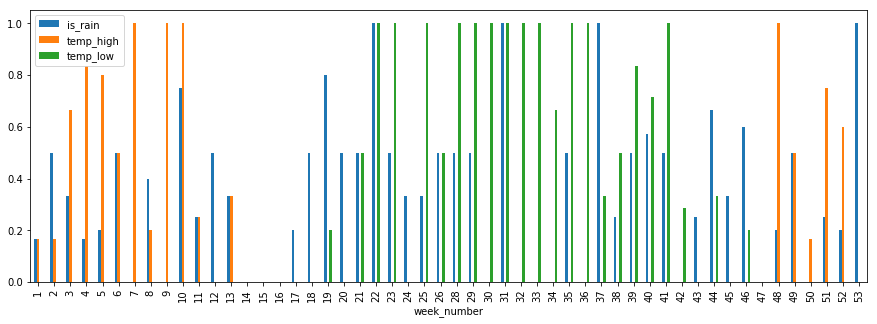

In [126]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
climate_df.plot(x="week_number", y=["is_rain", "temp_high", "temp_low"], kind="bar")

In [127]:
climate_df['temp_high'] = np.where(climate_df['temp_high']>=0.5, 1, 0)

In [128]:
climate_df['temp_low'] = np.where(climate_df['temp_low']>=0.5, 1, 0)

In [129]:
climate_df['is_rain'] = np.where(climate_df['is_rain']>=0.5, 1, 0)

In [130]:
climate_df.head()

,week_number,is_rain,temp_high,temp_low
0,1,0,0,0
1,2,1,0,0
2,3,0,1,0
3,4,0,1,0
4,5,0,1,0


## WEEKLY AGGREGATION

In [131]:
dfMain.columns

Index(['order_date', 'Year', 'Month', 'gmv', 'units', 'sla',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'discount', 'is_prepaid', 'ana_ver__BoomBox',
       'ana_ver__CameraAccessory', 'ana_ver__CameraBag',
       'ana_ver__CameraBattery', 'ana_ver__CameraBatteryCharger',
       'ana_ver__CameraFilmRolls', 'ana_ver__CameraRemoteControl',
       'ana_ver__CameraTripod', 'ana_ver__Dock', 'ana_ver__FMRadio',
       'ana_ver__Filter', 'ana_ver__Flash', 'ana_ver__GamePad',
       'ana_ver__GamingAccessoryKit', 'ana_ver__GamingAdapter',
       'ana_ver__GamingHeadset', 'ana_ver__GamingKeyboard',
       'ana_ver__GamingMemoryCard', 'ana_ver__GamingMouse',
       'ana_ver__GamingMousePad', 'ana_ver__HiFiSystem',
       'ana_ver__HomeAudioSpeaker', 'ana_ver__JoystickGamingWheel',
       'ana_ver__Lens', 'ana_ver__Others', 'ana_ver__Strap',
       'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 

In [132]:
dfMain.shape

(499614, 52)

In [133]:
dfMain['day_of_year'] = pd.to_datetime(dfMain['order_date']).dt.dayofyear
dfMain.head()

,order_date,Year,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,discount,...,Content Marketing,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,is_holiday,is_payday,day_of_year
0,2015-07-01,2015,7,2950.00,1,6,HomeAudio,3299,5,10.58,...,0.00,0.00,0.00,0.01,0.00,54.60,1177.00,0,1,182
1,2015-07-01,2015,7,428.00,1,7,GamingAccessory,999,3,57.16,...,0.00,0.05,0.02,0.18,0.00,54.60,1177.00,0,1,182
2,2015-07-01,2015,7,1999.00,1,1,GamingAccessory,7999,3,75.01,...,0.00,0.05,0.02,0.18,0.00,54.60,1177.00,0,1,182
3,2015-07-01,2015,7,385.00,1,10,GamingAccessory,699,4,44.92,...,0.00,0.03,0.01,0.11,0.00,54.60,1177.00,0,1,182
4,2015-07-01,2015,7,2249.00,1,7,HomeAudio,2800,4,19.68,...,0.00,0.07,0.03,0.26,0.00,54.60,1177.00,0,1,182


In [134]:
dfMain['day_of_year'] = dfMain['day_of_year'].apply(lambda x : x-181 if x>181 else x+366-182)

In [135]:
dfMain['week_number'] = np.ceil(dfMain['day_of_year']/7).astype(int)

In [136]:
dfMain.head()

,order_date,Year,Month,gmv,units,sla,product_analytic_sub_category,product_mrp,product_procurement_sla,discount,...,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,is_holiday,is_payday,day_of_year,week_number
0,2015-07-01,2015,7,2950.00,1,6,HomeAudio,3299,5,10.58,...,0.00,0.00,0.01,0.00,54.60,1177.00,0,1,1,1
1,2015-07-01,2015,7,428.00,1,7,GamingAccessory,999,3,57.16,...,0.05,0.02,0.18,0.00,54.60,1177.00,0,1,1,1
2,2015-07-01,2015,7,1999.00,1,1,GamingAccessory,7999,3,75.01,...,0.05,0.02,0.18,0.00,54.60,1177.00,0,1,1,1
3,2015-07-01,2015,7,385.00,1,10,GamingAccessory,699,4,44.92,...,0.03,0.01,0.11,0.00,54.60,1177.00,0,1,1,1
4,2015-07-01,2015,7,2249.00,1,7,HomeAudio,2800,4,19.68,...,0.07,0.03,0.26,0.00,54.60,1177.00,0,1,1,1


In [137]:
dfMain['product_analytic_sub_category'].value_counts()

CameraAccessory    211661
GamingAccessory    181940
HomeAudio          106013
Name: product_analytic_sub_category, dtype: int64

# CAMERA ACCESSORIES DATAFRAME

In [138]:
dfMain_cam = dfMain[dfMain['product_analytic_sub_category']=='CameraAccessory']
dfMain_gp_cam=dfMain_cam.groupby('week_number').mean()
dfMain_gp_cam.head()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,...,Content Marketing,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,is_holiday,is_payday,day_of_year
week_number,,,,,,,,,,,,,,,,,,,,,
1,2015.00,7.00,1401.14,1.03,5.90,2588.31,2.83,43.96,0.36,0.00,...,0.00,0.02,0.01,0.09,0.00,54.60,1177.00,0.00,0.00,6.81
2,2015.00,7.00,1363.87,1.05,7.23,2435.23,2.77,45.48,0.32,0.00,...,0.00,0.02,0.01,0.08,0.00,54.60,1177.00,0.00,0.00,10.83
3,2015.00,7.00,1489.00,1.03,6.19,2587.34,2.87,45.30,0.34,0.00,...,0.00,0.02,0.01,0.09,0.00,54.60,1177.00,0.28,0.16,17.96
4,2015.00,7.00,1417.84,1.04,6.39,2452.30,2.84,44.40,0.32,0.00,...,0.00,0.02,0.01,0.09,0.00,54.60,1177.00,0.00,0.00,24.95
5,2015.00,7.00,1304.83,1.06,6.46,2318.20,2.80,44.67,0.29,0.00,...,0.00,0.02,0.01,0.09,0.00,54.61,1177.05,0.00,0.00,29.94


In [139]:
dfMain_cam_gmv_sum = dfMain_cam[['week_number','gmv']].groupby('week_number').sum()
dfMain_cam_gmv_sum.columns=['gmv_sum']
dfMain_cam_gmv_sum.head()

,gmv_sum
week_number,
1,727191.00
2,4259358.00
3,4510191.00
4,4070630.00
5,1563187.00


In [140]:
dfMain_gp_cam=dfMain_gp_cam.join(dfMain_cam_gmv_sum)
dfMain_gp_cam.head()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,...,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,is_holiday,is_payday,day_of_year,gmv_sum
week_number,,,,,,,,,,,,,,,,,,,,,
1,2015.00,7.00,1401.14,1.03,5.90,2588.31,2.83,43.96,0.36,0.00,...,0.02,0.01,0.09,0.00,54.60,1177.00,0.00,0.00,6.81,727191.00
2,2015.00,7.00,1363.87,1.05,7.23,2435.23,2.77,45.48,0.32,0.00,...,0.02,0.01,0.08,0.00,54.60,1177.00,0.00,0.00,10.83,4259358.00
3,2015.00,7.00,1489.00,1.03,6.19,2587.34,2.87,45.30,0.34,0.00,...,0.02,0.01,0.09,0.00,54.60,1177.00,0.28,0.16,17.96,4510191.00
4,2015.00,7.00,1417.84,1.04,6.39,2452.30,2.84,44.40,0.32,0.00,...,0.02,0.01,0.09,0.00,54.60,1177.00,0.00,0.00,24.95,4070630.00
5,2015.00,7.00,1304.83,1.06,6.46,2318.20,2.80,44.67,0.29,0.00,...,0.02,0.01,0.09,0.00,54.61,1177.05,0.00,0.00,29.94,1563187.00


In [141]:
dfMain_gp_cam.drop('gmv', axis=1, inplace=True)

In [142]:
dfMain_cam_unit_sum = dfMain_cam[['week_number','units']].groupby('week_number').sum()
dfMain_cam_unit_sum.columns=['Total_Units_Sold']
dfMain_cam_unit_sum.head()

,Total_Units_Sold
week_number,
1,537
2,3267
3,3122
4,2984
5,1267


In [143]:
dfMain_cam['Total_MRP'] = (dfMain_cam['units']*dfMain_cam['product_mrp'])

In [144]:
dfMain_cam_MRP_sum = dfMain_cam[['week_number','Total_MRP']].groupby('week_number').sum()
dfMain_cam_MRP_sum.columns=['MRP_sum']
dfMain_cam_MRP_sum.head()

,MRP_sum
week_number,
1,1382831
2,7794731
3,7934582
4,7261863
5,2866207


In [145]:
totalorder_cam = dfMain_cam.groupby(['week_number']).size()
totalorder_cam = totalorder_cam.reset_index()
totalorder_cam = totalorder_cam.rename(columns={0:"Total_Orders"}) 
totalorder_cam.set_index('week_number', inplace=True)
totalorder_cam.head()

,Total_Orders
week_number,
1,519
2,3123
3,3029
4,2871
5,1198


In [146]:
HolidaysList['day_of_year'] = pd.to_datetime(HolidaysList['Holidays']).dt.dayofyear

In [147]:
HolidaysList

,Holidays,day_of_year
0,2015-07-18,199
1,2015-07-19,200
2,2015-08-15,227
3,2015-08-16,228
4,2015-08-17,229
5,2015-08-28,240
6,2015-08-29,241
7,2015-08-30,242
8,2015-10-15,288
9,2015-10-16,289


In [148]:
HolidaysList['day_of_year'] = HolidaysList['day_of_year'].apply(lambda x : x-181 if x>181 else x+366-182)

In [149]:
HolidaysList['week_number'] = np.ceil(HolidaysList['day_of_year']/7).astype(int)

In [150]:
HolidaysList['Number_of_holidays'] = 1

In [151]:
HolidaysList.drop(['day_of_year'], axis=1, inplace=True)

In [152]:
HolidaysList=HolidaysList.groupby('week_number').sum()
HolidaysList

,Number_of_holidays
week_number,
3,2
7,3
9,3
16,3
19,4
20,4
26,5
27,5
30,3


In [153]:
dfMain_gp_cam=dfMain_gp_cam.join(dfMain_cam_MRP_sum)

In [154]:
dfMain_gp_cam=dfMain_gp_cam.join(dfMain_cam_unit_sum)

In [155]:
dfMain_gp_cam=dfMain_gp_cam.join(totalorder_cam)

In [156]:
dfMain_gp_cam=dfMain_gp_cam.join(HolidaysList)

In [157]:
dfMain_gp_cam.head()

,Year,Month,units,sla,product_mrp,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,...,NPS,Stock Index,is_holiday,is_payday,day_of_year,gmv_sum,MRP_sum,Total_Units_Sold,Total_Orders,Number_of_holidays
week_number,,,,,,,,,,,,,,,,,,,,,
1,2015.00,7.00,1.03,5.90,2588.31,2.83,43.96,0.36,0.00,0.01,...,54.60,1177.00,0.00,0.00,6.81,727191.00,1382831,537,519,nan
2,2015.00,7.00,1.05,7.23,2435.23,2.77,45.48,0.32,0.00,0.01,...,54.60,1177.00,0.00,0.00,10.83,4259358.00,7794731,3267,3123,nan
3,2015.00,7.00,1.03,6.19,2587.34,2.87,45.30,0.34,0.00,0.01,...,54.60,1177.00,0.28,0.16,17.96,4510191.00,7934582,3122,3029,2.00
4,2015.00,7.00,1.04,6.39,2452.30,2.84,44.40,0.32,0.00,0.02,...,54.60,1177.00,0.00,0.00,24.95,4070630.00,7261863,2984,2871,nan
5,2015.00,7.00,1.06,6.46,2318.20,2.80,44.67,0.29,0.00,0.02,...,54.61,1177.05,0.00,0.00,29.94,1563187.00,2866207,1267,1198,nan


In [158]:
dfMain_gp_cam[['Number_of_holidays']] = dfMain_gp_cam[['Number_of_holidays']].fillna(value=0)

In [159]:
dfMain_gp_cam.drop(['units','is_holiday','day_of_year','Year','Month'], axis=1, inplace=True)

In [160]:
climate_df.set_index('week_number', inplace=True)

In [161]:
climate_df.head()

,is_rain,temp_high,temp_low
week_number,,,
1,0,0,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,1,0


In [162]:
dfMain_gp_cam=dfMain_gp_cam.join(climate_df)

In [163]:
dfMain_gp_cam.rename(columns={'product_mrp':'Avg_mrp_of_product_sold','is_payday':'Number_of_paydays'}, inplace=True)

In [164]:
dfMain_gp_cam['Number_of_paydays'] = np.where(dfMain_gp_cam['Number_of_paydays']>0, 1, 0)

In [165]:
dfMain_gp_cam.isnull().sum()

sla                              0
Avg_mrp_of_product_sold          0
product_procurement_sla          0
discount                         0
is_prepaid                       0
ana_ver__BoomBox                 0
ana_ver__CameraAccessory         0
ana_ver__CameraBag               0
ana_ver__CameraBattery           0
ana_ver__CameraBatteryCharger    0
ana_ver__CameraFilmRolls         0
ana_ver__CameraRemoteControl     0
ana_ver__CameraTripod            0
ana_ver__Dock                    0
ana_ver__FMRadio                 0
ana_ver__Filter                  0
ana_ver__Flash                   0
ana_ver__GamePad                 0
ana_ver__GamingAccessoryKit      0
ana_ver__GamingAdapter           0
ana_ver__GamingHeadset           0
ana_ver__GamingKeyboard          0
ana_ver__GamingMemoryCard        0
ana_ver__GamingMouse             0
ana_ver__GamingMousePad          0
ana_ver__HiFiSystem              0
ana_ver__HomeAudioSpeaker        0
ana_ver__JoystickGamingWheel     0
ana_ver__Lens       

In [166]:
dfMain_gp_cam.fillna(0, inplace=True)

In [167]:
dfMain_gp_cam.dtypes

sla                              float64
Avg_mrp_of_product_sold          float64
product_procurement_sla          float64
discount                         float64
is_prepaid                       float64
ana_ver__BoomBox                 float64
ana_ver__CameraAccessory         float64
ana_ver__CameraBag               float64
ana_ver__CameraBattery           float64
ana_ver__CameraBatteryCharger    float64
ana_ver__CameraFilmRolls         float64
ana_ver__CameraRemoteControl     float64
ana_ver__CameraTripod            float64
ana_ver__Dock                    float64
ana_ver__FMRadio                 float64
ana_ver__Filter                  float64
ana_ver__Flash                   float64
ana_ver__GamePad                 float64
ana_ver__GamingAccessoryKit      float64
ana_ver__GamingAdapter           float64
ana_ver__GamingHeadset           float64
ana_ver__GamingKeyboard          float64
ana_ver__GamingMemoryCard        float64
ana_ver__GamingMouse             float64
ana_ver__GamingM

### Camera Dataframe -  dfMain_gp_cam

In [168]:
dfMain_gp_cam.head()

,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,Stock Index,Number_of_paydays,gmv_sum,MRP_sum,Total_Units_Sold,Total_Orders,Number_of_holidays,is_rain,temp_high,temp_low
week_number,,,,,,,,,,,,,,,,,,,,,
1,5.90,2588.31,2.83,43.96,0.36,0.00,0.01,0.11,0.22,0.08,...,1177.00,0,727191.00,1382831,537,519,0.00,0.00,0.00,0.00
2,7.23,2435.23,2.77,45.48,0.32,0.00,0.01,0.12,0.23,0.08,...,1177.00,0,4259358.00,7794731,3267,3123,0.00,1.00,0.00,0.00
3,6.19,2587.34,2.87,45.30,0.34,0.00,0.01,0.10,0.24,0.07,...,1177.00,1,4510191.00,7934582,3122,3029,2.00,0.00,1.00,0.00
4,6.39,2452.30,2.84,44.40,0.32,0.00,0.02,0.10,0.25,0.09,...,1177.00,0,4070630.00,7261863,2984,2871,0.00,0.00,1.00,0.00
5,6.46,2318.20,2.80,44.67,0.29,0.00,0.02,0.09,0.24,0.09,...,1177.05,0,1563187.00,2866207,1267,1198,0.00,0.00,1.00,0.00


# GAMING ACCESSORIES DATAFRAME

In [169]:
dfMain_game = dfMain[dfMain['product_analytic_sub_category']=='GamingAccessory']
dfMain_gp_game=dfMain_game.groupby('week_number').mean()
dfMain_gp_game.head()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,...,Content Marketing,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,is_holiday,is_payday,day_of_year
week_number,,,,,,,,,,,,,,,,,,,,,
1,2015.00,7.00,878.02,1.09,4.21,1881.22,3.63,45.41,0.32,0.00,...,0.00,0.03,0.01,0.11,0.00,54.60,1177.00,0.00,0.00,6.88
2,2015.00,7.00,980.67,1.04,6.05,1885.04,2.95,37.44,0.24,0.00,...,0.00,0.03,0.01,0.12,0.00,54.60,1177.00,0.00,0.00,10.61
3,2015.00,7.00,845.97,1.09,5.10,2089.27,2.79,44.74,0.25,0.00,...,0.00,0.04,0.01,0.14,0.00,54.60,1177.00,0.26,0.12,17.93
4,2015.00,7.00,1128.53,1.05,5.46,2348.76,2.49,39.51,0.22,0.00,...,0.00,0.03,0.01,0.13,0.00,54.60,1177.00,0.00,0.00,24.92
5,2015.00,7.00,1055.90,1.05,5.68,7040.42,3.69,46.97,0.21,0.00,...,0.00,0.04,0.02,0.14,0.00,54.61,1177.06,0.00,0.00,29.98


In [170]:
dfMain_game_gmv_sum = dfMain_game[['week_number','gmv']].groupby('week_number').sum()
dfMain_game_gmv_sum.columns=['gmv_sum']
dfMain_game_gmv_sum.head()

,gmv_sum
week_number,
1,781440.00
2,2517369.00
3,2268893.36
4,2602381.50
5,1111858.00


In [171]:
dfMain_gp_game=dfMain_gp_game.join(dfMain_game_gmv_sum)
dfMain_gp_game.head()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,...,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,is_holiday,is_payday,day_of_year,gmv_sum
week_number,,,,,,,,,,,,,,,,,,,,,
1,2015.00,7.00,878.02,1.09,4.21,1881.22,3.63,45.41,0.32,0.00,...,0.03,0.01,0.11,0.00,54.60,1177.00,0.00,0.00,6.88,781440.00
2,2015.00,7.00,980.67,1.04,6.05,1885.04,2.95,37.44,0.24,0.00,...,0.03,0.01,0.12,0.00,54.60,1177.00,0.00,0.00,10.61,2517369.00
3,2015.00,7.00,845.97,1.09,5.10,2089.27,2.79,44.74,0.25,0.00,...,0.04,0.01,0.14,0.00,54.60,1177.00,0.26,0.12,17.93,2268893.36
4,2015.00,7.00,1128.53,1.05,5.46,2348.76,2.49,39.51,0.22,0.00,...,0.03,0.01,0.13,0.00,54.60,1177.00,0.00,0.00,24.92,2602381.50
5,2015.00,7.00,1055.90,1.05,5.68,7040.42,3.69,46.97,0.21,0.00,...,0.04,0.02,0.14,0.00,54.61,1177.06,0.00,0.00,29.98,1111858.00


In [172]:
dfMain_game_units_sum = dfMain_game[['week_number','units']].groupby('week_number').sum()
dfMain_game_units_sum.columns=['Total_Units_Sold']
dfMain_game_units_sum.head()

,Total_Units_Sold
week_number,
1,966
2,2667
3,2929
4,2416
5,1102


In [173]:
dfMain_game['Total_MRP'] = (dfMain_game['units']*dfMain_game['product_mrp'])

In [174]:
dfMain_game_MRP_sum = dfMain_game[['week_number','Total_MRP']].groupby('week_number').sum()
dfMain_game_MRP_sum.columns=['MRP_sum']
dfMain_game_MRP_sum.head()

,MRP_sum
week_number,
1,1771775
2,4972187
3,5713679
4,5756545
5,7498304


In [175]:
totalorder_game = dfMain_game.groupby(['week_number']).size()
totalorder_game = totalorder_game.reset_index()
totalorder_game = totalorder_game.rename(columns={0:"Total_Orders"}) 
totalorder_game.set_index('week_number', inplace=True)
totalorder_game.head()

,Total_Orders
week_number,
1,890
2,2567
3,2682
4,2306
5,1053


In [176]:
dfMain_gp_game=dfMain_gp_game.join(dfMain_game_MRP_sum)

In [177]:
dfMain_gp_game=dfMain_gp_game.join(dfMain_game_units_sum)

In [178]:
dfMain_gp_game=dfMain_gp_game.join(totalorder_game)

In [179]:
dfMain_gp_game=dfMain_gp_game.join(HolidaysList)

In [180]:
dfMain_gp_game[['Number_of_holidays']] = dfMain_gp_game[['Number_of_holidays']].fillna(value=0)

In [181]:
dfMain_gp_game.drop(['units','is_holiday','day_of_year','Year','Month'], axis=1, inplace=True)

In [182]:
dfMain_gp_game=dfMain_gp_game.join(climate_df)

In [183]:
dfMain_gp_game.rename(columns={'product_mrp':'Avg_mrp_of_product_sold','is_payday':'Number_of_paydays'}, inplace=True)

In [184]:
dfMain_gp_game['Number_of_paydays'] = np.where(dfMain_gp_game['Number_of_paydays']>0, 1, 0)

In [185]:
dfMain_gp_game.fillna(0, inplace=True)

In [186]:
dfMain_gp_game.drop('gmv', axis=1, inplace=True)

### Game Dataframe - dfMain_gp_game

In [187]:
dfMain_gp_game

,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,Stock Index,Number_of_paydays,gmv_sum,MRP_sum,Total_Units_Sold,Total_Orders,Number_of_holidays,is_rain,temp_high,temp_low
week_number,,,,,,,,,,,,,,,,,,,,,
1,4.21,1881.22,3.63,45.41,0.32,0.00,0.00,0.00,0.00,0.00,...,1177.00,1,781440.00,1771775,966,890,0.00,0.00,0.00,0.00
2,6.05,1885.04,2.95,37.44,0.24,0.00,0.00,0.00,0.00,0.00,...,1177.00,0,2517369.00,4972187,2667,2567,0.00,1.00,0.00,0.00
3,5.10,2089.27,2.79,44.74,0.25,0.00,0.00,0.00,0.00,0.00,...,1177.00,1,2268893.36,5713679,2929,2682,2.00,0.00,1.00,0.00
4,5.46,2348.76,2.49,39.51,0.22,0.00,0.00,0.00,0.00,0.00,...,1177.00,0,2602381.50,5756545,2416,2306,0.00,0.00,1.00,0.00
5,5.68,7040.42,3.69,46.97,0.21,0.00,0.00,0.00,0.00,0.00,...,1177.06,1,1111858.00,7498304,1102,1053,0.00,0.00,1.00,0.00
6,6.33,1334.83,2.83,40.34,0.17,0.00,0.00,0.00,0.00,0.00,...,1206.00,0,5376.00,8009,6,6,0.00,1.00,1.00,0.00
7,7.00,4999.00,1.00,81.20,1.00,0.00,0.00,0.00,0.00,0.00,...,1206.00,0,940.00,4999,1,1,3.00,0.00,1.00,0.00
8,3.33,665.67,2.33,56.32,0.00,0.00,0.00,0.00,0.00,0.00,...,1206.00,0,852.00,1997,3,3,0.00,0.00,0.00,0.00
9,5.13,2182.39,2.64,38.17,0.25,0.00,0.00,0.00,0.00,0.00,...,1104.53,1,402751.00,931599,436,416,3.00,0.00,1.00,0.00


# HOME AUDIO ACCESSORIES DATAFRAME

In [188]:
dfMain_home = dfMain[dfMain['product_analytic_sub_category']=='HomeAudio']
dfMain_gp_home=dfMain_home.groupby('week_number').mean()
dfMain_gp_home.head()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,...,Content Marketing,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,is_holiday,is_payday,day_of_year
week_number,,,,,,,,,,,,,,,,,,,,,
1,2015.00,7.00,2371.82,1.01,6.51,3670.39,2.78,32.04,0.27,0.05,...,0.00,0.05,0.02,0.20,0.00,54.60,1177.00,0.00,0.01,6.62
2,2015.00,7.00,2174.92,1.01,7.57,3458.00,2.84,32.97,0.24,0.03,...,0.00,0.05,0.02,0.19,0.00,54.60,1177.00,0.00,0.00,11.08
3,2015.00,7.00,2247.28,1.01,6.99,3659.49,2.80,33.79,0.22,0.04,...,0.00,0.05,0.02,0.20,0.00,54.60,1177.00,0.28,0.14,17.97
4,2015.00,7.00,2114.74,1.01,7.12,3468.47,2.82,33.68,0.21,0.03,...,0.00,0.05,0.02,0.19,0.00,54.60,1177.00,0.00,0.00,25.06
5,2015.00,7.00,2203.76,1.01,7.36,3651.90,2.66,33.87,0.23,0.02,...,0.00,0.05,0.02,0.19,0.00,54.61,1177.03,0.00,0.00,30.02


In [189]:
dfMain_home_gmv_sum = dfMain_home[['week_number','gmv']].groupby('week_number').sum()
dfMain_home_gmv_sum.columns=['gmv_sum']
dfMain_home_gmv_sum.head()

,gmv_sum
week_number,
1,915524.00
2,5224169.13
3,5184479.00
4,4402879.00
5,2064925.00


In [190]:
dfMain_gp_home=dfMain_gp_home.join(dfMain_home_gmv_sum)

In [191]:
dfMain_gp_home.drop('gmv', axis=1, inplace=True)
dfMain_gp_home.head()

,Year,Month,units,sla,product_mrp,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,...,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,is_holiday,is_payday,day_of_year,gmv_sum
week_number,,,,,,,,,,,,,,,,,,,,,
1,2015.00,7.00,1.01,6.51,3670.39,2.78,32.04,0.27,0.05,0.00,...,0.05,0.02,0.20,0.00,54.60,1177.00,0.00,0.01,6.62,915524.00
2,2015.00,7.00,1.01,7.57,3458.00,2.84,32.97,0.24,0.03,0.00,...,0.05,0.02,0.19,0.00,54.60,1177.00,0.00,0.00,11.08,5224169.13
3,2015.00,7.00,1.01,6.99,3659.49,2.80,33.79,0.22,0.04,0.00,...,0.05,0.02,0.20,0.00,54.60,1177.00,0.28,0.14,17.97,5184479.00
4,2015.00,7.00,1.01,7.12,3468.47,2.82,33.68,0.21,0.03,0.00,...,0.05,0.02,0.19,0.00,54.60,1177.00,0.00,0.00,25.06,4402879.00
5,2015.00,7.00,1.01,7.36,3651.90,2.66,33.87,0.23,0.02,0.00,...,0.05,0.02,0.19,0.00,54.61,1177.03,0.00,0.00,30.02,2064925.00


In [192]:
dfMain_home_units_sum = dfMain_home[['week_number','units']].groupby('week_number').sum()
dfMain_home_units_sum.columns=['Total_Units_Sold']
dfMain_home_units_sum.head()

,Total_Units_Sold
week_number,
1,388
2,2426
3,2327
4,2097
5,943


In [193]:
dfMain_home['Total_MRP'] = (dfMain_home['units']*dfMain_home['product_mrp'])

In [194]:
dfMain_home_MRP_sum = dfMain_home[['week_number','Total_MRP']].groupby('week_number').sum()
dfMain_home_MRP_sum.columns=['MRP_sum']
dfMain_home_MRP_sum.head()

,MRP_sum
week_number,
1,1424759
2,8350358
3,8497036
4,7271136
5,3434742


In [195]:
totalorder_home = dfMain_home.groupby(['week_number']).size()
totalorder_home = totalorder_home.reset_index()
totalorder_home = totalorder_home.rename(columns={0:"Total_Orders"}) 
totalorder_home.set_index('week_number', inplace=True)
totalorder_home.head()

,Total_Orders
week_number,
1,386
2,2402
3,2307
4,2082
5,937


In [196]:
dfMain_gp_home=dfMain_gp_home.join(dfMain_home_MRP_sum)

In [197]:
dfMain_gp_home=dfMain_gp_home.join(dfMain_home_units_sum)

In [198]:
dfMain_gp_home=dfMain_gp_home.join(totalorder_home)

In [199]:
dfMain_gp_home=dfMain_gp_home.join(HolidaysList)

In [200]:
dfMain_gp_home[['Number_of_holidays']] = dfMain_gp_home[['Number_of_holidays']].fillna(value=0)

In [201]:
dfMain_gp_home.drop(['units','is_holiday','day_of_year','Year','Month'], axis=1, inplace=True)

In [202]:
dfMain_gp_home=dfMain_gp_home.join(climate_df)

In [203]:
dfMain_gp_home.rename(columns={'product_mrp':'Avg_mrp_of_product_sold','is_payday':'Number_of_paydays'}, inplace=True)

In [204]:
dfMain_gp_home['Number_of_paydays'] = np.where(dfMain_gp_home['Number_of_paydays']>0, 1, 0)

In [205]:
dfMain_gp_home.fillna(0, inplace=True)

### Home Dataframe - dfMain_gp_home

In [206]:
dfMain_gp_home

,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,Stock Index,Number_of_paydays,gmv_sum,MRP_sum,Total_Units_Sold,Total_Orders,Number_of_holidays,is_rain,temp_high,temp_low
week_number,,,,,,,,,,,,,,,,,,,,,
1,6.51,3670.39,2.78,32.04,0.27,0.05,0.00,0.00,0.00,0.00,...,1177.00,1,915524.00,1424759,388,386,0.00,0.00,0.00,0.00
2,7.57,3458.00,2.84,32.97,0.24,0.03,0.00,0.00,0.00,0.00,...,1177.00,0,5224169.13,8350358,2426,2402,0.00,1.00,0.00,0.00
3,6.99,3659.49,2.80,33.79,0.22,0.04,0.00,0.00,0.00,0.00,...,1177.00,1,5184479.00,8497036,2327,2307,2.00,0.00,1.00,0.00
4,7.12,3468.47,2.82,33.68,0.21,0.03,0.00,0.00,0.00,0.00,...,1177.00,0,4402879.00,7271136,2097,2082,0.00,0.00,1.00,0.00
5,7.36,3651.90,2.66,33.87,0.23,0.02,0.00,0.00,0.00,0.00,...,1177.03,0,2064925.00,3434742,943,937,0.00,0.00,1.00,0.00
9,5.63,4050.10,2.77,40.66,0.22,0.05,0.00,0.00,0.00,0.00,...,1103.64,1,689717.00,1303751,321,318,3.00,0.00,1.00,0.00
10,5.48,3673.05,2.79,37.56,0.23,0.04,0.00,0.00,0.00,0.00,...,1101.00,0,4259671.00,7536273,2053,2041,0.00,1.00,1.00,0.00
11,5.56,3565.85,2.88,37.48,0.21,0.06,0.00,0.00,0.00,0.00,...,1101.00,1,3887541.00,6876630,1933,1918,0.00,0.00,0.00,0.00
12,6.43,3283.16,2.69,37.39,0.22,0.04,0.00,0.00,0.00,0.00,...,1101.00,0,3848276.00,6594698,2017,1992,0.00,1.00,0.00,0.00


# EDA

In [207]:
dfMain_gp_cam.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM

In [208]:
columns_to_analyze=['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid','TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Other',
       'NPS', 'Stock Index', 'Number_of_paydays', 'MRP_sum',
       'Total_Units_Sold', 'Total_Orders', 'Number_of_holidays', 'is_rain',
       'temp_high', 'temp_low', 'gmv_sum']

<Figure size 1080x360 with 0 Axes>

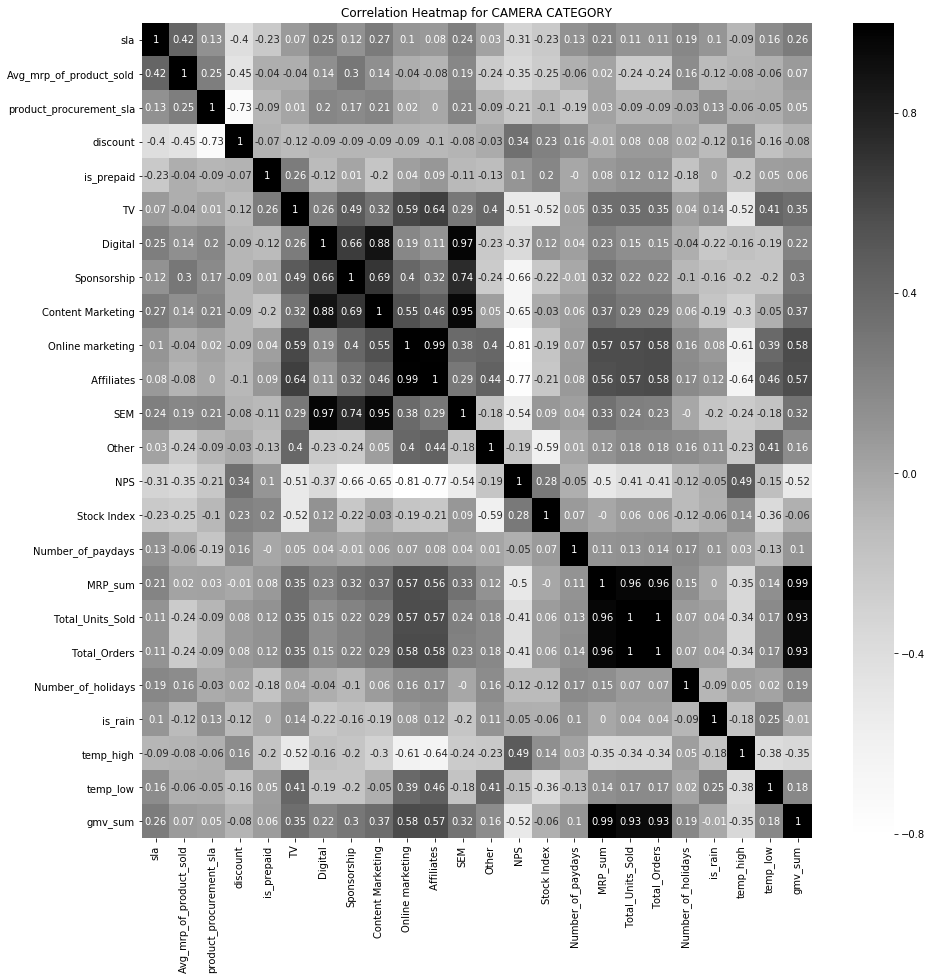

In [209]:
plt.clf()
plt.figure(figsize = (15,15))

df_corr_cam = round(dfMain_gp_cam[columns_to_analyze].corr(), 2)
sns.heatmap(df_corr_cam, annot=True, cmap="Greys")
plt.title('Correlation Heatmap for CAMERA CATEGORY')
plt.show()

<Figure size 1080x360 with 0 Axes>

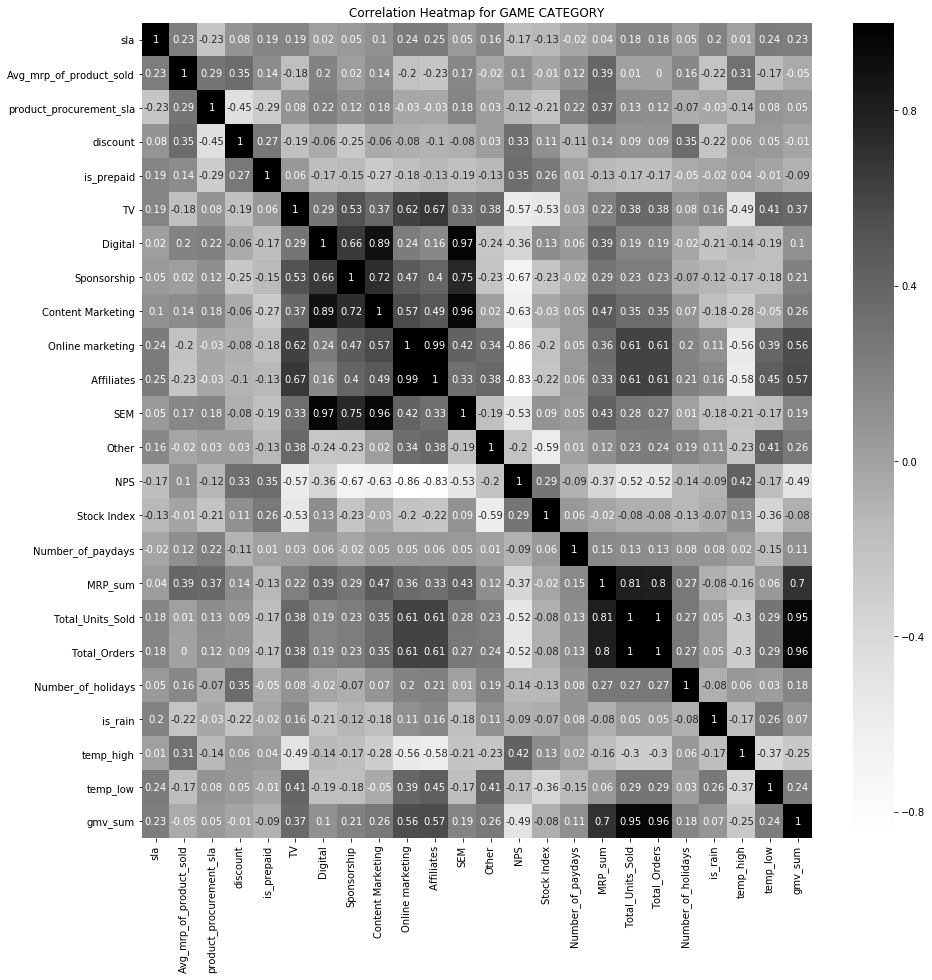

In [210]:
plt.clf()
plt.figure(figsize = (15,15))

df_corr_game = round(dfMain_gp_game[columns_to_analyze].corr(), 2)
sns.heatmap(df_corr_game, annot=True, cmap="Greys")
plt.title('Correlation Heatmap for GAME CATEGORY')
plt.show()

<Figure size 1080x360 with 0 Axes>

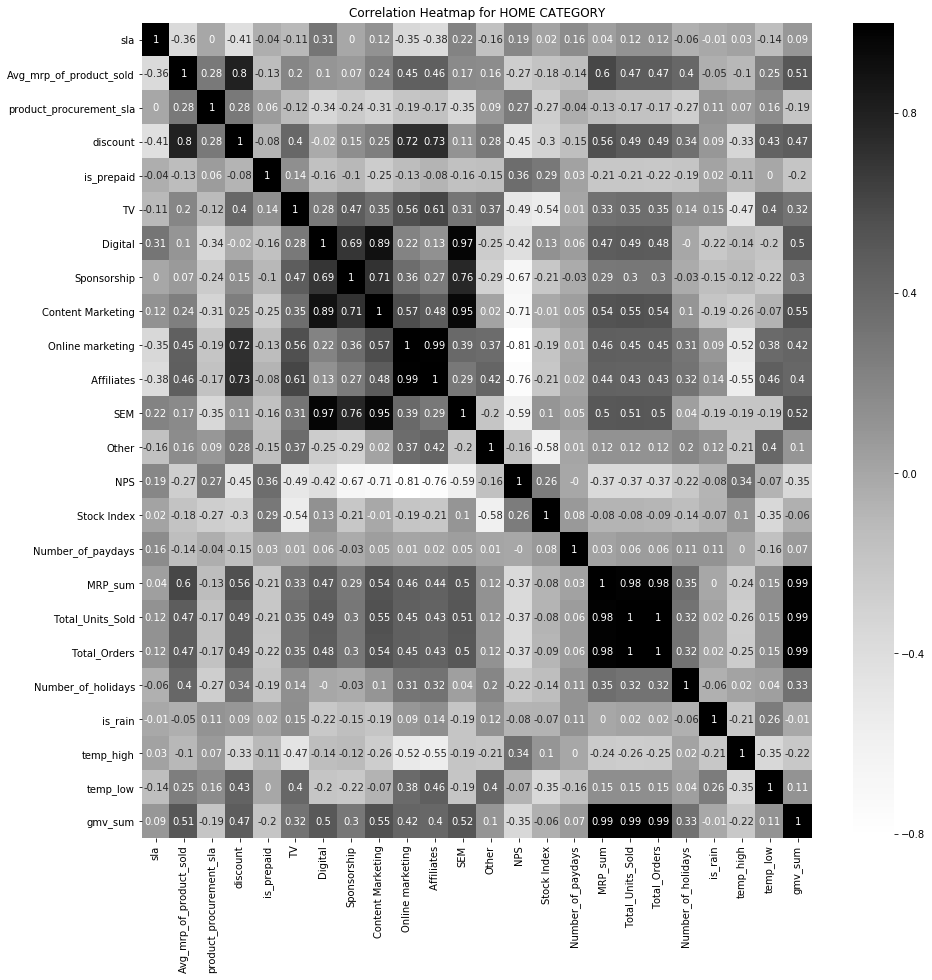

In [211]:
plt.clf()
plt.figure(figsize = (15,15))

df_corr_home = round(dfMain_gp_home[columns_to_analyze].corr(), 2)
sns.heatmap(df_corr_home, annot=True, cmap="Greys")
plt.title('Correlation Heatmap for HOME CATEGORY')
plt.show()

# MODEL BUILDING

## LINEAR MODELS

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Camera Dataframe - Basic Linear Model

In [213]:
# dropping variables having collonearity with the target

dfMain_lm_cam = dfMain_gp_cam.drop(['MRP_sum','Total_Units_Sold', 'Total_Orders','Content Marketing', 'Online marketing','SEM'], axis=1)

In [214]:
# Split the datafram into train and test sets

df_train, df_test = train_test_split(dfMain_lm_cam, train_size=.7, test_size=0.3, random_state=100)

In [215]:
dfMain_lm_cam.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship', ' Affiliates',
       'Other', 'NPS', 'Stock Index', 'Number_of_pay

In [216]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship', ' Affiliates',
       'Other', 'NPS', 'Stock Index', 'Number_of_paydays', 'gmv_sum',
       'Number_of_holidays', 'is_rain', 'temp_high', 'temp_low']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [217]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv_sum')
X_train = df_train

In [218]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [219]:
# Print the coefficients and intercept

print(lm.coef_)
print(lm.intercept_)

[ 9.20631218e-03  1.08411512e+00 -7.82027469e-01  6.68131917e-02
 -7.45721314e-01 -5.38458167e-15  9.72471522e-02 -5.76445864e-01
  1.04100920e-01  3.82453434e-02 -8.01886004e-01 -2.31001757e-01
  5.35821874e-01 -5.55111512e-16 -4.66293670e-15  9.92803624e-01
  1.52000764e+00 -2.66453526e-15 -6.66133815e-16  1.33226763e-15
  0.00000000e+00 -1.22124533e-15  1.16573418e-15 -3.05311332e-16
  1.77635684e-15 -3.33066907e-15  8.88178420e-16 -8.88178420e-16
  9.84758682e-01 -2.66781559e-01 -3.70991516e-01  0.00000000e+00
  7.26735617e-01  0.00000000e+00  3.26416962e-01  8.70833757e-01
 -1.66094185e-02  2.31915334e+00 -3.39810660e-01  2.47352033e+00
 -3.05235200e-02 -1.27766779e-01 -4.08174130e-01  6.88780873e-01
  3.39759895e-01 -6.85044743e-01]
9.452621610494889e-15


In [220]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 30 features
lm = LinearRegression()
rfe1 = RFE(lm, 30)

# Fit with 30 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True False  True  True  True  True  True  True
  True False False  True  True False False False False False False False
 False False False False  True  True  True False  True False  True  True
  True  True  True  True  True  True  True  True  True  True]
[ 1  1  1  1  1  4  1  1  1  1  1  1  1  5  3  1  1  2 11 13 14  8 10  9
 12  7 15  6  1  1  1 16  1 17  1  1  1  1  1  1  1  1  1  1  1  1]


In [221]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 30 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,Sponsorship,Affiliates,Other,NPS,Stock Index,Number_of_paydays,Number_of_holidays,is_rain,temp_high,temp_low
week_number,,,,,,,,,,,,,,,,,,,,,
42,1.00,-1.01,-1.19,-1.28,0.96,3.22,-1.23,-1.07,-0.33,-0.25,...,-0.45,0.31,-0.50,1.10,1.12,1.25,-0.54,-0.85,-0.58,-0.71
46,1.00,-1.21,-0.82,-1.34,1.74,-0.53,-0.67,0.26,-1.17,0.36,...,-0.13,0.83,0.25,-0.40,0.95,1.25,-0.54,1.18,-0.58,-0.71
39,1.00,-1.05,-2.02,-1.25,-0.07,0.13,-1.09,-1.48,1.43,2.63,...,0.29,0.50,1.52,0.17,-1.71,-0.80,-0.54,1.18,-0.58,1.41
19,1.00,-0.06,0.21,1.02,-0.11,-0.45,-0.66,-0.72,-1.00,-1.58,...,-0.91,0.70,-0.50,-0.50,1.01,-0.80,2.35,1.18,-0.58,-0.71
9,1.00,0.52,1.09,0.83,-0.85,-0.21,-0.14,1.44,1.43,-0.14,...,0.84,-0.42,-0.50,-0.41,-0.60,1.25,1.63,-0.85,1.73,-0.71


In [222]:
# Fitting the model with 30 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     3.848
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0686
Time:                        18:02:34   Log-Likelihood:                 6.1909
No. Observations:                  36   AIC:                             49.62
Df Residuals:                       5   BIC:                             98.71
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [223]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [224]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,ana_ver__Flash,612.02
24,NPS,304.24
21,Sponsorship,242.12
22,Affiliates,174.64
11,ana_ver__CameraRemoteControl,165.15
12,ana_ver__CameraTripod,140.40
4,discount,127.70
25,Stock Index,113.60
23,Other,108.58
20,Digital,105.19


In [225]:
X_train_rfe1.drop(['ana_ver__Flash'], axis = 1, inplace = True)

In [226]:
# Refitting with 29 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 29 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     4.362
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0363
Time:                        18:02:34   Log-Likelihood:                 4.6241
No. Observations:                  36   AIC:                             50.75
Df Residuals:                       6   BIC:                             98.26
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [227]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,NPS,258.11
21,Affiliates,169.34
20,Sponsorship,152.72
4,discount,113.59
11,ana_ver__CameraRemoteControl,94.46
24,Stock Index,83.11
3,product_procurement_sla,61.97
22,Other,59.45
10,ana_ver__CameraFilmRolls,49.79
8,ana_ver__CameraBattery,49.23


In [228]:
X_train_rfe1.drop(['ana_ver__CameraRemoteControl'], axis = 1, inplace = True)

In [229]:
# Refitting with 28 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 28 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     4.633
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0213
Time:                        18:02:34   Log-Likelihood:                 2.4136
No. Observations:                  36   AIC:                             53.17
Df Residuals:                       7   BIC:                             99.09
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [230]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,NPS,252.29
20,Affiliates,135.76
19,Sponsorship,85.91
4,discount,83.70
3,product_procurement_sla,61.81
10,ana_ver__CameraFilmRolls,49.45
8,ana_ver__CameraBattery,39.84
23,Stock Index,28.71
17,TV,28.47
13,ana_ver__Lens,26.20


In [231]:
X_train_rfe1.drop(' Affiliates', axis = 1, inplace = True)

In [232]:
# Refitting with 27 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 27 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     2.611
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0797
Time:                        18:02:34   Log-Likelihood:                -9.9738
No. Observations:                  36   AIC:                             75.95
Df Residuals:                       8   BIC:                             120.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [233]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Sponsorship,56.81
21,NPS,55.01
3,product_procurement_sla,39.61
10,ana_ver__CameraFilmRolls,33.20
4,discount,24.09
22,Stock Index,21.30
17,TV,21.16
18,Digital,19.54
20,Other,19.03
11,ana_ver__CameraTripod,17.86


In [234]:
X_train_rfe1.drop('Sponsorship', axis = 1, inplace = True)

In [235]:
# Refitting with 26 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 26 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     2.303
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0960
Time:                        18:02:34   Log-Likelihood:                -14.453
No. Observations:                  36   AIC:                             82.91
Df Residuals:                       9   BIC:                             125.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [236]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,product_procurement_sla,36.83
10,ana_ver__CameraFilmRolls,31.72
4,discount,18.07
17,TV,17.38
8,ana_ver__CameraBattery,15.72
2,Avg_mrp_of_product_sold,15.59
21,Stock Index,14.52
11,ana_ver__CameraTripod,14.31
20,NPS,13.53
12,ana_ver__Filter,12.27


In [237]:
X_train_rfe1.drop('product_procurement_sla', axis = 1, inplace = True)

In [238]:
# Refitting with 25 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 25 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     2.283
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0868
Time:                        18:02:34   Log-Likelihood:                -16.826
No. Observations:                  36   AIC:                             85.65
Df Residuals:                      10   BIC:                             126.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [239]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Avg_mrp_of_product_sold,15.58
16,TV,15.49
7,ana_ver__CameraBattery,13.43
19,NPS,12.56
3,discount,12.48
20,Stock Index,11.10
10,ana_ver__CameraTripod,10.47
9,ana_ver__CameraFilmRolls,9.44
5,ana_ver__CameraAccessory,8.74
12,ana_ver__Lens,8.52


In [240]:
X_train_rfe1.drop('Avg_mrp_of_product_sold', axis = 1, inplace = True)

In [241]:
# Refitting with 24 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 24 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     1.267
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.351
Time:                        18:02:34   Log-Likelihood:                -27.217
No. Observations:                  36   AIC:                             104.4
Df Residuals:                      11   BIC:                             144.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [242]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,TV,13.40
18,NPS,12.56
6,ana_ver__CameraBattery,12.42
2,discount,9.68
8,ana_ver__CameraFilmRolls,9.14
19,Stock Index,8.73
4,ana_ver__CameraAccessory,8.21
5,ana_ver__CameraBag,7.52
10,ana_ver__Filter,7.52
9,ana_ver__CameraTripod,6.78


In [243]:
X_train_rfe1.drop('TV', axis = 1, inplace = True)

In [244]:
# Refitting with 23 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 23 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     1.423
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.266
Time:                        18:02:34   Log-Likelihood:                -27.396
No. Observations:                  36   AIC:                             102.8
Df Residuals:                      12   BIC:                             140.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [245]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,NPS,11.85
6,ana_ver__CameraBattery,11.74
2,discount,9.45
8,ana_ver__CameraFilmRolls,9.11
9,ana_ver__CameraTripod,6.74
11,ana_ver__Lens,6.39
10,ana_ver__Filter,6.36
1,sla,5.99
4,ana_ver__CameraAccessory,5.71
23,temp_low,5.51


In [246]:
X_train_rfe1.drop('NPS', axis = 1, inplace = True)

In [247]:
# Refitting with 22 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 22 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     1.479
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.235
Time:                        18:02:34   Log-Likelihood:                -28.520
No. Observations:                  36   AIC:                             103.0
Df Residuals:                      13   BIC:                             139.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [248]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,ana_ver__CameraBattery,10.51
8,ana_ver__CameraFilmRolls,8.84
2,discount,7.88
11,ana_ver__Lens,6.32
10,ana_ver__Filter,6.05
1,sla,5.82
9,ana_ver__CameraTripod,4.75
17,Stock Index,4.40
16,Other,4.38
4,ana_ver__CameraAccessory,4.21


In [249]:
X_train_rfe1.drop('ana_ver__CameraBattery', axis = 1, inplace = True)

In [250]:
# Refitting with 21 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 21 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1.633
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.174
Time:                        18:02:34   Log-Likelihood:                -28.791
No. Observations:                  36   AIC:                             101.6
Df Residuals:                      14   BIC:                             136.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [251]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,ana_ver__CameraFilmRolls,7.39
2,discount,6.94
9,ana_ver__Filter,6.03
1,sla,5.53
10,ana_ver__Lens,5.31
8,ana_ver__CameraTripod,4.75
4,ana_ver__CameraAccessory,4.19
16,Stock Index,4.07
5,ana_ver__CameraBag,3.62
21,temp_low,3.47


In [252]:
X_train_rfe1.drop('ana_ver__Others', axis = 1, inplace = True)

In [253]:
# Refitting with 20 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 20 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     1.837
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.117
Time:                        18:02:35   Log-Likelihood:                -28.793
No. Observations:                  36   AIC:                             99.59
Df Residuals:                      15   BIC:                             132.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [254]:
X_train_rfe1.drop('ana_ver__CameraAccessory', axis = 1, inplace = True)

In [255]:
# Refitting with 19 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 19 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     2.058
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0750
Time:                        18:02:35   Log-Likelihood:                -28.821
No. Observations:                  36   AIC:                             97.64
Df Residuals:                      16   BIC:                             129.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [256]:
X_train_rfe1.drop('temp_low', axis = 1, inplace = True)

In [257]:
# Refitting with 18 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 18 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     2.307
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0457
Time:                        18:02:35   Log-Likelihood:                -28.830
No. Observations:                  36   AIC:                             95.66
Df Residuals:                      17   BIC:                             125.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [258]:
X_train_rfe1.drop('Other', axis = 1, inplace = True)

In [259]:
# Refitting with 17 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 17 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     2.560
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0276
Time:                        18:02:35   Log-Likelihood:                -28.959
No. Observations:                  36   AIC:                             93.92
Df Residuals:                      18   BIC:                             122.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [260]:
X_train_rfe1.drop('is_rain', axis = 1, inplace = True)

In [261]:
# Refitting with 16 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 16 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     2.650
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0225
Time:                        18:02:35   Log-Likelihood:                -29.966
No. Observations:                  36   AIC:                             93.93
Df Residuals:                      19   BIC:                             120.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [262]:
X_train_rfe1.drop('ana_ver__CameraTripod', axis = 1, inplace = True)

In [263]:
# Refitting with 15 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     2.935
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0130
Time:                        18:02:35   Log-Likelihood:                -30.137
No. Observations:                  36   AIC:                             92.27
Df Residuals:                      20   BIC:                             117.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [264]:
X_train_rfe1.drop('Digital', axis = 1, inplace = True)

In [265]:
# Refitting with 14 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 14 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     3.300
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00674
Time:                        18:02:35   Log-Likelihood:                -30.144
No. Observations:                  36   AIC:                             90.29
Df Residuals:                      21   BIC:                             114.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [266]:
X_train_rfe1.drop('Number_of_paydays', axis = 1, inplace = True)

In [267]:
# Refitting with 13 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 13 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     3.634
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00380
Time:                        18:02:35   Log-Likelihood:                -30.444
No. Observations:                  36   AIC:                             88.89
Df Residuals:                      22   BIC:                             111.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [268]:
X_train_rfe1.drop('is_prepaid', axis = 1, inplace = True)

In [269]:
# Refitting with 12 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 12 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     3.967
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00222
Time:                        18:02:35   Log-Likelihood:                -30.892
No. Observations:                  36   AIC:                             87.78
Df Residuals:                      23   BIC:                             108.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [270]:
X_train_rfe1.drop('ana_ver__CameraFilmRolls', axis = 1, inplace = True)

In [271]:
# Refitting with 11 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     4.344
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00128
Time:                        18:02:35   Log-Likelihood:                -31.361
No. Observations:                  36   AIC:                             86.72
Df Residuals:                      24   BIC:                             105.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [272]:
X_train_rfe1.drop('ana_ver__Strap', axis = 1, inplace = True)

In [273]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     4.344
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00138
Time:                        18:02:35   Log-Likelihood:                -32.955
No. Observations:                  36   AIC:                             87.91
Df Residuals:                      25   BIC:                             105.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [274]:
X_train_rfe1.drop('Stock Index', axis = 1, inplace = True)

In [275]:
# Refitting with 9 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 9 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     4.315
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00162
Time:                        18:02:35   Log-Likelihood:                -34.634
No. Observations:                  36   AIC:                             89.27
Df Residuals:                      26   BIC:                             105.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [276]:
X_train_rfe1.drop('ana_ver__CameraBatteryCharger', axis = 1, inplace = True)

In [277]:
# Refitting with 8 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     4.390
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00171
Time:                        18:02:35   Log-Likelihood:                -36.084
No. Observations:                  36   AIC:                             90.17
Df Residuals:                      27   BIC:                             104.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.845e-16      0

In [278]:
X_train_rfe1.drop('ana_ver__Filter', axis = 1, inplace = True)

In [279]:
# Refitting with 7 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     4.579
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00164
Time:                        18:02:35   Log-Likelihood:                -37.348
No. Observations:                  36   AIC:                             90.70
Df Residuals:                      28   BIC:                             103.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.845e-16      0

In [280]:
X_train_rfe1.drop('ana_ver__CameraBag', axis = 1, inplace = True)

In [281]:
# Refitting with 6 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 6 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     5.112
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00109
Time:                        18:02:35   Log-Likelihood:                -38.094
No. Observations:                  36   AIC:                             90.19
Df Residuals:                      29   BIC:                             101.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.845e-16      0

In [282]:
X_train_rfe1.drop('ana_ver__Telescope', axis = 1, inplace = True)

In [283]:
# Refitting with 5 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 5 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     5.658
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000864
Time:                        18:02:35   Log-Likelihood:                -39.125
No. Observations:                  36   AIC:                             90.25
Df Residuals:                      30   BIC:                             99.75
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.845e-16      0

In [284]:
X_train_rfe1.drop('ana_ver__Lens', axis = 1, inplace = True)

In [285]:
# Refitting with 4 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 4 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     5.581
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00167
Time:                        18:02:35   Log-Likelihood:                -41.319
No. Observations:                  36   AIC:                             92.64
Df Residuals:                      31   BIC:                             100.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.845e-16      0

In [286]:
X_train_rfe1.drop('temp_high', axis = 1, inplace = True)

In [287]:
# Refitting with 3 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 3 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     6.217
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00189
Time:                        18:02:35   Log-Likelihood:                -42.816
No. Observations:                  36   AIC:                             93.63
Df Residuals:                      32   BIC:                             99.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.845e-16      0

## Residual Analysis

In [288]:
y_train_gmv_sum = lm2.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

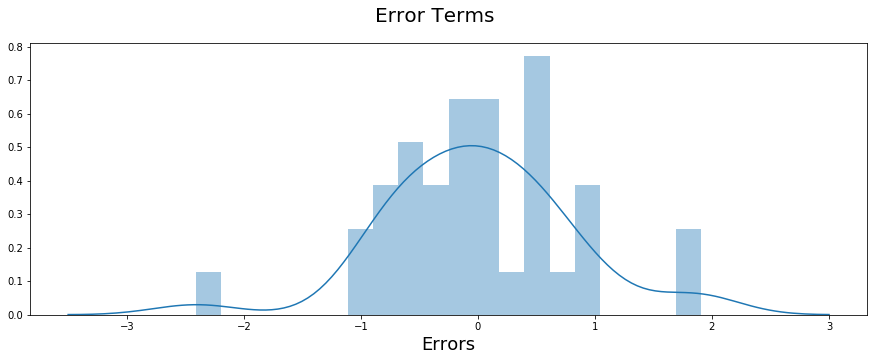

In [289]:
fig = plt.figure()
sns.distplot((y_train - y_train_gmv_sum), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### Making Predictions

In [290]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [291]:
y_test = df_test.pop('gmv_sum')
X_test = df_test

In [292]:
col_cam = ['discount','sla','Number_of_holidays']

In [293]:
X_test_rfe1 = X_test[col_cam]

In [294]:
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 7 to 22
Data columns (total 4 columns):
const                 16 non-null float64
discount              16 non-null float64
sla                   16 non-null float64
Number_of_holidays    16 non-null float64
dtypes: float64(4)
memory usage: 640.0 bytes


In [295]:
y_pred = lm2.predict(X_test_rfe1)

Text(0, 0.5, 'y_pred')

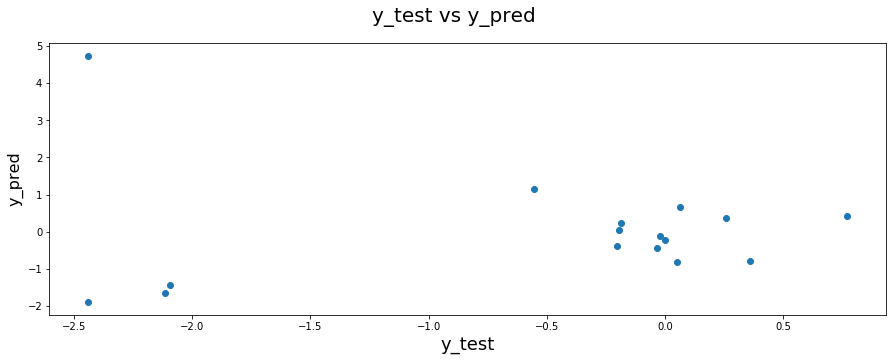

In [296]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)            
plt.ylabel('y_pred', fontsize = 16)

In [297]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [298]:
print('MSE       = ', mse)
print('R SQUARED = ', r_squared)

MSE       =  3.6537431721074
R SQUARED =  -2.401713712032599


Correlation between final predictor variables

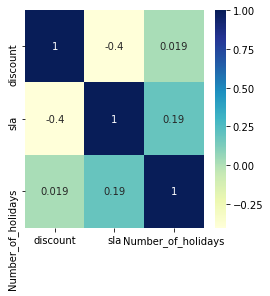

In [299]:
plt.figure(figsize=(4,4))
sns.heatmap(dfMain_lm_cam[col_cam].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Game Dataframe - Basic Linear Model

In [300]:
# dropping variables having collonearity with the target

dfMain_lm_game = dfMain_gp_game.drop(['MRP_sum','Total_Units_Sold', 'Total_Orders','Content Marketing', 'Digital','SEM'], axis=1)

In [301]:
dfMain_lm_game.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Sponsorship', 'Online marketing',
       ' Affiliates', 'Other', 'NPS', 'Stock Index', 'Numb

In [302]:
# Split the datafram into train and test sets
df_train, df_test = train_test_split(dfMain_lm_game, train_size=.7, test_size=0.3, random_state=100)

In [303]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Sponsorship', 'Online marketing',
       ' Affiliates', 'Other', 'NPS', 'Stock Index', 'Number_of_paydays',
       'gmv_sum', 'Number_of_holidays', 'is_rain', 'temp_high', 'temp_low']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [304]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv_sum')
X_train = df_train

In [305]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [306]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.25616469e+00  2.72180158e-01 -4.14457022e-01  1.72122970e+00
 -1.21621547e+00 -4.09117185e-14  1.60316205e-13  5.49560397e-14
  1.08080211e-13 -6.83897383e-14  2.72004641e-15 -3.35287353e-14
 -2.03725925e-14 -5.55111512e-15 -1.56541446e-14  2.66453526e-14
  2.97539771e-14  6.10753637e-02  8.65906319e-01 -1.94906603e-01
 -1.22291851e+00  1.00508756e+00  7.13543640e-01  7.14964415e-01
  4.18651931e-01  0.00000000e+00  0.00000000e+00  1.28697411e+00
  0.00000000e+00 -4.70690238e-01  0.00000000e+00  4.42125066e-01
  0.00000000e+00  0.00000000e+00 -7.40673922e-01  2.17229723e+00
 -4.88542365e+00  8.06724360e+00  7.19377930e-01  3.11675226e+00
  2.14315479e-01  2.62080687e-02  9.26656086e-02  4.48918640e-01
  7.17112343e-01  1.14332375e-01]
-1.2756897977168707e-15


In [307]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 25 features
lm = LinearRegression()
rfe1 = RFE(lm, 25)

# Fit with 25 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True False False  True False  True False  True False False  True  True
  True  True  True  True  True False False  True  True  True]
[ 1  1  1  1  1 13  7 12 18 10 15  8 14  5  9 11  6  3  1  1  1  1  1  1
  1 16 17  1 21  1 19  1 20 22  1  1  1  1  1  1  1  4  2  1  1  1]


In [308]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 25 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,ana_ver__GamingAccessoryKit,ana_ver__GamingAdapter,ana_ver__GamingHeadset,ana_ver__GamingKeyboard,...,TV,Sponsorship,Online marketing,Affiliates,Other,NPS,Stock Index,is_rain,temp_high,temp_low
week_number,,,,,,,,,,,,,,,,,,,,,
27,1.00,0.69,0.41,0.19,0.85,-0.48,-0.63,-0.28,0.59,-0.65,...,0.30,-0.68,0.83,0.89,1.89,-0.60,-1.37,-0.83,-0.53,-0.65
42,1.00,0.43,-0.37,-0.50,-0.26,2.99,-0.27,1.85,-0.08,1.29,...,0.45,-0.42,-0.11,0.09,-0.53,0.83,1.18,-0.83,-0.53,-0.65
29,1.00,0.48,-0.24,-0.21,-0.41,-0.43,-0.50,-0.39,0.88,-0.57,...,0.10,-1.19,0.69,0.79,2.50,-0.51,-1.33,1.21,-0.53,1.54
39,1.00,0.52,-0.38,-0.21,-0.69,0.31,0.41,2.31,-0.10,-0.01,...,2.25,0.26,0.18,0.36,1.21,0.04,-1.81,1.21,-0.53,1.54
18,1.00,0.23,-0.40,-1.15,-0.13,-0.48,0.79,0.40,0.43,-0.69,...,0.67,0.90,0.83,0.77,-0.53,-0.97,0.89,1.21,-0.53,-0.65


In [309]:
# Fitting the model with 25 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     3.826
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0120
Time:                        18:02:42   Log-Likelihood:                -10.474
No. Observations:                  37   AIC:                             72.95
Df Residuals:                      11   BIC:                             114.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [310]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [311]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Affiliates,5638.35
18,Online marketing,3937.78
17,Sponsorship,246.20
21,NPS,206.46
16,TV,140.52
5,is_prepaid,40.49
2,Avg_mrp_of_product_sold,33.16
3,product_procurement_sla,26.31
20,Other,25.36
8,ana_ver__GamingHeadset,24.13


In [312]:
X_train_rfe1.drop([' Affiliates'], axis = 1, inplace = True)

In [313]:
# Refitting with 24 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 24 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     3.650
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0116
Time:                        18:02:43   Log-Likelihood:                -13.348
No. Observations:                  37   AIC:                             76.70
Df Residuals:                      12   BIC:                             117.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [314]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Online marketing,57.38
20,NPS,54.09
16,TV,36.08
2,Avg_mrp_of_product_sold,30.04
3,product_procurement_sla,24.29
17,Sponsorship,21.52
1,sla,17.82
11,ana_ver__GamingMouse,17.01
8,ana_ver__GamingHeadset,16.58
19,Other,16.29


In [315]:
X_train_rfe1.drop(['Online marketing'], axis = 1, inplace = True)

In [316]:
# Refitting with 23 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 23 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     2.702
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0333
Time:                        18:02:43   Log-Likelihood:                -20.041
No. Observations:                  37   AIC:                             88.08
Df Residuals:                      13   BIC:                             126.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [317]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,TV,35.05
2,Avg_mrp_of_product_sold,26.56
3,product_procurement_sla,22.51
17,Sponsorship,20.37
19,NPS,18.95
1,sla,17.48
11,ana_ver__GamingMouse,16.96
18,Other,14.29
8,ana_ver__GamingHeadset,13.43
20,Stock Index,12.79


In [318]:
X_train_rfe1.drop(['Avg_mrp_of_product_sold'], axis = 1, inplace = True)

In [319]:
# Refitting with 22 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 22 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     2.949
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0205
Time:                        18:02:43   Log-Likelihood:                -20.519
No. Observations:                  37   AIC:                             87.04
Df Residuals:                      14   BIC:                             124.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [320]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,TV,22.71
16,Sponsorship,18.23
18,NPS,17.42
1,sla,15.88
19,Stock Index,10.98
3,discount,10.13
17,Other,10.04
10,ana_ver__GamingMouse,8.65
9,ana_ver__GamingMemoryCard,8.52
4,is_prepaid,7.86


In [321]:
X_train_rfe1.drop(['temp_low'], axis = 1, inplace = True)

In [322]:
# Refitting with 21 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 21 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     3.294
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0108
Time:                        18:02:43   Log-Likelihood:                -20.592
No. Observations:                  37   AIC:                             85.18
Df Residuals:                      15   BIC:                             120.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [323]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,TV,22.53
16,Sponsorship,18.21
18,NPS,17.30
1,sla,15.63
19,Stock Index,10.79
3,discount,10.13
17,Other,10.03
10,ana_ver__GamingMouse,8.49
9,ana_ver__GamingMemoryCard,7.97
7,ana_ver__GamingHeadset,7.52


In [324]:
X_train_rfe1.drop(['TV'], axis = 1, inplace = True)

In [325]:
# Refitting with 20 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 20 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     3.440
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00763
Time:                        18:02:43   Log-Likelihood:                -21.646
No. Observations:                  37   AIC:                             85.29
Df Residuals:                      16   BIC:                             119.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [326]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,NPS,17.21
1,sla,12.96
15,Sponsorship,12.45
3,discount,9.78
7,ana_ver__GamingHeadset,7.20
16,Other,6.78
9,ana_ver__GamingMemoryCard,5.70
13,ana_ver__Others,5.59
5,ana_ver__GamingAccessoryKit,5.39
8,ana_ver__GamingKeyboard,5.25


In [327]:
X_train_rfe1.drop(['temp_high'], axis = 1, inplace = True)

In [328]:
# Refitting with 19 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 19 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     3.262
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00887
Time:                        18:02:43   Log-Likelihood:                -24.086
No. Observations:                  37   AIC:                             88.17
Df Residuals:                      17   BIC:                             120.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [329]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,NPS,16.24
15,Sponsorship,11.81
1,sla,9.27
3,discount,7.61
7,ana_ver__GamingHeadset,6.31
16,Other,5.98
5,ana_ver__GamingAccessoryKit,5.39
9,ana_ver__GamingMemoryCard,5.11
8,ana_ver__GamingKeyboard,5.07
12,ana_ver__JoystickGamingWheel,4.93


In [330]:
X_train_rfe1.drop(['is_rain'], axis = 1, inplace = True)

In [331]:
# Refitting with 18 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 18 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     2.008
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0743
Time:                        18:02:43   Log-Likelihood:                -32.125
No. Observations:                  37   AIC:                             102.2
Df Residuals:                      18   BIC:                             132.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [332]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,NPS,16.08
15,Sponsorship,10.96
1,sla,9.27
3,discount,6.41
16,Other,5.79
7,ana_ver__GamingHeadset,5.70
8,ana_ver__GamingKeyboard,5.04
5,ana_ver__GamingAccessoryKit,5.00
9,ana_ver__GamingMemoryCard,4.92
13,ana_ver__Others,4.67


In [333]:
X_train_rfe1.drop(['NPS'], axis = 1, inplace = True)

In [334]:
# Refitting with 17 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 17 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     2.239
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0462
Time:                        18:02:43   Log-Likelihood:                -32.158
No. Observations:                  37   AIC:                             100.3
Df Residuals:                      19   BIC:                             129.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [335]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,sla,8.08
3,discount,6.17
7,ana_ver__GamingHeadset,5.29
5,ana_ver__GamingAccessoryKit,4.73
9,ana_ver__GamingMemoryCard,4.39
13,ana_ver__Others,4.36
12,ana_ver__JoystickGamingWheel,4.21
16,Other,3.88
8,ana_ver__GamingKeyboard,3.83
17,Stock Index,3.70


In [336]:
X_train_rfe1.drop(['ana_ver__GamingAccessoryKit'], axis = 1, inplace = True)

In [337]:
# Refitting with 16 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 16 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     2.500
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0273
Time:                        18:02:43   Log-Likelihood:                -32.176
No. Observations:                  37   AIC:                             98.35
Df Residuals:                      20   BIC:                             125.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [338]:
X_train_rfe1.drop(['is_prepaid'], axis = 1, inplace = True)

In [339]:
# Refitting with 15 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     2.764
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0162
Time:                        18:02:43   Log-Likelihood:                -32.338
No. Observations:                  37   AIC:                             96.68
Df Residuals:                      21   BIC:                             122.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [340]:
X_train_rfe1.drop(['ana_ver__GamingKeyboard'], axis = 1, inplace = True)

In [341]:
# Refitting with 14 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 14 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     3.022
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00995
Time:                        18:02:44   Log-Likelihood:                -32.656
No. Observations:                  37   AIC:                             95.31
Df Residuals:                      22   BIC:                             119.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [342]:
X_train_rfe1.drop(['Stock Index'], axis = 1, inplace = True)

In [343]:
# Refitting with 13 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 13 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.363
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00541
Time:                        18:02:44   Log-Likelihood:                -32.798
No. Observations:                  37   AIC:                             93.60
Df Residuals:                      23   BIC:                             116.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [344]:
X_train_rfe1.drop(['ana_ver__TVOutCableAccessory'], axis = 1, inplace = True)

In [345]:
# Refitting with 12 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 12 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     3.748
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00285
Time:                        18:02:44   Log-Likelihood:                -32.970
No. Observations:                  37   AIC:                             91.94
Df Residuals:                      24   BIC:                             112.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [346]:
X_train_rfe1.drop(['product_procurement_sla'], axis = 1, inplace = True)

In [347]:
# Refitting with 11 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     4.126
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00160
Time:                        18:02:44   Log-Likelihood:                -33.352
No. Observations:                  37   AIC:                             90.70
Df Residuals:                      25   BIC:                             110.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [348]:
X_train_rfe1.drop(['ana_ver__JoystickGamingWheel'], axis = 1, inplace = True)

In [349]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     4.432
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00108
Time:                        18:02:44   Log-Likelihood:                -34.093
No. Observations:                  37   AIC:                             90.19
Df Residuals:                      26   BIC:                             107.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [350]:
X_train_rfe1.drop(['ana_ver__GamingHeadset'], axis = 1, inplace = True)

In [351]:
# Refitting with 9 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 9 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     4.943
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000572
Time:                        18:02:44   Log-Likelihood:                -34.487
No. Observations:                  37   AIC:                             88.97
Df Residuals:                      27   BIC:                             105.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [352]:
X_train_rfe1.drop(['ana_ver__GamingMousePad'], axis = 1, inplace = True)

In [353]:
# Refitting with 8 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     5.430
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000352
Time:                        18:02:44   Log-Likelihood:                -35.173
No. Observations:                  37   AIC:                             88.35
Df Residuals:                      28   BIC:                             102.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [354]:
X_train_rfe1.drop(['ana_ver__GamingAdapter'], axis = 1, inplace = True)

In [355]:
# Refitting with 7 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     5.953
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000235
Time:                        18:02:44   Log-Likelihood:                -36.022
No. Observations:                  37   AIC:                             88.04
Df Residuals:                      29   BIC:                             100.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [356]:
X_train_rfe1.drop(['ana_ver__GamingMemoryCard'], axis = 1, inplace = True)

In [357]:
# Refitting with 6 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 6 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     6.733
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000136
Time:                        18:02:44   Log-Likelihood:                -36.721
No. Observations:                  37   AIC:                             87.44
Df Residuals:                      30   BIC:                             98.72
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.776e-16 

In [358]:
X_train_rfe1.drop(['Other'], axis = 1, inplace = True)

In [359]:
# Refitting with 5 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 5 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     8.163
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.23e-05
Time:                        18:02:44   Log-Likelihood:                -36.959
No. Observations:                  37   AIC:                             85.92
Df Residuals:                      31   BIC:                             95.58
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.776e-16 

In [360]:
X_train_rfe1.drop(['ana_ver__GamingMouse'], axis = 1, inplace = True)

In [361]:
# Refitting with 4 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 4 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     9.447
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.69e-05
Time:                        18:02:44   Log-Likelihood:                -38.075
No. Observations:                  37   AIC:                             86.15
Df Residuals:                      32   BIC:                             94.21
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.776e-16      0.120  -2.

## Residual Analysis

In [362]:
y_train_gmv_sum = lm2.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

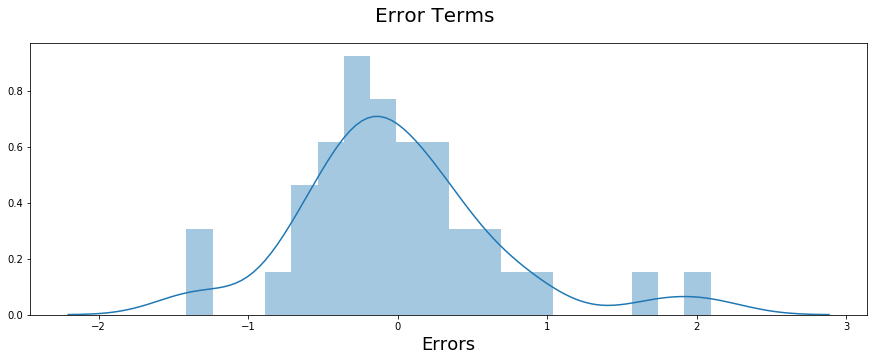

In [363]:
fig = plt.figure()
sns.distplot((y_train - y_train_gmv_sum), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### Making Predictions

In [364]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [365]:
y_test = df_test.pop('gmv_sum')
X_test = df_test

In [366]:
col_game = ['sla','discount','ana_ver__Others','Sponsorship']

In [367]:
X_test_rfe1 = X_test[col_game]

In [368]:
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 26 to 12
Data columns (total 5 columns):
const              16 non-null float64
sla                16 non-null float64
discount           16 non-null float64
ana_ver__Others    16 non-null float64
Sponsorship        16 non-null float64
dtypes: float64(5)
memory usage: 768.0 bytes


In [369]:
y_pred = lm2.predict(X_test_rfe1)

Text(0, 0.5, 'y_pred')

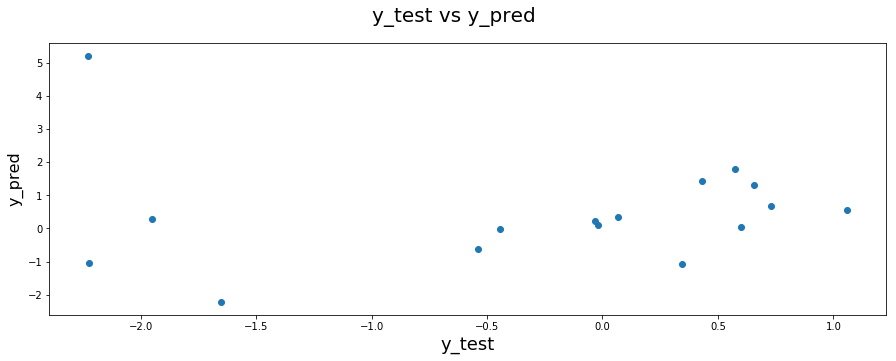

In [370]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)            
plt.ylabel('y_pred', fontsize = 16)

In [371]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [372]:
print('MSE       = ', mse)
print('R SQUARED = ', r_squared)

MSE       =  4.2505857113060905
R SQUARED =  -2.641317394999818


Correlation between final predictor variables

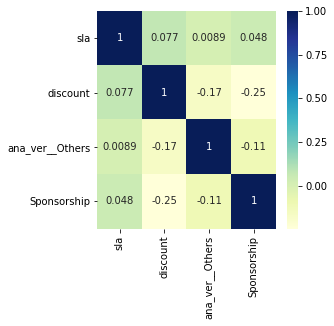

In [373]:
plt.figure(figsize=(4,4))
sns.heatmap(dfMain_lm_game[col_game].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Home Dataframe - Basic Linear Model

In [374]:
# dropping variables having collonearity with the target

dfMain_lm_home = dfMain_gp_home.drop(['MRP_sum','Total_Units_Sold','Total_Orders'], axis=1)

In [375]:
# Split the datafram into train and test sets

df_train, df_test = train_test_split(dfMain_lm_home, train_size=.7, test_size=0.3, random_state=100)

In [376]:
dfMain_lm_home.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM

In [377]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates','SEM', 'Other', 'NPS',
       'Stock Index', 'Number_of_paydays', 'gmv_sum', 'Number_of_holidays',
       'is_rain', 'temp_high', 'temp_low']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [378]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv_sum')
X_train = df_train

In [379]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [380]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-4.91503494e-02 -4.93990701e-01 -1.09953048e-01  1.02251394e+00
  1.29219616e-01  7.29012721e-01  1.79891102e-11 -4.55597712e-12
 -3.85919074e-12  1.33985045e-11 -2.57754929e-12 -2.39019915e-12
  1.77474702e-12  6.16468529e-02  2.04358359e+00 -7.07039982e-12
  9.37583344e-14  1.55875313e-12  1.30639943e-12 -3.28570504e-13
  5.64881475e-13 -2.39808173e-13  2.16271445e-13  5.86197757e-14
  1.26121336e-13  5.40250368e-01 -1.83705628e+00  0.00000000e+00
  0.00000000e+00 -1.54447250e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.27186975e-02 -3.31892951e+01  2.73441074e+01
  2.64221037e+01 -5.67622896e+01 -7.68507363e+01  1.05952338e+02
  2.83789195e+01  1.98375857e+01  9.86011168e+00 -4.88978295e+00
  4.38584839e-01  1.23214997e-01 -2.44212512e-01 -6.90654912e-01
  6.82141951e-01]
-2.608883722696843e-14


In [381]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 20 features
lm = LinearRegression()
rfe1 = RFE(lm, 20)

# Fit with 20 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[False  True False  True False  True False False False False False False
 False False  True False False False False False False False False False
 False  True  True False False  True False False False False  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True]
[ 8  1  5  1  4  1 11 13  9 15 12 10 16  7  1 14 20 23 18 21 19 24 25 22
 17  1  1 26 27  1 28 29 30  6  1  1  1  1  1  1  1  1  1  1  1  3  2  1
  1]


In [382]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 20 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,Avg_mrp_of_product_sold,discount,ana_ver__BoomBox,ana_ver__FMRadio,ana_ver__HiFiSystem,ana_ver__HomeAudioSpeaker,ana_ver__Others,TV,Digital,...,Content Marketing,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,Number_of_paydays,temp_high,temp_low
week_number,,,,,,,,,,,,,,,,,,,,,
29,1.00,-0.09,0.09,-0.48,-0.44,-1.32,0.49,-0.49,0.20,-0.70,...,0.17,0.79,0.88,-0.51,2.39,-0.51,-1.19,1.30,-0.45,1.22
30,1.00,0.55,0.87,-1.03,-0.90,-0.95,1.00,-0.26,0.26,-0.70,...,0.20,0.89,0.98,-0.50,2.48,-0.51,-1.19,-0.77,-0.45,1.22
39,1.00,-1.36,-0.50,-0.60,0.80,1.26,-0.81,0.86,2.00,-0.22,...,-0.47,-0.01,0.14,-0.44,0.97,0.16,-1.66,-0.77,-0.45,1.22
21,1.00,-0.15,-0.67,-0.16,0.92,0.72,-0.53,-0.53,0.04,-0.46,...,-0.68,0.19,0.37,-0.41,-0.57,-0.54,1.07,-0.77,-0.45,1.22
11,1.00,-0.63,-0.18,2.22,1.02,0.74,-1.50,-0.12,-0.23,-0.47,...,-0.25,-0.38,-0.46,-0.35,-0.57,-0.56,-0.58,1.30,-0.45,-0.82


In [383]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     7.757
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000155
Time:                        18:02:52   Log-Likelihood:                -6.0585
No. Observations:                  35   AIC:                             54.12
Df Residuals:                      14   BIC:                             86.78
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [384]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [385]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Affiliates,132418.57
12,Online marketing,61364.97
11,Content Marketing,45476.71
8,TV,14305.70
9,Digital,13382.49
14,SEM,8933.23
10,Sponsorship,8061.59
15,Other,4707.98
16,NPS,1309.94
6,ana_ver__HomeAudioSpeaker,798.05


In [386]:
X_train_rfe1.drop(['ana_ver__HomeAudioSpeaker'], axis = 1, inplace = True)

In [387]:
# Refitting with 19 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 19 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     7.874
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.69e-05
Time:                        18:02:52   Log-Likelihood:                -7.7409
No. Observations:                  35   AIC:                             55.48
Df Residuals:                      15   BIC:                             86.59
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    9

In [388]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Affiliates,32144.44
11,Online marketing,18417.17
10,Content Marketing,6488.63
13,SEM,2564.01
7,TV,2526.32
8,Digital,1549.47
9,Sponsorship,1525.56
14,Other,779.44
15,NPS,331.96
16,Stock Index,120.61


In [389]:
X_train_rfe1.drop(['ana_ver__Others'], axis = 1, inplace = True)

In [390]:
# Refitting with 18 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 18 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     8.857
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.14e-05
Time:                        18:02:52   Log-Likelihood:                -7.7570
No. Observations:                  35   AIC:                             53.51
Df Residuals:                      16   BIC:                             83.07
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    9

In [391]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Affiliates,25054.06
10,Online marketing,14628.66
9,Content Marketing,5252.93
12,SEM,2245.90
6,TV,1985.18
8,Sponsorship,1379.57
7,Digital,1060.35
13,Other,687.25
14,NPS,284.99
15,Stock Index,52.00


In [392]:
X_train_rfe1.drop(['Avg_mrp_of_product_sold'], axis = 1, inplace = True)

In [393]:
# Refitting with 17 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 17 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     9.410
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.43e-05
Time:                        18:02:52   Log-Likelihood:                -8.6640
No. Observations:                  35   AIC:                             53.33
Df Residuals:                      17   BIC:                             81.32
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.714e-17    

In [394]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Affiliates,22479.63
9,Online marketing,12667.33
8,Content Marketing,4935.10
11,SEM,2009.00
5,TV,1833.65
7,Sponsorship,1303.40
6,Digital,1034.51
12,Other,646.02
13,NPS,282.38
14,Stock Index,49.21


In [395]:
X_train_rfe1.drop(['temp_low'], axis = 1, inplace = True)

In [396]:
# Refitting with 16 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 16 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     8.833
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.62e-05
Time:                        18:02:52   Log-Likelihood:                -11.503
No. Observations:                  35   AIC:                             57.01
Df Residuals:                      18   BIC:                             83.45
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.714e-17    

In [397]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Affiliates,20228.23
9,Online marketing,11256.13
8,Content Marketing,4329.29
5,TV,1638.00
11,SEM,1590.05
7,Sponsorship,1122.49
6,Digital,1022.85
12,Other,544.94
13,NPS,257.95
14,Stock Index,49.20


In [398]:
X_train_rfe1.drop(['ana_ver__FMRadio'], axis = 1, inplace = True)

In [399]:
# Refitting with 15 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     4.544
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00124
Time:                        18:02:52   Log-Likelihood:                -23.005
No. Observations:                  35   AIC:                             78.01
Df Residuals:                      19   BIC:                             102.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.714e-17    

In [400]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Affiliates,3596.71
8,Online marketing,2398.40
7,Content Marketing,931.47
5,Digital,530.10
4,TV,324.43
10,SEM,308.42
6,Sponsorship,220.81
11,Other,113.67
12,NPS,26.14
13,Stock Index,12.19


In [401]:
X_train_rfe1.drop(['ana_ver__BoomBox'], axis = 1, inplace = True)

In [402]:
# Refitting with 14 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 14 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     5.045
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000577
Time:                        18:02:52   Log-Likelihood:                -23.219
No. Observations:                  35   AIC:                             76.44
Df Residuals:                      20   BIC:                             99.77
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.714e-17    

In [403]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Affiliates,3466.19
7,Online marketing,2238.81
6,Content Marketing,925.94
4,Digital,529.25
3,TV,322.28
9,SEM,306.92
5,Sponsorship,214.90
10,Other,113.60
11,NPS,25.85
12,Stock Index,12.13


In [404]:
X_train_rfe1.drop(['ana_ver__HiFiSystem'], axis = 1, inplace = True)

In [405]:
# Refitting with 13 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 13 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     5.205
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000435
Time:                        18:02:52   Log-Likelihood:                -24.457
No. Observations:                  35   AIC:                             76.91
Df Residuals:                      21   BIC:                             98.69
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.714e-17      0.10

In [406]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Affiliates,2589.13
6,Online marketing,1702.68
5,Content Marketing,731.61
3,Digital,379.51
8,SEM,305.61
2,TV,223.92
4,Sponsorship,168.56
9,Other,86.15
10,NPS,25.84
11,Stock Index,9.66


In [407]:
X_train_rfe1.drop(['Stock Index'], axis = 1, inplace = True)

In [408]:
# Refitting with 12 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 12 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     5.488
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000290
Time:                        18:02:52   Log-Likelihood:                -25.433
No. Observations:                  35   AIC:                             76.87
Df Residuals:                      22   BIC:                             97.08
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.714e-17      0.10

In [409]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Affiliates,1427.09
6,Online marketing,1081.50
5,Content Marketing,462.96
3,Digital,331.35
8,SEM,209.45
4,Sponsorship,118.12
2,TV,117.77
9,Other,66.99
10,NPS,16.29
12,temp_high,3.13


In [410]:
X_train_rfe1.drop(['SEM'], axis = 1, inplace = True)

In [411]:
# Refitting with 11 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     6.089
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000135
Time:                        18:02:52   Log-Likelihood:                -25.792
No. Observations:                  35   AIC:                             75.58
Df Residuals:                      23   BIC:                             94.25
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.714e-17      0.10

In [412]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Affiliates,1012.29
6,Online marketing,726.24
5,Content Marketing,426.11
3,Digital,280.37
2,TV,106.64
4,Sponsorship,105.80
8,Other,59.99
9,NPS,11.03
11,temp_high,3.00
1,discount,2.79


In [413]:
X_train_rfe1.drop(['NPS'], axis = 1, inplace = True)

In [414]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     6.562
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.99e-05
Time:                        18:02:52   Log-Likelihood:                -26.607
No. Observations:                  35   AIC:                             75.21
Df Residuals:                      24   BIC:                             92.32
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.714e-17      0.10

In [415]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Affiliates,696.48
6,Online marketing,562.85
5,Content Marketing,396.49
3,Digital,258.50
2,TV,81.70
4,Sponsorship,69.55
8,Other,50.20
10,temp_high,2.85
1,discount,2.52
9,Number_of_paydays,1.55


In [416]:
X_train_rfe1.drop([' Affiliates'], axis = 1, inplace = True)

In [417]:
# Refitting with 9 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 9 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     6.591
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.63e-05
Time:                        18:02:53   Log-Likelihood:                -28.388
No. Observations:                  35   AIC:                             76.78
Df Residuals:                      25   BIC:                             92.33
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.714e-17      0.10

In [418]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Content Marketing,330.26
3,Digital,204.18
6,Online marketing,43.55
2,TV,39.18
7,Other,34.16
4,Sponsorship,30.94
9,temp_high,2.84
1,discount,2.52
8,Number_of_paydays,1.54
0,const,1.00


In [419]:
X_train_rfe1.drop(['temp_high'], axis = 1, inplace = True)

In [420]:
# Refitting with 8 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     6.537
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000111
Time:                        18:02:53   Log-Likelihood:                -30.371
No. Observations:                  35   AIC:                             78.74
Df Residuals:                      26   BIC:                             92.74
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.714e-17      0.11

In [421]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Content Marketing,216.31
3,Digital,133.08
6,Online marketing,33.14
2,TV,22.60
7,Other,21.65
4,Sponsorship,20.71
1,discount,2.51
8,Number_of_paydays,1.48
0,const,1.00


In [422]:
X_train_rfe1.drop(['Number_of_paydays'], axis = 1, inplace = True)

In [423]:
# Refitting with 7 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     5.698
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000404
Time:                        18:02:53   Log-Likelihood:                -33.788
No. Observations:                  35   AIC:                             83.58
Df Residuals:                      27   BIC:                             96.02
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.714e-17      0.12

In [424]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Content Marketing,188.22
3,Digital,119.08
6,Online marketing,31.27
2,TV,20.22
7,Other,18.93
4,Sponsorship,17.05
1,discount,2.18
0,const,1.00


In [425]:
X_train_rfe1.drop(['Content Marketing'], axis = 1, inplace = True)

In [426]:
# Refitting with 6 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 6 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     6.468
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000230
Time:                        18:02:53   Log-Likelihood:                -34.445
No. Observations:                  35   AIC:                             82.89
Df Residuals:                      28   BIC:                             93.78
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.714e-17      0.122  

In [427]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Sponsorship,3.62
5,Online marketing,3.10
2,TV,2.44
6,Other,2.21
1,discount,2.18
3,Digital,2.15
0,const,1.00


In [428]:
X_train_rfe1.drop(['Online marketing'], axis = 1, inplace = True)

In [429]:
# Refitting with 5 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 5 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     7.674
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000107
Time:                        18:02:53   Log-Likelihood:                -34.912
No. Observations:                  35   AIC:                             81.82
Df Residuals:                      29   BIC:                             91.16
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.714e-17      0.122   7.97e-16      

In [430]:
X_train_rfe1.drop(['Other'], axis = 1, inplace = True)

In [431]:
# Refitting with 4 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 4 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     9.842
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.29e-05
Time:                        18:02:53   Log-Likelihood:                -34.993
No. Observations:                  35   AIC:                             79.99
Df Residuals:                      30   BIC:                             87.76
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.714e-17      0.120   8.09e-16      

In [432]:
X_train_rfe1.drop(['TV'], axis = 1, inplace = True)

In [433]:
# Refitting with 3 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 3 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     13.45
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.57e-06
Time:                        18:02:53   Log-Likelihood:                -35.077
No. Observations:                  35   AIC:                             78.15
Df Residuals:                      31   BIC:                             84.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.714e-17      0.118   8.21e-16      

In [434]:
X_train_rfe1.drop(['Sponsorship'], axis = 1, inplace = True)

In [435]:
# Refitting with 2 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 2 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     19.07
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.53e-06
Time:                        18:02:53   Log-Likelihood:                -35.930
No. Observations:                  35   AIC:                             77.86
Df Residuals:                      32   BIC:                             82.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.714e-17      0.119   8.14e-16      1.0

## Residual Analysis

In [436]:
y_train_gmv_sum = lm2.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

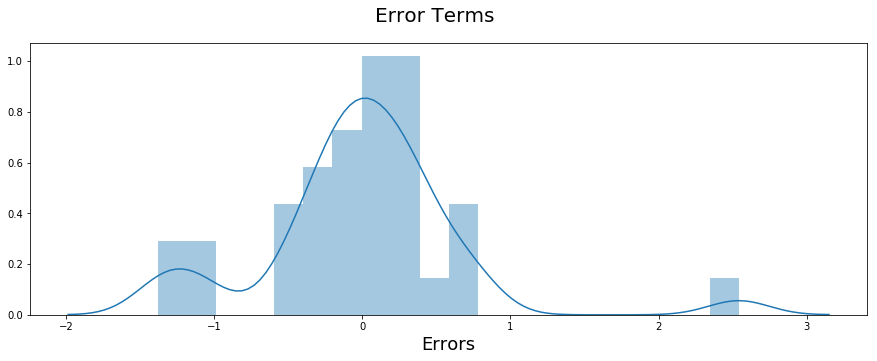

In [437]:
fig = plt.figure()
sns.distplot((y_train - y_train_gmv_sum), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### Making Predictions

In [438]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [439]:
y_test = df_test.pop('gmv_sum')
X_test = df_test

In [440]:
col_home = ['discount','Digital']

In [441]:
X_test_rfe1 = X_test[col_home]

In [442]:
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 10 to 42
Data columns (total 3 columns):
const       15 non-null float64
discount    15 non-null float64
Digital     15 non-null float64
dtypes: float64(3)
memory usage: 480.0 bytes


In [443]:
y_pred = lm2.predict(X_test_rfe1)

Text(0, 0.5, 'y_pred')

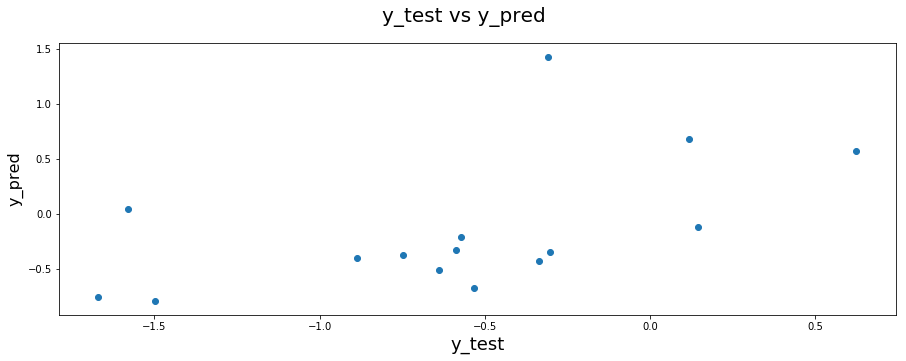

In [444]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)            
plt.ylabel('y_pred', fontsize = 16)

In [445]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [446]:
print('MSE       = ', mse)
print('R SQUARED = ', r_squared)

MSE       =  0.5326443299196653
R SQUARED =  -0.368512032893626


Correlation between final predictor variables

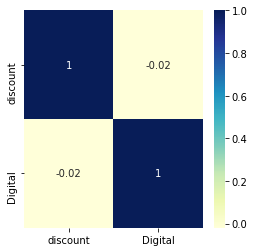

In [447]:
plt.figure(figsize=(4,4))
sns.heatmap(dfMain_lm_home[col_home].corr(), cmap="YlGnBu", annot=True)
plt.show()

# DISTRIBUTED LAG MODEL

### CAMERA - Distributed Lag Model

In [448]:
columns_to_be_dropped=['MRP_sum', 'Total_Units_Sold', 'Total_Orders']

In [449]:
dfMain_gp_cam = dfMain_gp_cam.rename(columns={" Affiliates":"Affiliates"}) 

In [450]:
dfMain_gp_cam_used_lag=pd.DataFrame(dfMain_gp_cam)

In [451]:
dfMain_gp_cam_used_lag.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [452]:
lagfeatures_considered=['discount', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
                        'Affiliates', 'SEM', 'Other', 'gmv_sum', 'Avg_mrp_of_product_sold']

In [453]:
lag_df_cam1=dfMain_gp_cam_used_lag[lagfeatures_considered].shift(1, axis = 0).fillna(0)

lag_df_cam1.columns=['discount_1', 'TV_1', 'Digital_1', 'Sponsorship_1', 'Content Marketing_1',
                     'Online marketing_1', 'Affiliates_1', 'SEM_1', 'Other_1', 'gmv_sum_1', 'Avg_mrp_of_product_sold_1']

lag_df_cam2=dfMain_gp_cam_used_lag[lagfeatures_considered].shift(2, axis = 0).fillna(0)

lag_df_cam2.columns=['discount_2', 'TV_2', 'Digital_2', 'Sponsorship_2', 'Content Marketing_2', 
                     'Online marketing_2', 'Affiliates_2', 'SEM_2', 'Other_2', 'gmv_sum_2', 'Avg_mrp_of_product_sold_2']

In [454]:
lag_df_cam1.head()

,discount_1,TV_1,Digital_1,Sponsorship_1,Content Marketing_1,Online marketing_1,Affiliates_1,SEM_1,Other_1,gmv_sum_1,Avg_mrp_of_product_sold_1
week_number,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,43.96,0.00,0.04,0.13,0.00,0.02,0.01,0.09,0.00,727191.00,2588.31
3,45.48,0.00,0.04,0.12,0.00,0.02,0.01,0.08,0.00,4259358.00,2435.23
4,45.30,0.00,0.04,0.13,0.00,0.02,0.01,0.09,0.00,4510191.00,2587.34
5,44.40,0.00,0.04,0.13,0.00,0.02,0.01,0.09,0.00,4070630.00,2452.30


In [455]:
lag_df_cam2.head()

,discount_2,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2,Other_2,gmv_sum_2,Avg_mrp_of_product_sold_2
week_number,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,43.96,0.00,0.04,0.13,0.00,0.02,0.01,0.09,0.00,727191.00,2588.31
4,45.48,0.00,0.04,0.12,0.00,0.02,0.01,0.08,0.00,4259358.00,2435.23
5,45.30,0.00,0.04,0.13,0.00,0.02,0.01,0.09,0.00,4510191.00,2587.34


In [456]:
dfMain_gp_cam_used_lag=dfMain_gp_cam_used_lag.join(lag_df_cam1)
dfMain_gp_cam_used_lag=dfMain_gp_cam_used_lag.join(lag_df_cam2)
dfMain_gp_cam_used_lag.head()

,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2,Other_2,gmv_sum_2,Avg_mrp_of_product_sold_2
week_number,,,,,,,,,,,,,,,,,,,,,
1,5.90,2588.31,2.83,43.96,0.36,0.00,0.01,0.11,0.22,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,7.23,2435.23,2.77,45.48,0.32,0.00,0.01,0.12,0.23,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,6.19,2587.34,2.87,45.30,0.34,0.00,0.01,0.10,0.24,0.07,...,0.00,0.04,0.13,0.00,0.02,0.01,0.09,0.00,727191.00,2588.31
4,6.39,2452.30,2.84,44.40,0.32,0.00,0.02,0.10,0.25,0.09,...,0.00,0.04,0.12,0.00,0.02,0.01,0.08,0.00,4259358.00,2435.23
5,6.46,2318.20,2.80,44.67,0.29,0.00,0.02,0.09,0.24,0.09,...,0.00,0.04,0.13,0.00,0.02,0.01,0.09,0.00,4510191.00,2587.34


In [457]:
dfMain_gp_cam_used_lag['Avg_mrp_of_product_sold_1']=dfMain_gp_cam_used_lag['Avg_mrp_of_product_sold_1'].replace(0,1)

dfMain_gp_cam_used_lag['Avg_mrp_of_product_sold_1'].describe()

count     52.00
mean    2165.50
std      437.18
min        1.00
25%     1990.64
50%     2192.75
75%     2441.25
max     2831.47
Name: Avg_mrp_of_product_sold_1, dtype: float64

In [458]:
dfMain_gp_cam_used_lag['shelf_inflation']=dfMain_gp_cam_used_lag['Avg_mrp_of_product_sold']/dfMain_gp_cam_used_lag['Avg_mrp_of_product_sold_1']

In [459]:
dfMain_gp_cam_used_lag.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [460]:
dfMain_gp_cam_used_lag.drop(['ana_ver__BoomBox', 'ana_ver__CameraAccessory', 'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls', 'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter', 'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset', 'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad', 'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others', 'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 
       'ana_ver__Telescope', 'ana_ver__VoiceRecorder', 'Avg_mrp_of_product_sold_1', 'Avg_mrp_of_product_sold_2'], inplace=True, axis=1)


In [461]:
dfMain_gp_cam_used_lag.drop(columns_to_be_dropped, axis=1, inplace=True)

In [462]:
dfMain_gp_cam_used_lag.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Other', 'NPS', 'Stock Index',
       'Number_of_paydays', 'gmv_sum', 'Number_of_holidays', 'is_rain',
       'temp_high', 'temp_low', 'discount_1', 'TV_1', 'Digital_1',
       'Sponsorship_1', 'Content Marketing_1', 'Online marketing_1',
       'Affiliates_1', 'SEM_1', 'Other_1', 'gmv_sum_1', 'discount_2', 'TV_2',
       'Digital_2', 'Sponsorship_2', 'Content Marketing_2',
       'Online marketing_2', 'Affiliates_2', 'SEM_2', 'Other_2', 'gmv_sum_2',
       'shelf_inflation'],
      dtype='object')

In [463]:
dfMain_gp_cam_used_lag=dfMain_gp_cam_used_lag.replace(0,0.0001)
dfMain_gp_cam_used_lag = pd.DataFrame(np.log(dfMain_gp_cam_used_lag))
dfMain_gp_cam_used_lag.shape

(52, 42)

In [464]:
from sklearn.model_selection import train_test_split

y = dfMain_gp_cam_used_lag.pop('gmv_sum')
X = dfMain_gp_cam_used_lag
# We specify this so that the train and test data set always have the same rows, respectively

In [465]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [466]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object using StandardScaler()
scaler = StandardScaler()

#'Fit' and transform the train set; and transform using the fit on the test set later
X_train = scaler.fit_transform(X_train)



In [467]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [468]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41, 41)
(41, 1)
(11, 41)
(11, 1)


In [469]:
X_train=pd.DataFrame(X_train)
X_train.columns=dfMain_gp_cam_used_lag.columns
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train, y_train)

In [470]:
sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x : x[2])#[:15]

[('sla', True, 1),
 ('discount', True, 1),
 ('TV', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('discount_1', True, 1),
 ('TV_1', True, 1),
 ('Digital_1', True, 1),
 ('Sponsorship_1', True, 1),
 ('Content Marketing_1', True, 1),
 ('Online marketing_1', True, 1),
 ('Affiliates_1', True, 1),
 ('SEM_1', True, 1),
 ('Other_1', True, 1),
 ('gmv_sum_1', True, 1),
 ('discount_2', True, 1),
 ('Sponsorship_2', True, 1),
 ('Content Marketing_2', True, 1),
 ('Online marketing_2', True, 1),
 ('Affiliates_2', True, 1),
 ('SEM_2', True, 1),
 ('Other_2', True, 1),
 ('gmv_sum_2', True, 1),
 ('is_rain', False, 2),
 ('Stock Index', False, 3),
 ('is_prepaid', False, 4),
 ('temp_high', False, 5),
 ('product_procurement_sla', False, 6),
 ('Digital_2', False, 7),
 ('Avg_mrp_of_product_sold', False, 8),
 ('shelf_inflation', False, 9),
 ('Number_of_holidays', False, 10),
 ('NPS', False, 11),
 ('Other', False, 12),
 ('Digital'

In [471]:
#significant dependent variables

col = X_train.columns[rfe.support_]
col

Index(['sla', 'discount', 'TV', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'discount_1', 'TV_1', 'Digital_1',
       'Sponsorship_1', 'Content Marketing_1', 'Online marketing_1',
       'Affiliates_1', 'SEM_1', 'Other_1', 'gmv_sum_1', 'discount_2',
       'Sponsorship_2', 'Content Marketing_2', 'Online marketing_2',
       'Affiliates_2', 'SEM_2', 'Other_2', 'gmv_sum_2'],
      dtype='object')

In [472]:
# Now, the latest training set will be

X_train_rfe = X_train[col]
X_train_rfe.head()

,sla,discount,TV,Sponsorship,Content Marketing,Online marketing,Affiliates,discount_1,TV_1,Digital_1,...,Other_1,gmv_sum_1,discount_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2,Other_2,gmv_sum_2
0,0.36,-0.96,-0.07,-0.90,0.44,0.41,0.45,0.17,0.16,0.29,...,-0.64,0.24,0.20,-0.37,0.57,0.46,0.48,-0.02,1.65,0.30
1,-0.73,-1.38,-2.41,-1.51,-2.30,-2.56,-2.56,-6.31,-3.64,-4.68,...,-0.64,-5.83,-4.41,-3.80,-1.04,-3.54,-3.50,-4.12,-0.64,-4.11
2,-1.27,1.66,0.29,1.00,0.45,0.20,0.15,0.11,0.28,-0.15,...,-0.64,0.20,0.19,0.67,0.47,0.30,0.26,0.15,-0.64,0.31
3,0.96,-0.67,0.35,-0.70,-0.10,0.37,0.45,0.15,0.42,-0.09,...,-0.64,0.29,0.20,0.60,0.86,0.44,0.42,0.88,-0.64,0.30
4,0.58,-1.18,0.36,-0.29,0.15,0.36,0.41,0.12,0.35,-0.18,...,-0.64,0.19,0.20,-0.03,0.07,0.40,0.43,0.07,-0.64,0.27


In [473]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
print(lm1.summary())
X_train_new = X_train_rfe1.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     7.757
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000155
Time:                        18:02:58   Log-Likelihood:                -6.0585
No. Observations:                  35   AIC:                             54.12
Df Residuals:                      14   BIC:                             86.78
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
12,Online marketing_1,87767.85
13,Affiliates_1,76699.17
20,Online marketing_2,46525.80
21,Affiliates_2,39137.50
5,Online marketing,21933.41
6,Affiliates,21280.57
7,discount_1,1683.78
17,discount_2,1234.42
14,SEM_1,629.18
16,gmv_sum_1,627.57


In [474]:
X_train_rfe2 = X_train_rfe1.drop('Online marketing_2', axis=1)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm2.summary())
X_train_new = X_train_rfe2.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     3.492
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00620
Time:                        18:02:58   Log-Likelihood:                 3.3832
No. Observations:                  41   AIC:                             43.23
Df Residuals:                      16   BIC:                             86.07
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
12,Online marketing_1,83792.06
13,Affiliates_1,73278.67
5,Online marketing,20250.84
6,Affiliates,20056.65
7,discount_1,1672.00
17,discount_2,963.03
16,gmv_sum_1,627.33
14,SEM_1,614.24
11,Content Marketing_1,602.42
10,Sponsorship_1,533.88


In [475]:
X_train_rfe3 = X_train_rfe2.drop('Affiliates_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe3.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     3.568
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00473
Time:                        18:02:58   Log-Likelihood:                 1.9845
No. Observations:                  41   AIC:                             44.03
Df Residuals:                      17   BIC:                             85.16
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
5,Online marketing,19855.09
6,Affiliates,19472.82
7,discount_1,1656.37
16,discount_2,878.38
15,gmv_sum_1,625.76
11,Content Marketing_1,505.50
12,Online marketing_1,475.92
10,Sponsorship_1,362.01
19,Affiliates_2,340.49
13,SEM_1,333.27


In [476]:
X_train_rfe4 = X_train_rfe3.drop('Online marketing', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe4.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     3.819
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00276
Time:                        18:02:58   Log-Likelihood:                 1.4183
No. Observations:                  41   AIC:                             43.16
Df Residuals:                      18   BIC:                             82.58
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
6,discount_1,1415.01
15,discount_2,753.59
14,gmv_sum_1,492.00
10,Content Marketing_1,473.84
11,Online marketing_1,466.21
9,Sponsorship_1,361.99
18,Affiliates_2,294.86
7,TV_1,236.64
17,Content Marketing_2,206.15
21,gmv_sum_2,181.58


In [477]:
X_train_rfe5 = X_train_rfe4.drop('discount_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe5.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     3.245
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00625
Time:                        18:02:58   Log-Likelihood:                -2.9199
No. Observations:                  41   AIC:                             49.84
Df Residuals:                      19   BIC:                             87.54
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
6,discount_1,482.97
14,gmv_sum_1,356.95
11,Online marketing_1,329.39
9,Sponsorship_1,210.11
17,Affiliates_2,208.18
7,TV_1,182.66
10,Content Marketing_1,136.24
20,gmv_sum_2,119.49
12,SEM_1,81.47
5,Affiliates,80.31


In [478]:
X_train_rfe6=X_train_rfe5.drop('discount_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe6).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe6.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     3.475
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00380
Time:                        18:02:58   Log-Likelihood:                -3.4279
No. Observations:                  41   AIC:                             48.86
Df Residuals:                      20   BIC:                             84.84
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
10,Online marketing_1,274.18
16,Affiliates_2,204.30
13,gmv_sum_1,122.47
8,Sponsorship_1,121.38
19,gmv_sum_2,117.46
11,SEM_1,81.47
5,Affiliates,80.10
14,Sponsorship_2,78.28
9,Content Marketing_1,61.74
6,TV_1,43.98


In [479]:
X_train_rfe7 = X_train_rfe6.drop('Online marketing_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe7).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe7.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     3.831
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00187
Time:                        18:02:58   Log-Likelihood:                -3.4670
No. Observations:                  41   AIC:                             46.93
Df Residuals:                      21   BIC:                             81.21
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
15,Affiliates_2,181.90
18,gmv_sum_2,116.86
8,Sponsorship_1,114.80
13,Sponsorship_2,72.09
12,gmv_sum_1,70.56
10,SEM_1,68.77
5,Affiliates,54.04
6,TV_1,43.83
16,SEM_2,41.40
9,Content Marketing_1,32.84


In [480]:
X_train_rfe8 = X_train_rfe7.drop('Affiliates_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe8).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe8.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3.657
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00233
Time:                        18:02:58   Log-Likelihood:                -5.7676
No. Observations:                  41   AIC:                             49.54
Df Residuals:                      22   BIC:                             82.09
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
8,Sponsorship_1,110.21
13,Sponsorship_2,72.07
12,gmv_sum_1,70.23
10,SEM_1,65.20
15,SEM_2,40.44
6,TV_1,39.44
17,gmv_sum_2,35.48
5,Affiliates,33.62
9,Content Marketing_1,32.32
4,Content Marketing,27.91


In [481]:
X_train_rfe9 = X_train_rfe8.drop('Sponsorship_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe9).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe9.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     3.968
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00126
Time:                        18:02:58   Log-Likelihood:                -6.0758
No. Observations:                  41   AIC:                             48.15
Df Residuals:                      23   BIC:                             79.00
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
9,SEM_1,60.28
6,TV_1,39.25
11,gmv_sum_1,37.23
12,Sponsorship_2,33.85
14,SEM_2,32.78
5,Affiliates,31.57
16,gmv_sum_2,26.39
7,Digital_1,24.35
4,Content Marketing,22.31
8,Content Marketing_1,21.16


In [482]:
X_train_rfe10 = X_train_rfe9.drop('SEM_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe10).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe10.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     4.395
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000577
Time:                        18:02:58   Log-Likelihood:                -6.0882
No. Observations:                  41   AIC:                             46.18
Df Residuals:                      24   BIC:                             75.31
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
11,Sponsorship_2,32.67
13,SEM_2,31.93
6,TV_1,31.73
5,Affiliates,30.58
4,Content Marketing,21.61
15,gmv_sum_2,21.35
8,Content Marketing_1,19.12
2,TV,18.03
10,gmv_sum_1,13.61
3,Sponsorship,8.18


In [483]:
X_train_rfe11 = X_train_rfe10.drop('Sponsorship_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe11).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe11.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     4.654
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000361
Time:                        18:02:58   Log-Likelihood:                -6.8191
No. Observations:                  41   AIC:                             45.64
Df Residuals:                      25   BIC:                             73.06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
5,Affiliates,30.03
6,TV_1,28.09
4,Content Marketing,21.60
14,gmv_sum_2,19.79
12,SEM_2,18.35
2,TV,17.63
8,Content Marketing_1,17.09
10,gmv_sum_1,13.51
7,Digital_1,6.28
3,Sponsorship,5.19


In [484]:
X_train_rfe12 = X_train_rfe11.drop('Affiliates', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe12).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe12.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     5.081
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000178
Time:                        18:02:58   Log-Likelihood:                -7.1272
No. Observations:                  41   AIC:                             44.25
Df Residuals:                      26   BIC:                             69.96
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
5,TV_1,27.00
13,gmv_sum_2,17.72
11,SEM_2,16.18
7,Content Marketing_1,16.01
2,TV,13.79
9,gmv_sum_1,13.27
4,Content Marketing,8.16
6,Digital_1,5.56
10,Content Marketing_2,4.73
3,Sponsorship,4.52


In [485]:
X_train_rfe13 = X_train_rfe12.drop('TV_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe13).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe13.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     5.516
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.18e-05
Time:                        18:02:59   Log-Likelihood:                -7.5709
No. Observations:                  41   AIC:                             43.14
Df Residuals:                      27   BIC:                             67.13
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
12,gmv_sum_2,16.93
10,SEM_2,14.36
8,gmv_sum_1,6.45
4,Content Marketing,6.15
6,Content Marketing_1,5.62
5,Digital_1,5.52
9,Content Marketing_2,4.35
3,Sponsorship,4.17
2,TV,4.14
7,Other_1,3.58


In [486]:
X_train_rfe14 = X_train_rfe13.drop('gmv_sum_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe14).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe14.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     6.053
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.33e-05
Time:                        18:02:59   Log-Likelihood:                -7.9205
No. Observations:                  41   AIC:                             41.84
Df Residuals:                      28   BIC:                             64.12
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
4,Content Marketing,6.14
6,Content Marketing_1,4.92
5,Digital_1,4.30
3,Sponsorship,4.10
2,TV,4.06
8,gmv_sum_1,3.71
7,Other_1,3.57
11,Other_2,3.53
9,Content Marketing_2,3.41
10,SEM_2,3.08


In [487]:
X_train_rfe15 = X_train_rfe14.drop('Content Marketing', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe15).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe15.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     6.716
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.87e-05
Time:                        18:02:59   Log-Likelihood:                -8.1882
No. Observations:                  41   AIC:                             40.38
Df Residuals:                      29   BIC:                             60.94
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
4,Digital_1,4.24
5,Content Marketing_1,4.21
7,gmv_sum_1,3.66
3,Sponsorship,3.57
10,Other_2,3.53
6,Other_1,3.48
8,Content Marketing_2,3.36
2,TV,3.03
9,SEM_2,2.82
1,discount,2.63


In [488]:
X_train_rfe16 = X_train_rfe15.drop('Digital_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe16).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe16.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     7.642
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.42e-06
Time:                        18:02:59   Log-Likelihood:                -8.1888
No. Observations:                  41   AIC:                             38.38
Df Residuals:                      30   BIC:                             57.23
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
4,Content Marketing_1,3.92
9,Other_2,3.53
5,Other_1,3.42
7,Content Marketing_2,3.25
2,TV,3.00
3,Sponsorship,2.86
8,SEM_2,2.61
1,discount,2.57
6,gmv_sum_1,2.18
0,sla,1.82


In [489]:
X_train_rfe17 = X_train_rfe16.drop('Content Marketing_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe17).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe17.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     8.773
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.06e-06
Time:                        18:02:59   Log-Likelihood:                -8.1907
No. Observations:                  41   AIC:                             36.38
Df Residuals:                      31   BIC:                             53.52
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
8,Other_2,3.51
5,Other_1,3.35
2,TV,2.92
3,Sponsorship,2.61
7,SEM_2,2.61
1,discount,2.49
6,gmv_sum_1,2.18
4,Content Marketing_1,1.98
0,sla,1.82


In [490]:
X_train_rfe18 = X_train_rfe17.drop('Other_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe18).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe18.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     10.19
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.13e-07
Time:                        18:02:59   Log-Likelihood:                -8.1926
No. Observations:                  41   AIC:                             34.39
Df Residuals:                      32   BIC:                             49.81
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
2,TV,2.92
6,SEM_2,2.61
3,Sponsorship,2.57
1,discount,2.34
5,gmv_sum_1,2.18
4,Content Marketing_1,1.94
7,Other_2,1.89
0,sla,1.81


In [491]:
X_train_rfe19 = X_train_rfe18.drop('Sponsorship', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe19).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe19.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     11.88
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.89e-07
Time:                        18:02:59   Log-Likelihood:                -8.3512
No. Observations:                  41   AIC:                             32.70
Df Residuals:                      33   BIC:                             46.41
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
5,SEM_2,2.60
2,TV,2.15
4,gmv_sum_1,2.15
1,discount,2.08
3,Content Marketing_1,1.92
0,sla,1.81
6,Other_2,1.18


In [492]:
X_train_rfe20 = X_train_rfe19.drop('Other_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe20).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe20.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     14.06
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.62e-08
Time:                        18:02:59   Log-Likelihood:                -8.5774
No. Observations:                  41   AIC:                             31.15
Df Residuals:                      34   BIC:                             43.15
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
5,SEM_2,2.53
2,TV,2.14
4,gmv_sum_1,2.13
1,discount,1.99
3,Content Marketing_1,1.88
0,sla,1.81


In [493]:
X_train_rfe21 = X_train_rfe20.drop('SEM_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe21).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe21.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     16.97
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.67e-08
Time:                        18:02:59   Log-Likelihood:                -8.9174
No. Observations:                  41   AIC:                             29.83
Df Residuals:                      35   BIC:                             40.12
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
1,discount,1.97
3,Content Marketing_1,1.88
0,sla,1.78
2,TV,1.77
4,gmv_sum_1,1.36


In [494]:
X_train_rfe22 = X_train_rfe21.drop('TV', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe22).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe22.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     20.20
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.50e-09
Time:                        18:02:59   Log-Likelihood:                -10.023
No. Observations:                  41   AIC:                             30.05
Df Residuals:                      36   BIC:                             38.61
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3038    

,Features,VIF
1,discount,1.97
0,sla,1.77
3,gmv_sum_1,1.33
2,Content Marketing_1,1.28


In [495]:
X_test = scaler.transform(X_test)

In [496]:
X_test = pd.DataFrame(X_test)
X_test.columns=dfMain_gp_cam_used_lag.columns
X_test = sm.add_constant(X_test)
X_test.head()

,const,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,TV,Digital,Sponsorship,Content Marketing,...,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2,Other_2,gmv_sum_2,shelf_inflation
0,1.00,-0.47,-1.06,-14.02,6.77,-20.35,-5.35,-0.24,-3.40,-4.27,...,-1.08,0.38,-0.37,-1.63,-0.93,-0.98,-0.00,-0.64,0.10,0.09
1,1.00,0.34,-1.15,-0.19,-0.12,-0.60,-0.00,0.13,-0.81,0.47,...,0.22,0.34,-0.05,0.52,0.48,0.50,0.11,-0.64,0.32,-0.26
2,1.00,-1.22,-1.82,-1.32,0.55,2.25,0.79,-0.47,0.20,-0.19,...,0.83,0.39,0.55,0.36,0.43,0.47,0.14,1.64,0.29,-0.12
3,1.00,0.07,-0.64,-1.08,0.62,-0.34,1.16,0.25,0.62,0.27,...,0.36,0.35,0.09,0.50,0.47,0.50,0.12,1.08,0.30,-0.24
4,1.00,-0.07,-2.66,-1.86,1.07,-1.05,0.30,0.20,-0.43,0.47,...,0.16,0.26,-0.11,0.48,0.42,0.43,0.04,-0.64,0.30,-0.32


In [497]:
predictor_cols=['const', 'discount', 'sla', 'gmv_sum_1', 'Content Marketing_1']
X_test = X_test[predictor_cols]

In [498]:
y_pred = lm3.predict(X_test)

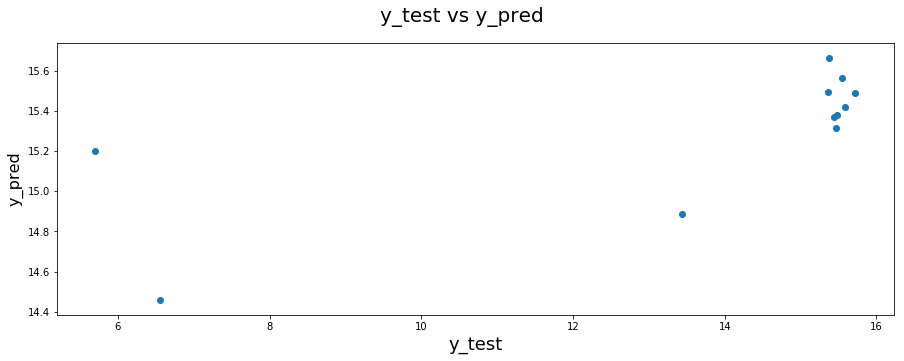

In [499]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

In [500]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [501]:
print('MSE       = ', mse)
print('R SQUARED = ', r_squared)

MSE       =  14.098845678373817
R SQUARED =  -0.09963260500505977


### GAME - Distributed Lag Model

In [502]:
dfMain_gp_game = dfMain_gp_game.rename(columns={" Affiliates":"Affiliates"}) 

In [503]:
dfMain_gp_game_used_lag=pd.DataFrame(dfMain_gp_game)

In [504]:
dfMain_gp_game_used_lag.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [505]:
lagfeatures_considered=['discount', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 
                        'Affiliates', 'SEM', 'Other', 'gmv_sum', 'Avg_mrp_of_product_sold']

In [506]:
lag_df_game1=dfMain_gp_game_used_lag[lagfeatures_considered].shift(1, axis = 0).fillna(0)

lag_df_game1.columns=['discount_1', 'TV_1', 'Digital_1', 'Sponsorship_1', 'Content Marketing_1', 'Online marketing_1', 
                        'Affiliates_1', 'SEM_1', 'Other_1', 'gmv_sum_1', 'Avg_mrp_of_product_sold_1']

lag_df_game2=dfMain_gp_game_used_lag[lagfeatures_considered].shift(2, axis = 0).fillna(0)

lag_df_game2.columns=['discount_2', 'TV_2', 'Digital_2', 'Sponsorship_2', 'Content Marketing_2', 'Online marketing_2', 
                        'Affiliates_2', 'SEM_2', 'Other_2', 'gmv_sum_2', 'Avg_mrp_of_product_sold_2']

In [507]:
lag_df_game1.head()

,discount_1,TV_1,Digital_1,Sponsorship_1,Content Marketing_1,Online marketing_1,Affiliates_1,SEM_1,Other_1,gmv_sum_1,Avg_mrp_of_product_sold_1
week_number,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,45.41,0.00,0.05,0.16,0.00,0.03,0.01,0.11,0.00,781440.00,1881.22
3,37.44,0.01,0.06,0.18,0.00,0.03,0.01,0.12,0.00,2517369.00,1885.04
4,44.74,0.01,0.07,0.20,0.00,0.04,0.01,0.14,0.00,2268893.36,2089.27
5,39.51,0.01,0.07,0.19,0.00,0.03,0.01,0.13,0.00,2602381.50,2348.76


In [508]:
lag_df_game2.head()

,discount_2,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2,Other_2,gmv_sum_2,Avg_mrp_of_product_sold_2
week_number,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,45.41,0.00,0.05,0.16,0.00,0.03,0.01,0.11,0.00,781440.00,1881.22
4,37.44,0.01,0.06,0.18,0.00,0.03,0.01,0.12,0.00,2517369.00,1885.04
5,44.74,0.01,0.07,0.20,0.00,0.04,0.01,0.14,0.00,2268893.36,2089.27


In [509]:
dfMain_gp_game_used_lag=dfMain_gp_game_used_lag.join(lag_df_game1)
dfMain_gp_game_used_lag=dfMain_gp_game_used_lag.join(lag_df_game2)
dfMain_gp_game_used_lag.head()

,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2,Other_2,gmv_sum_2,Avg_mrp_of_product_sold_2
week_number,,,,,,,,,,,,,,,,,,,,,
1,4.21,1881.22,3.63,45.41,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,6.05,1885.04,2.95,37.44,0.24,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,5.10,2089.27,2.79,44.74,0.25,0.00,0.00,0.00,0.00,0.00,...,0.00,0.05,0.16,0.00,0.03,0.01,0.11,0.00,781440.00,1881.22
4,5.46,2348.76,2.49,39.51,0.22,0.00,0.00,0.00,0.00,0.00,...,0.01,0.06,0.18,0.00,0.03,0.01,0.12,0.00,2517369.00,1885.04
5,5.68,7040.42,3.69,46.97,0.21,0.00,0.00,0.00,0.00,0.00,...,0.01,0.07,0.20,0.00,0.04,0.01,0.14,0.00,2268893.36,2089.27


In [510]:
dfMain_gp_game_used_lag['Avg_mrp_of_product_sold_1']=dfMain_gp_game_used_lag['Avg_mrp_of_product_sold_1'].replace(0,1)
dfMain_gp_game_used_lag['Avg_mrp_of_product_sold_1'].describe()

count     53.00
mean    2008.24
std     1039.45
min        1.00
25%     1639.06
50%     1744.76
75%     1952.55
max     7040.42
Name: Avg_mrp_of_product_sold_1, dtype: float64

In [511]:
dfMain_gp_game_used_lag['shelf_inflation']=dfMain_gp_game_used_lag['Avg_mrp_of_product_sold']/dfMain_gp_game_used_lag['Avg_mrp_of_product_sold_1']

In [512]:
dfMain_gp_game_used_lag.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [513]:
dfMain_gp_game_used_lag.drop(['ana_ver__BoomBox', 'ana_ver__CameraAccessory', 'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls', 'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter', 'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset', 'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad', 'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others', 'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 
       'ana_ver__Telescope', 'ana_ver__VoiceRecorder', 'Avg_mrp_of_product_sold_1', 'Avg_mrp_of_product_sold_2'], inplace=True, axis=1)


In [514]:
dfMain_gp_game_used_lag.drop(columns_to_be_dropped, axis=1, inplace=True)

In [515]:
dfMain_gp_game_used_lag.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Other', 'NPS', 'Stock Index',
       'Number_of_paydays', 'gmv_sum', 'Number_of_holidays', 'is_rain',
       'temp_high', 'temp_low', 'discount_1', 'TV_1', 'Digital_1',
       'Sponsorship_1', 'Content Marketing_1', 'Online marketing_1',
       'Affiliates_1', 'SEM_1', 'Other_1', 'gmv_sum_1', 'discount_2', 'TV_2',
       'Digital_2', 'Sponsorship_2', 'Content Marketing_2',
       'Online marketing_2', 'Affiliates_2', 'SEM_2', 'Other_2', 'gmv_sum_2',
       'shelf_inflation'],
      dtype='object')

In [516]:
dfMain_gp_game_used_lag=dfMain_gp_game_used_lag.replace(0,0.0001)
dfMain_gp_game_used_lag = pd.DataFrame(np.log(dfMain_gp_game_used_lag))
dfMain_gp_game_used_lag.shape

(53, 42)

In [517]:
from sklearn.model_selection import train_test_split

y = dfMain_gp_game_used_lag.pop('gmv_sum')
X = dfMain_gp_game_used_lag
# We specify this so that the train and test data set always have the same rows, respectively

In [518]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [519]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object using StandardScaler()
scaler = StandardScaler()

#'Fit' and transform the train set; and transform using the fit on the test set later
X_train = scaler.fit_transform(X_train)

In [520]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [521]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42, 41)
(42, 1)
(11, 41)
(11, 1)


In [522]:
X_train=pd.DataFrame(X_train)
X_train.columns=dfMain_gp_game_used_lag.columns

# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train, y_train)

In [523]:
sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x : x[2])#[:15]

[('sla', True, 1),
 ('is_prepaid', True, 1),
 ('TV', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Other', True, 1),
 ('NPS', True, 1),
 ('discount_1', True, 1),
 ('TV_1', True, 1),
 ('Digital_1', True, 1),
 ('Content Marketing_1', True, 1),
 ('Online marketing_1', True, 1),
 ('Affiliates_1', True, 1),
 ('SEM_1', True, 1),
 ('gmv_sum_1', True, 1),
 ('TV_2', True, 1),
 ('Digital_2', True, 1),
 ('Sponsorship_2', True, 1),
 ('Content Marketing_2', True, 1),
 ('Online marketing_2', True, 1),
 ('Affiliates_2', True, 1),
 ('SEM_2', True, 1),
 ('Digital', False, 2),
 ('Other_1', False, 3),
 ('temp_high', False, 4),
 ('Sponsorship_1', False, 5),
 ('shelf_inflation', False, 6),
 ('Stock Index', False, 7),
 ('Avg_mrp_of_product_sold', False, 8),
 ('product_procurement_sla', False, 9),
 ('gmv_sum_2', False, 10),
 ('Number_of_paydays', False, 11),
 ('discount', False, 12),
 ('Number_of_holidays'

In [524]:
# significant dependent variables

col = X_train.columns[rfe.support_]
col

Index(['sla', 'is_prepaid', 'TV', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Other', 'NPS', 'discount_1',
       'TV_1', 'Digital_1', 'Content Marketing_1', 'Online marketing_1',
       'Affiliates_1', 'SEM_1', 'gmv_sum_1', 'TV_2', 'Digital_2',
       'Sponsorship_2', 'Content Marketing_2', 'Online marketing_2',
       'Affiliates_2', 'SEM_2'],
      dtype='object')

In [525]:
# Now, the latest training set will be

X_train_rfe = X_train[col]
X_train_rfe.head()

,sla,is_prepaid,TV,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Other,NPS,...,Affiliates_1,SEM_1,gmv_sum_1,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2
0,0.10,-0.15,-0.39,0.35,0.56,0.62,0.55,0.17,1.26,-0.48,...,0.52,0.26,0.30,0.48,-0.25,0.31,0.18,0.42,0.44,0.08
1,-0.04,0.04,1.02,0.69,0.32,0.47,0.54,-0.17,1.55,0.05,...,0.52,0.04,0.27,0.25,0.30,-0.04,0.53,0.48,0.50,0.11
2,0.04,-0.05,0.09,-0.59,0.47,0.50,0.54,-0.33,-0.70,0.43,...,0.47,-0.03,0.26,0.40,-0.23,-0.34,0.61,0.50,0.52,0.01
3,-2.57,0.39,-1.90,-1.37,-1.91,-2.14,-2.18,-0.82,-0.70,1.62,...,-4.38,-5.67,-5.74,-2.69,-3.89,-3.82,-0.97,-3.46,-3.43,-4.20
4,0.72,0.08,0.31,0.97,0.45,0.26,0.21,-0.08,-0.70,-0.59,...,0.23,0.06,0.19,0.43,0.07,0.73,0.54,0.39,0.37,0.25


In [526]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
print(lm1.summary())
X_train_new = X_train_rfe1.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     7.757
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000155
Time:                        18:03:00   Log-Likelihood:                -6.0585
No. Observations:                  35   AIC:                             54.12
Df Residuals:                      14   BIC:                             86.78
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
22,Online marketing_2,57943.19
23,Affiliates_2,53943.86
14,Online marketing_1,42385.69
15,Affiliates_1,40747.49
5,Online marketing,33823.07
6,Affiliates,31578.39
24,SEM_2,590.44
16,SEM_1,577.92
4,Content Marketing,505.87
10,discount_1,470.68


In [527]:
X_train_rfe2 = X_train_rfe1.drop('Online marketing_2', axis=1)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm2.summary())
X_train_new = X_train_rfe2.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     40.19
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.02e-10
Time:                        18:03:00   Log-Likelihood:                 13.591
No. Observations:                  42   AIC:                             22.82
Df Residuals:                      17   BIC:                             66.26
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
14,Online marketing_1,41268.64
15,Affiliates_1,39548.95
5,Online marketing,32921.03
6,Affiliates,31110.80
16,SEM_1,566.75
22,Affiliates_2,509.97
23,SEM_2,459.85
10,discount_1,390.09
4,Content Marketing,380.44
17,gmv_sum_1,315.48


In [528]:
X_train_rfe3 = X_train_rfe2.drop('Online marketing_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe3.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     29.35
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.25e-10
Time:                        18:03:00   Log-Likelihood:                 5.0858
No. Observations:                  42   AIC:                             37.83
Df Residuals:                      18   BIC:                             79.53
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
5,Online marketing,32494.96
6,Affiliates,30908.32
14,Affiliates_1,717.77
21,Affiliates_2,449.83
22,SEM_2,443.68
15,SEM_1,413.98
10,discount_1,376.83
4,Content Marketing,344.35
16,gmv_sum_1,252.98
2,TV,223.71


In [529]:
X_train_rfe4 = X_train_rfe3.drop('Online marketing', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe4.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     30.15
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.71e-10
Time:                        18:03:00   Log-Likelihood:                 3.6158
No. Observations:                  42   AIC:                             38.77
Df Residuals:                      19   BIC:                             78.73
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
13,Affiliates_1,577.23
20,Affiliates_2,425.06
21,SEM_2,400.48
9,discount_1,376.34
14,SEM_1,348.32
15,gmv_sum_1,244.09
5,Affiliates,194.65
4,Content Marketing,187.35
17,Digital_2,171.81
16,TV_2,171.20


In [530]:
X_train_rfe5 = X_train_rfe4.drop('Affiliates_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe5.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     25.24
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.86e-10
Time:                        18:03:00   Log-Likelihood:                -1.9843
No. Observations:                  42   AIC:                             47.97
Df Residuals:                      20   BIC:                             86.20
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
9,discount_1,352.02
20,SEM_2,337.46
19,Affiliates_2,331.32
13,SEM_1,306.14
14,gmv_sum_1,234.73
4,Content Marketing,165.85
16,Digital_2,152.00
15,TV_2,141.35
12,Content Marketing_1,103.30
11,Digital_1,96.01


In [531]:
X_train_rfe6=X_train_rfe5.drop('discount_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe6).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe6.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     27.78
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.24e-11
Time:                        18:03:00   Log-Likelihood:                -2.0170
No. Observations:                  42   AIC:                             46.03
Df Residuals:                      21   BIC:                             82.53
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
19,SEM_2,335.56
18,Affiliates_2,325.51
15,Digital_2,151.93
14,TV_2,139.86
4,Content Marketing,129.70
12,SEM_1,125.98
5,Affiliates,93.67
9,TV_1,73.60
10,Digital_1,64.04
13,gmv_sum_1,56.01


In [532]:
X_train_rfe7 = X_train_rfe6.drop('SEM_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe7).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe7.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     28.37
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.81e-11
Time:                        18:03:00   Log-Likelihood:                -3.5713
No. Observations:                  42   AIC:                             47.14
Df Residuals:                      22   BIC:                             81.90
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
4,Content Marketing,98.88
5,Affiliates,66.86
18,Affiliates_2,66.28
12,SEM_1,62.66
9,TV_1,59.84
14,TV_2,54.95
10,Digital_1,39.04
2,TV,38.95
13,gmv_sum_1,37.13
11,Content Marketing_1,33.98


In [533]:
X_train_rfe8 = X_train_rfe7.drop('Content Marketing', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe8).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe8.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     30.73
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.96e-12
Time:                        18:03:00   Log-Likelihood:                -3.9460
No. Observations:                  42   AIC:                             45.89
Df Residuals:                      23   BIC:                             78.91
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
17,Affiliates_2,65.23
11,SEM_1,58.94
13,TV_2,54.76
8,TV_1,45.16
2,TV,36.46
12,gmv_sum_1,35.54
4,Affiliates,35.44
9,Digital_1,34.69
15,Sponsorship_2,29.06
10,Content Marketing_1,23.65


In [534]:
X_train_rfe9 = X_train_rfe8.drop('Affiliates_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe9).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe9.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     27.64
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.90e-12
Time:                        18:03:00   Log-Likelihood:                -8.0762
No. Observations:                  42   AIC:                             52.15
Df Residuals:                      24   BIC:                             83.43
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
11,SEM_1,56.72
8,TV_1,36.88
2,TV,34.56
9,Digital_1,34.45
13,TV_2,31.23
4,Affiliates,31.08
15,Sponsorship_2,26.02
12,gmv_sum_1,22.48
10,Content Marketing_1,22.28
7,NPS,18.27


In [535]:
X_train_rfe10 = X_train_rfe9.drop('SEM_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe10).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe10.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     25.55
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.38e-11
Time:                        18:03:00   Log-Likelihood:                -11.654
No. Observations:                  42   AIC:                             57.31
Df Residuals:                      25   BIC:                             86.85
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
8,TV_1,36.18
2,TV,32.52
12,TV_2,30.43
4,Affiliates,25.60
14,Sponsorship_2,24.10
10,Content Marketing_1,21.90
7,NPS,16.35
11,gmv_sum_1,15.22
15,Content Marketing_2,13.63
13,Digital_2,11.81


In [536]:
X_train_rfe11 = X_train_rfe10.drop('TV_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe11).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe11.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     28.21
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.65e-12
Time:                        18:03:00   Log-Likelihood:                -11.746
No. Observations:                  42   AIC:                             55.49
Df Residuals:                      26   BIC:                             83.30
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
11,TV_2,24.96
13,Sponsorship_2,24.09
4,Affiliates,22.79
2,TV,19.05
7,NPS,15.10
8,Digital_1,11.46
12,Digital_2,11.08
10,gmv_sum_1,10.05
14,Content Marketing_2,10.02
5,SEM,8.24


In [537]:
X_train_rfe12 = X_train_rfe11.drop('TV_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe12).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe12.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     31.38
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.62e-13
Time:                        18:03:01   Log-Likelihood:                -11.756
No. Observations:                  42   AIC:                             53.51
Df Residuals:                      27   BIC:                             79.58
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
4,Affiliates,21.07
2,TV,17.79
12,Sponsorship_2,14.18
7,NPS,10.80
11,Digital_2,10.74
8,Digital_1,10.35
10,gmv_sum_1,9.24
5,SEM,6.70
13,Content Marketing_2,6.53
9,Content Marketing_1,6.51


In [538]:
X_train_rfe13 = X_train_rfe12.drop('Affiliates', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe13).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe13.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     34.70
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.60e-14
Time:                        18:03:01   Log-Likelihood:                -11.952
No. Observations:                  42   AIC:                             51.90
Df Residuals:                      28   BIC:                             76.23
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
11,Sponsorship_2,14.17
10,Digital_2,10.73
7,Digital_1,9.78
2,TV,9.55
6,NPS,8.62
9,gmv_sum_1,8.50
4,SEM,6.66
12,Content Marketing_2,6.52
8,Content Marketing_1,6.50
3,Sponsorship,5.43


In [539]:
X_train_rfe14 = X_train_rfe13.drop('Sponsorship_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe14).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe14.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     33.08
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.16e-13
Time:                        18:03:01   Log-Likelihood:                -15.157
No. Observations:                  42   AIC:                             56.31
Df Residuals:                      29   BIC:                             78.90
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
2,TV,9.15
6,NPS,8.58
7,Digital_1,7.65
4,SEM,6.63
8,Content Marketing_1,6.23
9,gmv_sum_1,5.64
1,is_prepaid,4.12
0,sla,4.11
11,Content Marketing_2,3.98
3,Sponsorship,3.80


In [540]:
X_train_rfe15 = X_train_rfe14.drop('NPS', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe15).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe15.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     34.62
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.15e-14
Time:                        18:03:01   Log-Likelihood:                -16.630
No. Observations:                  42   AIC:                             57.26
Df Residuals:                      30   BIC:                             78.11
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
2,TV,6.28
6,Digital_1,6.17
7,Content Marketing_1,6.05
8,gmv_sum_1,5.47
4,SEM,3.77
10,Content Marketing_2,3.77
3,Sponsorship,3.76
0,sla,3.51
1,is_prepaid,2.91
9,Digital_2,2.63


In [541]:
X_train_rfe16 = X_train_rfe15.drop('Digital_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe16).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe16.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     39.31
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.03e-15
Time:                        18:03:01   Log-Likelihood:                -16.648
No. Observations:                  42   AIC:                             55.30
Df Residuals:                      31   BIC:                             74.41
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
2,TV,6.27
6,Content Marketing_1,5.25
9,Content Marketing_2,3.77
3,Sponsorship,3.72
0,sla,3.51
7,gmv_sum_1,2.84
1,is_prepaid,2.68
4,SEM,2.52
8,Digital_2,2.37
5,Other,1.76


In [542]:
X_train_rfe17 = X_train_rfe16.drop('TV', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe17).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe17.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     36.66
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.28e-14
Time:                        18:03:01   Log-Likelihood:                -20.641
No. Observations:                  42   AIC:                             61.28
Df Residuals:                      32   BIC:                             78.66
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
5,Content Marketing_1,4.73
8,Content Marketing_2,3.70
0,sla,3.38
6,gmv_sum_1,2.73
2,Sponsorship,2.71
3,SEM,2.40
1,is_prepaid,2.25
7,Digital_2,1.95
4,Other,1.58


In [543]:
X_train_rfe18 = X_train_rfe17.drop('Sponsorship', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe18).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe18.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     42.42
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.49e-15
Time:                        18:03:01   Log-Likelihood:                -20.691
No. Observations:                  42   AIC:                             59.38
Df Residuals:                      33   BIC:                             75.02
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
4,Content Marketing_1,4.37
7,Content Marketing_2,3.50
0,sla,3.38
5,gmv_sum_1,2.73
1,is_prepaid,1.91
2,SEM,1.90
6,Digital_2,1.86
3,Other,1.49


In [544]:
X_train_rfe19 = X_train_rfe18.drop('Content Marketing_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe19).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe19.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     49.54
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.34e-16
Time:                        18:03:01   Log-Likelihood:                -20.849
No. Observations:                  42   AIC:                             57.70
Df Residuals:                      34   BIC:                             71.60
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
0,sla,3.21
5,gmv_sum_1,2.73
4,Content Marketing_1,2.41
1,is_prepaid,1.90
2,SEM,1.89
6,Digital_2,1.86
3,Other,1.49


In [545]:
X_train_rfe20 = X_train_rfe19.drop('SEM', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe20).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe20.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     57.74
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.06e-16
Time:                        18:03:01   Log-Likelihood:                -21.422
No. Observations:                  42   AIC:                             56.84
Df Residuals:                      35   BIC:                             69.01
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
0,sla,3.19
4,gmv_sum_1,2.63
1,is_prepaid,1.87
3,Content Marketing_1,1.71
5,Digital_2,1.70
2,Other,1.17


In [546]:
X_train_rfe21 = X_train_rfe20.drop('Other', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe21).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe21.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     69.18
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.91e-17
Time:                        18:03:01   Log-Likelihood:                -21.989
No. Observations:                  42   AIC:                             55.98
Df Residuals:                      36   BIC:                             66.40
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
0,sla,3.19
3,gmv_sum_1,2.60
1,is_prepaid,1.85
4,Digital_2,1.65
2,Content Marketing_1,1.57


In [547]:
X_train_rfe22 = X_train_rfe21.drop('gmv_sum_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe22).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe22.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     86.20
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.13e-18
Time:                        18:03:01   Log-Likelihood:                -22.570
No. Observations:                  42   AIC:                             55.14
Df Residuals:                      37   BIC:                             63.83
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
0,sla,2.19
1,is_prepaid,1.78
2,Content Marketing_1,1.57
3,Digital_2,1.22


In [548]:
X_train_rfe23 = X_train_rfe22.drop('Digital_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe23).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe23.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     114.8
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.22e-19
Time:                        18:03:01   Log-Likelihood:                -23.092
No. Observations:                  42   AIC:                             54.18
Df Residuals:                      38   BIC:                             61.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.6452    

,Features,VIF
0,sla,2.10
1,is_prepaid,1.64
2,Content Marketing_1,1.46


In [549]:
X_test = scaler.transform(X_test)

In [550]:
X_test = pd.DataFrame(X_test)
X_test.columns=dfMain_gp_game_used_lag.columns
X_test = sm.add_constant(X_test)
X_test.head()

,const,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,TV,Digital,Sponsorship,Content Marketing,...,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2,Other_2,gmv_sum_2,shelf_inflation
0,1.00,0.21,-0.12,-0.14,1.71,-0.19,0.57,0.69,0.90,0.66,...,0.54,0.56,0.65,0.68,0.50,0.48,0.55,-0.63,0.33,-0.12
1,1.00,-0.26,-0.46,-1.64,0.09,0.05,-0.30,-0.28,0.05,-0.47,...,-0.03,-0.30,0.42,0.62,0.56,0.53,0.31,1.44,0.37,-0.18
2,1.00,-1.23,-0.62,-1.30,-0.60,0.02,-0.28,-0.25,0.08,-0.46,...,0.03,0.06,0.28,-0.24,0.04,0.03,-0.09,-0.63,0.35,-0.39
3,1.00,0.34,-0.75,0.11,-0.63,0.07,0.93,0.20,0.57,0.27,...,0.85,0.41,0.57,0.41,0.47,0.51,0.18,1.74,0.40,-0.13
4,1.00,2.04,2.75,-7.52,6.74,1.29,-3.96,0.02,-2.71,-3.46,...,-0.87,0.47,-0.27,-1.37,-0.77,-0.81,0.10,-0.63,0.14,0.91


In [551]:
predictor_cols=['const', 'sla', 'is_prepaid', 'Content Marketing_1']
X_test = X_test[predictor_cols]

In [552]:
y_pred = lm3.predict(X_test)

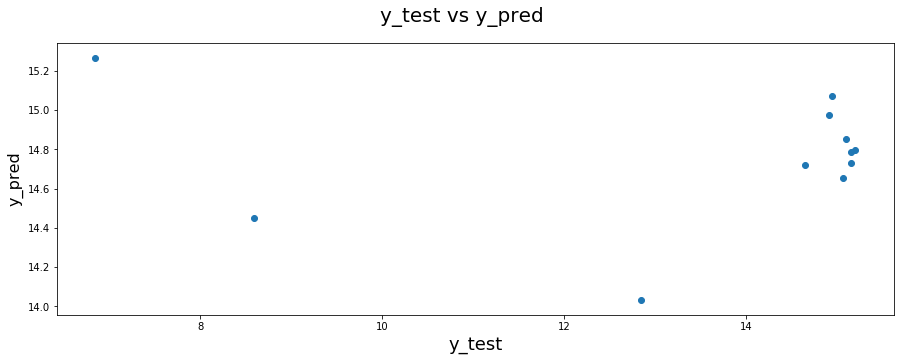

In [553]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

In [554]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [555]:
print('MSE       = ', mse)
print('R SQUARED = ', r_squared)

MSE       =  9.766777884897841
R SQUARED =  -0.22635006668662494


### HOME - Distributed Lag Model

In [556]:
dfMain_gp_home = dfMain_gp_home.rename(columns={" Affiliates":"Affiliates"}) 

In [557]:
dfMain_gp_home_used_lag=pd.DataFrame(dfMain_gp_home)

In [558]:
dfMain_gp_home_used_lag.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [559]:
lagfeatures_considered=['discount', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 
                        'Affiliates', 'SEM', 'Other', 'gmv_sum', 'Avg_mrp_of_product_sold']

In [560]:
lag_df_home1=dfMain_gp_home_used_lag[lagfeatures_considered].shift(1, axis = 0).fillna(0)

lag_df_home1.columns=['discount_1', 'TV_1', 'Digital_1', 'Sponsorship_1', 'Content Marketing_1', 'Online marketing_1', 
                        'Affiliates_1', 'SEM_1', 'Other_1', 'gmv_sum_1', 'Avg_mrp_of_product_sold_1']

lag_df_home2=dfMain_gp_home_used_lag[lagfeatures_considered].shift(2, axis = 0).fillna(0)

lag_df_home2.columns=['discount_2', 'TV_2', 'Digital_2', 'Sponsorship_2', 'Content Marketing_2', 'Online marketing_2', 
                        'Affiliates_2', 'SEM_2', 'Other_2', 'gmv_sum_2', 'Avg_mrp_of_product_sold_2']

In [561]:
lag_df_home1.head()

,discount_1,TV_1,Digital_1,Sponsorship_1,Content Marketing_1,Online marketing_1,Affiliates_1,SEM_1,Other_1,gmv_sum_1,Avg_mrp_of_product_sold_1
week_number,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,32.04,0.01,0.10,0.30,0.00,0.05,0.02,0.20,0.00,915524.00,3670.39
3,32.97,0.01,0.10,0.29,0.00,0.05,0.02,0.19,0.00,5224169.13,3458.00
4,33.79,0.01,0.10,0.29,0.00,0.05,0.02,0.20,0.00,5184479.00,3659.49
5,33.68,0.01,0.10,0.29,0.00,0.05,0.02,0.19,0.00,4402879.00,3468.47


In [562]:
lag_df_home2.head()

,discount_2,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2,Other_2,gmv_sum_2,Avg_mrp_of_product_sold_2
week_number,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,32.04,0.01,0.10,0.30,0.00,0.05,0.02,0.20,0.00,915524.00,3670.39
4,32.97,0.01,0.10,0.29,0.00,0.05,0.02,0.19,0.00,5224169.13,3458.00
5,33.79,0.01,0.10,0.29,0.00,0.05,0.02,0.20,0.00,5184479.00,3659.49


In [563]:
dfMain_gp_home_used_lag=dfMain_gp_home_used_lag.join(lag_df_home1)
dfMain_gp_home_used_lag=dfMain_gp_home_used_lag.join(lag_df_home2)
dfMain_gp_home_used_lag.head()

,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2,Other_2,gmv_sum_2,Avg_mrp_of_product_sold_2
week_number,,,,,,,,,,,,,,,,,,,,,
1,6.51,3670.39,2.78,32.04,0.27,0.05,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,7.57,3458.00,2.84,32.97,0.24,0.03,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,6.99,3659.49,2.80,33.79,0.22,0.04,0.00,0.00,0.00,0.00,...,0.01,0.10,0.30,0.00,0.05,0.02,0.20,0.00,915524.00,3670.39
4,7.12,3468.47,2.82,33.68,0.21,0.03,0.00,0.00,0.00,0.00,...,0.01,0.10,0.29,0.00,0.05,0.02,0.19,0.00,5224169.13,3458.00
5,7.36,3651.90,2.66,33.87,0.23,0.02,0.00,0.00,0.00,0.00,...,0.01,0.10,0.29,0.00,0.05,0.02,0.20,0.00,5184479.00,3659.49


In [564]:
dfMain_gp_home_used_lag['Avg_mrp_of_product_sold_1']=dfMain_gp_home_used_lag['Avg_mrp_of_product_sold_1'].replace(0,1)
dfMain_gp_home_used_lag['Avg_mrp_of_product_sold_1'].describe()

count     50.00
mean    3726.04
std      666.10
min        1.00
25%     3523.36
50%     3671.72
75%     4062.64
max     4717.42
Name: Avg_mrp_of_product_sold_1, dtype: float64

In [565]:
dfMain_gp_home_used_lag['shelf_inflation']=dfMain_gp_home_used_lag['Avg_mrp_of_product_sold']/dfMain_gp_home_used_lag['Avg_mrp_of_product_sold_1']

In [566]:
dfMain_gp_home_used_lag.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [567]:
dfMain_gp_home_used_lag.drop(['ana_ver__BoomBox', 'ana_ver__CameraAccessory', 'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls', 'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter', 'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset', 'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad', 'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others', 'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 
       'ana_ver__Telescope', 'ana_ver__VoiceRecorder', 'Avg_mrp_of_product_sold_1', 'Avg_mrp_of_product_sold_2'], inplace=True, axis=1)


In [568]:
dfMain_gp_home_used_lag.drop(columns_to_be_dropped, axis=1, inplace=True)

In [569]:
dfMain_gp_home_used_lag.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Other', 'NPS', 'Stock Index',
       'Number_of_paydays', 'gmv_sum', 'Number_of_holidays', 'is_rain',
       'temp_high', 'temp_low', 'discount_1', 'TV_1', 'Digital_1',
       'Sponsorship_1', 'Content Marketing_1', 'Online marketing_1',
       'Affiliates_1', 'SEM_1', 'Other_1', 'gmv_sum_1', 'discount_2', 'TV_2',
       'Digital_2', 'Sponsorship_2', 'Content Marketing_2',
       'Online marketing_2', 'Affiliates_2', 'SEM_2', 'Other_2', 'gmv_sum_2',
       'shelf_inflation'],
      dtype='object')

In [570]:
dfMain_gp_home_used_lag=dfMain_gp_home_used_lag.replace(0,0.0001)
dfMain_gp_home_used_lag = pd.DataFrame(np.log(dfMain_gp_home_used_lag))
dfMain_gp_home_used_lag.shape

(50, 42)

In [571]:
from sklearn.model_selection import train_test_split

y = dfMain_gp_home_used_lag.pop('gmv_sum')
X = dfMain_gp_home_used_lag

# We specify this so that the train and test data set always have the same rows, respectively

In [572]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [573]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object using StandardScaler()
scaler = StandardScaler()

#'Fit' and transform the train set; and transform using the fit on the test set later
X_train = scaler.fit_transform(X_train)

In [574]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [575]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 41)
(40, 1)
(10, 41)
(10, 1)


In [576]:
X_train=pd.DataFrame(X_train)
X_train.columns=dfMain_gp_home_used_lag.columns

# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train, y_train)

In [577]:
sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x : x[2])#[:15]

[('is_prepaid', True, 1),
 ('TV', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('temp_high', True, 1),
 ('TV_1', True, 1),
 ('Digital_1', True, 1),
 ('Sponsorship_1', True, 1),
 ('Content Marketing_1', True, 1),
 ('Online marketing_1', True, 1),
 ('Affiliates_1', True, 1),
 ('SEM_1', True, 1),
 ('gmv_sum_1', True, 1),
 ('discount_2', True, 1),
 ('TV_2', True, 1),
 ('Digital_2', True, 1),
 ('Sponsorship_2', True, 1),
 ('Content Marketing_2', True, 1),
 ('Affiliates_2', True, 1),
 ('Other_2', True, 1),
 ('gmv_sum_2', True, 1),
 ('shelf_inflation', True, 1),
 ('Digital', False, 2),
 ('Online marketing_2', False, 3),
 ('Stock Index', False, 4),
 ('Avg_mrp_of_product_sold', False, 5),
 ('discount_1', False, 6),
 ('discount', False, 7),
 ('Other', False, 8),
 ('temp_low', False, 9),
 ('NPS', False, 10),
 ('Other_1', False, 11),
 ('Number_of_paydays', False, 12),
 ('is_rain', False, 13),
 ('

In [578]:
# significant dependent variables

col = X_train.columns[rfe.support_]
col

Index(['is_prepaid', 'TV', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'temp_high', 'TV_1',
       'Digital_1', 'Sponsorship_1', 'Content Marketing_1',
       'Online marketing_1', 'Affiliates_1', 'SEM_1', 'gmv_sum_1',
       'discount_2', 'TV_2', 'Digital_2', 'Sponsorship_2',
       'Content Marketing_2', 'Affiliates_2', 'Other_2', 'gmv_sum_2',
       'shelf_inflation'],
      dtype='object')

In [579]:
# Now, the latest training set will be

X_train_rfe = X_train[col]
X_train_rfe.head()

,is_prepaid,TV,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,temp_high,TV_1,Digital_1,...,gmv_sum_1,discount_2,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Affiliates_2,Other_2,gmv_sum_2,shelf_inflation
0,0.53,-2.34,-1.25,-2.24,-2.44,-2.44,-0.43,-0.46,-4.65,-4.83,...,-6.20,-4.36,-3.77,-3.78,-4.03,-1.96,-4.03,-0.57,-4.34,6.21
1,-0.21,0.64,1.38,1.13,0.55,0.44,2.39,-0.46,0.52,1.41,...,0.12,0.19,0.24,-0.06,0.55,0.36,0.15,-0.57,0.22,-0.14
2,-0.48,0.44,-0.02,0.20,0.45,0.50,-0.05,-0.46,0.35,-0.16,...,0.13,0.20,0.35,-0.03,-0.08,-0.15,0.36,-0.57,0.21,-0.22
3,-0.43,-0.51,0.06,-0.65,-0.59,-0.59,-0.98,2.17,-0.32,-0.44,...,0.13,0.23,-0.28,-0.34,0.28,0.52,0.38,1.51,0.17,-0.23
4,3.76,0.51,-0.01,-0.77,0.15,0.22,-0.84,-0.46,0.44,-0.50,...,0.08,0.22,0.56,-0.07,0.23,-0.27,0.27,1.45,0.19,-0.12


In [580]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
print(lm1.summary())
X_train_new = X_train_rfe1.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                gmv_sum   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     7.757
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000155
Time:                        18:03:02   Log-Likelihood:                -6.0585
No. Observations:                  35   AIC:                             54.12
Df Residuals:                      14   BIC:                             86.78
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
12,Online marketing_1,91692.45
13,Affiliates_1,72660.75
4,Online marketing,53121.11
5,Affiliates,46714.20
8,TV_1,1237.44
17,TV_2,1125.41
16,discount_2,981.04
14,SEM_1,870.94
3,Content Marketing,808.27
15,gmv_sum_1,614.13


In [581]:
X_train_rfe2 = X_train_rfe1.drop('temp_high', axis=1)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm2.summary())
X_train_new = X_train_rfe2.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3.513
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00729
Time:                        18:03:02   Log-Likelihood:                 9.5058
No. Observations:                  40   AIC:                             30.99
Df Residuals:                      15   BIC:                             73.21
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
11,Online marketing_1,56128.91
12,Affiliates_1,47026.78
4,Online marketing,44902.41
5,Affiliates,39842.20
7,TV_1,1146.85
16,TV_2,981.34
15,discount_2,915.72
3,Content Marketing,621.34
13,SEM_1,539.75
20,Affiliates_2,509.23


In [582]:
X_train_rfe3 = X_train_rfe2.drop('Online marketing_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe3.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     3.201
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00995
Time:                        18:03:02   Log-Likelihood:                 6.1622
No. Observations:                  40   AIC:                             35.68
Df Residuals:                      16   BIC:                             76.21
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
4,Online marketing,44559.75
5,Affiliates,39544.63
7,TV_1,1140.71
15,TV_2,938.96
14,discount_2,884.29
3,Content Marketing,621.31
19,Affiliates_2,508.35
11,Affiliates_1,466.86
12,SEM_1,413.57
13,gmv_sum_1,401.79


In [583]:
X_train_rfe4 = X_train_rfe3.drop('Online marketing', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe4.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     3.555
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00500
Time:                        18:03:02   Log-Likelihood:                 6.1569
No. Observations:                  40   AIC:                             33.69
Df Residuals:                      17   BIC:                             72.53
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
6,TV_1,1127.68
14,TV_2,882.00
13,discount_2,853.73
18,Affiliates_2,493.90
10,Affiliates_1,466.62
21,shelf_inflation,265.92
11,SEM_1,258.88
20,gmv_sum_2,218.22
12,gmv_sum_1,207.28
8,Sponsorship_1,158.32


In [584]:
X_train_rfe5 = X_train_rfe4.drop('TV_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe5.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     3.787
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00303
Time:                        18:03:02   Log-Likelihood:                 5.4983
No. Observations:                  40   AIC:                             33.00
Df Residuals:                      18   BIC:                             70.16
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
12,discount_2,483.89
17,Affiliates_2,480.49
9,Affiliates_1,464.39
20,shelf_inflation,263.26
19,gmv_sum_2,217.97
11,gmv_sum_1,152.30
10,SEM_1,133.43
7,Sponsorship_1,127.63
8,Content Marketing_1,121.57
4,Affiliates,117.63


In [585]:
X_train_rfe6=X_train_rfe5.drop('discount_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe6).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe6.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     3.431
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00476
Time:                        18:03:02   Log-Likelihood:                 2.2743
No. Observations:                  40   AIC:                             37.45
Df Residuals:                      19   BIC:                             72.92
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
9,Affiliates_1,409.67
16,Affiliates_2,287.81
19,shelf_inflation,263.19
10,SEM_1,131.97
7,Sponsorship_1,127.18
11,gmv_sum_1,119.39
18,gmv_sum_2,116.44
4,Affiliates,113.94
8,Content Marketing_1,110.80
14,Sponsorship_2,108.94


In [586]:
X_train_rfe7 = X_train_rfe6.drop('Affiliates_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe7).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe7.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     3.634
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00306
Time:                        18:03:02   Log-Likelihood:                 1.5714
No. Observations:                  40   AIC:                             36.86
Df Residuals:                      20   BIC:                             70.63
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
15,Affiliates_2,165.62
18,shelf_inflation,136.78
9,SEM_1,126.74
7,Sponsorship_1,120.72
10,gmv_sum_1,119.35
13,Sponsorship_2,98.31
17,gmv_sum_2,91.05
11,TV_2,83.87
3,Content Marketing,76.03
8,Content Marketing_1,65.17


In [587]:
X_train_rfe8 = X_train_rfe7.drop('Affiliates_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe8).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe8.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     3.388
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00431
Time:                        18:03:02   Log-Likelihood:                -1.0597
No. Observations:                  40   AIC:                             40.12
Df Residuals:                      21   BIC:                             72.21
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
17,shelf_inflation,135.82
9,SEM_1,121.20
10,gmv_sum_1,116.37
7,Sponsorship_1,106.92
13,Sponsorship_2,92.94
3,Content Marketing,74.73
11,TV_2,70.05
8,Content Marketing_1,64.05
4,Affiliates,43.04
12,Digital_2,38.17


In [588]:
X_train_rfe9 = X_train_rfe8.drop('shelf_inflation', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe9).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe9.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     3.439
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00370
Time:                        18:03:02   Log-Likelihood:                -2.3621
No. Observations:                  40   AIC:                             40.72
Df Residuals:                      22   BIC:                             71.12
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
7,Sponsorship_1,105.95
9,SEM_1,100.44
13,Sponsorship_2,92.52
11,TV_2,69.66
3,Content Marketing,58.08
10,gmv_sum_1,48.68
8,Content Marketing_1,45.05
4,Affiliates,39.99
12,Digital_2,37.04
6,Digital_1,34.71


In [589]:
X_train_rfe10 = X_train_rfe9.drop('Sponsorship_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe10).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe10.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     3.797
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00187
Time:                        18:03:02   Log-Likelihood:                -2.4504
No. Observations:                  40   AIC:                             38.90
Df Residuals:                      23   BIC:                             67.61
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
8,SEM_1,86.27
10,TV_2,69.66
3,Content Marketing,57.61
7,Content Marketing_1,44.44
9,gmv_sum_1,42.47
4,Affiliates,39.95
12,Sponsorship_2,34.83
6,Digital_1,28.53
11,Digital_2,27.37
15,gmv_sum_2,22.11


In [590]:
X_train_rfe11 = X_train_rfe10.drop('TV_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe11).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe11.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     4.092
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00108
Time:                        18:03:03   Log-Likelihood:                -2.9189
No. Observations:                  40   AIC:                             37.84
Df Residuals:                      24   BIC:                             64.86
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
8,SEM_1,86.25
3,Content Marketing,54.99
7,Content Marketing_1,44.41
9,gmv_sum_1,42.44
4,Affiliates,33.35
11,Sponsorship_2,28.81
6,Digital_1,28.48
10,Digital_2,24.25
14,gmv_sum_2,21.56
12,Content Marketing_2,15.44


In [591]:
X_train_rfe12 = X_train_rfe11.drop('Content Marketing_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe12).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe12.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     3.708
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00212
Time:                        18:03:03   Log-Likelihood:                -5.8242
No. Observations:                  40   AIC:                             41.65
Df Residuals:                      25   BIC:                             66.98
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
7,SEM_1,53.14
3,Content Marketing,38.43
4,Affiliates,33.14
10,Sponsorship_2,27.75
6,Digital_1,26.37
9,Digital_2,24.07
8,gmv_sum_1,22.47
13,gmv_sum_2,20.63
1,TV,11.72
11,Content Marketing_2,10.83


In [592]:
X_train_rfe13 = X_train_rfe12.drop('SEM_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe13).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe13.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     3.677
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00229
Time:                        18:03:03   Log-Likelihood:                -7.4327
No. Observations:                  40   AIC:                             42.87
Df Residuals:                      26   BIC:                             66.51
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
3,Content Marketing,37.42
4,Affiliates,31.45
9,Sponsorship_2,23.07
8,Digital_2,21.24
12,gmv_sum_2,20.42
6,Digital_1,11.85
1,TV,11.14
7,gmv_sum_1,10.80
10,Content Marketing_2,9.79
5,SEM,6.71


In [593]:
X_train_rfe14 = X_train_rfe13.drop('Affiliates', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe14).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe14.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     4.045
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00125
Time:                        18:03:03   Log-Likelihood:                -7.7230
No. Observations:                  40   AIC:                             41.45
Df Residuals:                      27   BIC:                             63.40
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
8,Sponsorship_2,22.34
7,Digital_2,20.69
11,gmv_sum_2,20.38
3,Content Marketing,16.72
5,Digital_1,11.68
6,gmv_sum_1,10.67
9,Content Marketing_2,9.30
1,TV,9.28
4,SEM,5.67
2,Sponsorship,4.18


In [594]:
X_train_rfe15 = X_train_rfe14.drop('Sponsorship_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe15).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe15.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     4.310
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000856
Time:                        18:03:03   Log-Likelihood:                -8.4826
No. Observations:                  40   AIC:                             40.97
Df Residuals:                      28   BIC:                             61.23
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
10,gmv_sum_2,16.90
3,Content Marketing,16.36
7,Digital_2,15.98
5,Digital_1,11.16
6,gmv_sum_1,10.24
8,Content Marketing_2,8.60
1,TV,8.59
4,SEM,5.43
2,Sponsorship,2.56
9,Other_2,2.13


In [595]:
X_train_rfe16 = X_train_rfe15.drop('gmv_sum_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe16).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe16.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     4.451
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000766
Time:                        18:03:03   Log-Likelihood:                -9.6952
No. Observations:                  40   AIC:                             41.39
Df Residuals:                      29   BIC:                             59.97
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
3,Content Marketing,14.52
5,Digital_1,8.85
1,TV,8.59
6,gmv_sum_1,7.67
8,Content Marketing_2,7.05
4,SEM,5.17
7,Digital_2,2.67
2,Sponsorship,2.36
0,is_prepaid,2.09
9,Other_2,1.73


In [596]:
X_train_rfe17 = X_train_rfe16.drop('Content Marketing', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe17).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe17.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     4.751
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000562
Time:                        18:03:03   Log-Likelihood:                -10.579
No. Observations:                  40   AIC:                             41.16
Df Residuals:                      30   BIC:                             58.05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
4,Digital_1,6.05
7,Content Marketing_2,5.71
1,TV,5.30
5,gmv_sum_1,5.13
3,SEM,2.77
6,Digital_2,2.63
2,Sponsorship,2.36
8,Other_2,1.71
0,is_prepaid,1.70


In [597]:
X_train_rfe18 = X_train_rfe17.drop('Digital_1', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe18).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe18.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     4.533
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000998
Time:                        18:03:03   Log-Likelihood:                -12.807
No. Observations:                  40   AIC:                             43.61
Df Residuals:                      31   BIC:                             58.81
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.2801    

,Features,VIF
6,Content Marketing_2,5.61
1,TV,4.92
5,Digital_2,2.48
2,Sponsorship,2.34
3,SEM,2.09
4,gmv_sum_1,1.99
0,is_prepaid,1.69
7,Other_2,1.61


In [598]:
X_train_rfe19 = X_train_rfe18.drop('Content Marketing_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe19).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe19.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     5.094
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000575
Time:                        18:03:03   Log-Likelihood:                -13.323
No. Observations:                  40   AIC:                             42.65
Df Residuals:                      32   BIC:                             56.16
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.2801      0.060    256.025      

,Features,VIF
5,Digital_2,2.41
2,Sponsorship,2.34
3,SEM,2.06
1,TV,1.95
4,gmv_sum_1,1.95
6,Other_2,1.34
0,is_prepaid,1.17


In [599]:
X_train_rfe20 = X_train_rfe19.drop('Digital_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe20).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe20.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     6.128
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000215
Time:                        18:03:03   Log-Likelihood:                -13.326
No. Observations:                  40   AIC:                             40.65
Df Residuals:                      33   BIC:                             52.47
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.2801      0.059    259.979      

,Features,VIF
2,Sponsorship,2.34
3,SEM,2.02
1,TV,1.72
5,Other_2,1.27
4,gmv_sum_1,1.24
0,is_prepaid,1.15


In [600]:
X_train_rfe21 = X_train_rfe20.drop('Other_2', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe21).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe21.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     7.487
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.91e-05
Time:                        18:03:03   Log-Likelihood:                -13.451
No. Observations:                  40   AIC:                             38.90
Df Residuals:                      34   BIC:                             49.03
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.2801      0.058    263.067      

,Features,VIF
2,Sponsorship,2.24
3,SEM,1.93
1,TV,1.56
4,gmv_sum_1,1.23
0,is_prepaid,1.15


In [601]:
X_train_rfe22 = X_train_rfe21.drop('Sponsorship', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe22).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe22.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     8.799
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.02e-05
Time:                        18:03:03   Log-Likelihood:                -14.380
No. Observations:                  40   AIC:                             38.76
Df Residuals:                      35   BIC:                             47.21
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2801      0.059    260.774      0.0

,Features,VIF
1,TV,1.35
3,gmv_sum_1,1.23
2,SEM,1.18
0,is_prepaid,1.08


In [602]:
X_train_rfe23 = X_train_rfe22.drop('TV', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe23).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe23.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     11.59
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.83e-05
Time:                        18:03:03   Log-Likelihood:                -14.780
No. Observations:                  40   AIC:                             37.56
Df Residuals:                      36   BIC:                             44.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2801      0.058    261.846      0.0

,Features,VIF
0,is_prepaid,1.06
1,SEM,1.05
2,gmv_sum_1,1.03


In [603]:
X_test = scaler.transform(X_test)

In [604]:
X_test = pd.DataFrame(X_test)
X_test.columns=dfMain_gp_home_used_lag.columns
X_test = sm.add_constant(X_test)
X_test.head()

,const,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,TV,Digital,Sponsorship,Content Marketing,...,TV_2,Digital_2,Sponsorship_2,Content Marketing_2,Online marketing_2,Affiliates_2,SEM_2,Other_2,gmv_sum_2,shelf_inflation
0,1.00,-0.28,-0.27,0.90,-0.03,0.11,0.22,-0.49,1.04,0.41,...,-1.32,0.37,-0.39,-2.41,-1.01,-1.05,0.02,-0.57,0.10,-0.24
1,1.00,-0.45,-0.85,0.73,0.03,2.94,0.73,-0.54,0.24,-0.20,...,0.80,0.29,0.42,0.20,0.30,0.34,0.06,1.79,0.23,-0.11
2,1.00,0.26,-0.67,-0.33,-0.22,3.83,0.50,-1.01,-0.02,-0.78,...,0.77,0.25,0.40,0.18,0.28,0.31,0.03,1.77,0.19,-0.15
3,1.00,-1.20,1.11,1.04,1.54,-0.96,0.02,0.15,-0.64,0.48,...,0.41,-0.60,-0.60,0.61,0.44,0.47,-0.02,1.96,0.29,-0.14
4,1.00,-1.03,-0.45,-0.16,0.09,-0.29,-0.66,-1.06,0.36,0.55,...,-0.29,-0.35,0.27,0.51,0.40,0.36,0.19,1.50,0.20,-0.19


In [605]:
predictor_cols=['const', 'SEM', 'is_prepaid', 'gmv_sum_1']
X_test = X_test[predictor_cols]

In [606]:
y_pred = lm3.predict(X_test)

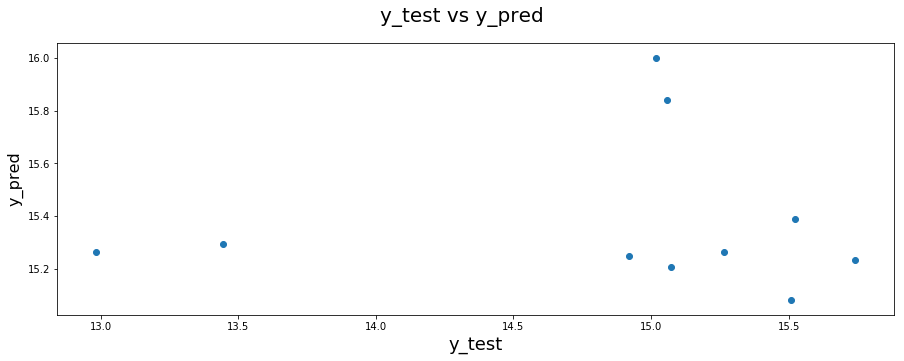

In [607]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

In [608]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [609]:
print('MSE       = ', mse)
print('R SQUARED = ', r_squared)

MSE       =  1.0791537523095258
R SQUARED =  -0.45043264715734943


# MULTIPLICATIVE MODEL

###  CAMERA CATEGORY MULTIPLICATIVE MODEL

In [610]:
dfMain_gp_cam_used=pd.DataFrame(dfMain_gp_cam)

In [611]:
dfMain_gp_cam_used.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [612]:
dfMain_gp_cam_used.shape

(52, 53)

In [613]:
columns_to_be_dropped=[ 'MRP_sum', 'Total_Units_Sold', 'Total_Orders','Avg_mrp_of_product_sold']
dfMain_gp_cam_used.drop(columns_to_be_dropped, inplace=True, axis=1)

In [614]:
from sklearn.model_selection import train_test_split
# Scale these variables using 'fit_transform'
y1 = dfMain_gp_cam_used.pop('gmv_sum')
y =np.log(y1)
X = dfMain_gp_cam_used

In [615]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [616]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train = scaler.fit_transform(X_train)
#y_train = scaler.fit_transform(y_train)


In [617]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [618]:
X_train=pd.DataFrame(X_train)
X_train.columns=dfMain_gp_cam_used.columns
# Running RFE with the output number of the variable equal 
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train, y_train)

In [619]:
sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x : x[2])

[('product_procurement_sla', True, 1),
 ('discount', True, 1),
 ('is_prepaid', True, 1),
 ('ana_ver__CameraBag', True, 1),
 ('ana_ver__CameraBattery', True, 1),
 ('ana_ver__CameraFilmRolls', True, 1),
 ('ana_ver__Filter', True, 1),
 ('ana_ver__Flash', True, 1),
 ('ana_ver__Lens', True, 1),
 ('ana_ver__Others', True, 1),
 ('ana_ver__Strap', True, 1),
 ('ana_ver__Telescope', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Other', True, 1),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Number_of_holidays', True, 1),
 ('is_rain', True, 1),
 ('temp_low', True, 1),
 ('ana_ver__CameraAccessory', False, 2),
 ('ana_ver__CameraBatteryCharger', False, 3),
 ('sla', False, 4),
 ('Number_of_paydays', False, 5),
 ('temp_high', False, 6),
 ('ana_ver__CameraTripod', False, 7),
 ('ana_ver__CameraRemoteControl', False, 8),
 ('ana_ver__Dock', False, 9),
 ('ana_v

In [620]:
col = X_train.columns[rfe.support_]
col


Index(['product_procurement_sla', 'discount', 'is_prepaid',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraFilmRolls', 'ana_ver__Filter', 'ana_ver__Flash',
       'ana_ver__Lens', 'ana_ver__Others', 'ana_ver__Strap',
       'ana_ver__Telescope', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Other',
       'NPS', 'Stock Index', 'Number_of_holidays', 'is_rain', 'temp_low'],
      dtype='object')

In [621]:

#Now, the latest training set will be
X_train_rfe = X_train[col]
X_train_rfe.head()


,product_procurement_sla,discount,is_prepaid,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraFilmRolls,ana_ver__Filter,ana_ver__Flash,ana_ver__Lens,ana_ver__Others,...,Content Marketing,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,Number_of_holidays,is_rain,temp_low
0,-1.28,0.96,3.22,-1.07,-0.33,0.45,-1.02,0.92,0.29,-0.03,...,-0.81,0.05,0.31,-0.54,-0.50,1.10,1.12,-0.54,-0.85,-0.71
1,-1.34,1.74,-0.53,0.26,-1.17,1.07,-1.34,1.23,-0.70,-0.81,...,0.04,1.08,0.83,-0.19,0.25,-0.40,0.95,-0.54,1.18,-0.71
2,-1.25,-0.07,0.13,-1.48,1.43,-0.09,-1.23,0.65,-2.23,0.06,...,-0.44,0.28,0.50,-0.43,1.52,0.17,-1.71,-0.54,1.18,1.41
3,1.02,-0.11,-0.45,-0.72,-1.00,-0.67,0.06,0.71,-0.11,-0.29,...,-0.66,0.46,0.70,-0.42,-0.50,-0.50,1.01,2.35,1.18,-0.71
4,0.83,-0.85,-0.21,1.44,1.43,-1.50,0.29,-1.27,0.42,1.95,...,-0.26,-0.36,-0.42,-0.40,-0.50,-0.41,-0.60,1.63,-0.85,-0.71


In [622]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
print(lm1.summary())
X_train_new = X_train_rfe1.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     2.661
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0543
Time:                        18:03:04   Log-Likelihood:                 9.8964
No. Observations:                  36   AIC:                             32.21
Df Residuals:                      10   BIC:                             73.38
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
17,Affiliates,27575.86
15,Content Marketing,16770.62
16,Online marketing,13081.05
13,Digital,7308.47
18,SEM,4391.47
12,TV,4258.67
14,Sponsorship,2409.59
19,Other,1168.04
20,NPS,425.92
7,ana_ver__Flash,103.87


In [623]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe2 = X_train_rfe1.drop('Affiliates', axis=1)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm2.summary())
X_train_new = X_train_rfe2.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     2.814
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0385
Time:                        18:03:04   Log-Likelihood:                 8.6475
No. Observations:                  36   AIC:                             32.70
Df Residuals:                      11   BIC:                             72.29
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
13,Digital,3166.62
15,Content Marketing,1996.41
17,SEM,1861.59
16,Online marketing,423.98
12,TV,303.51
14,Sponsorship,136.62
18,Other,107.69
19,NPS,80.30
7,ana_ver__Flash,33.64
4,ana_ver__CameraBattery,26.42


In [624]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe3 = X_train_rfe2.drop('Content Marketing', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe3.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     3.152
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0214
Time:                        18:03:04   Log-Likelihood:                 8.3981
No. Observations:                  36   AIC:                             31.20
Df Residuals:                      12   BIC:                             69.21
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
16,SEM,1846.08
13,Digital,1470.14
15,Online marketing,170.00
18,NPS,79.57
14,Sponsorship,45.69
7,ana_ver__Flash,31.69
12,TV,27.24
4,ana_ver__CameraBattery,25.14
19,Stock Index,18.80
0,product_procurement_sla,18.37


In [625]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe4 = X_train_rfe3.drop('SEM', axis=1)

lm4 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm4.summary())
X_train_new = X_train_rfe4.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     3.053
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0208
Time:                        18:03:04   Log-Likelihood:                 6.0095
No. Observations:                  36   AIC:                             33.98
Df Residuals:                      13   BIC:                             70.40
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
17,NPS,78.21
14,Sponsorship,36.44
15,Online marketing,29.68
0,product_procurement_sla,18.37
7,ana_ver__Flash,17.69
4,ana_ver__CameraBattery,14.85
18,Stock Index,13.21
13,Digital,12.78
1,discount,12.37
5,ana_ver__CameraFilmRolls,12.09


In [626]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe5 = X_train_rfe4.drop('NPS', axis=1)

lm5 = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model
print(lm5.summary())
X_train_new = X_train_rfe5.drop('const', axis=1)
X_train_new = X_train_rfe5.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     1.977
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0965
Time:                        18:03:04   Log-Likelihood:                -1.9395
No. Observations:                  36   AIC:                             47.88
Df Residuals:                      14   BIC:                             82.72
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
14,Sponsorship,19.80
0,product_procurement_sla,16.24
17,Stock Index,10.85
7,ana_ver__Flash,10.27
5,ana_ver__CameraFilmRolls,9.95
4,ana_ver__CameraBattery,9.60
16,Other,9.33
1,discount,9.17
13,Digital,9.05
6,ana_ver__Filter,8.22


In [627]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe6 = X_train_rfe5.drop('ana_ver__Flash', axis=1)


lm6 = sm.OLS(y_train,X_train_rfe6).fit()   # Running the linear model
print(lm6.summary())

X_train_new = X_train_rfe6.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1.905
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.104
Time:                        18:03:04   Log-Likelihood:                -3.9827
No. Observations:                  36   AIC:                             49.97
Df Residuals:                      15   BIC:                             83.22
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
13,Sponsorship,19.07
0,product_procurement_sla,13.96
16,Stock Index,10.41
4,ana_ver__CameraBattery,9.22
15,Other,8.97
12,Digital,8.74
1,discount,8.26
5,ana_ver__CameraFilmRolls,8.03
6,ana_ver__Filter,7.44
14,Online marketing,7.40


In [628]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe7 = X_train_rfe6.drop('product_procurement_sla', axis=1)

lm7 = sm.OLS(y_train,X_train_rfe7).fit()   # Running the linear model
print(lm7.summary())
X_train_new = X_train_rfe7.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     1.809
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.118
Time:                        18:03:05   Log-Likelihood:                -6.0885
No. Observations:                  36   AIC:                             52.18
Df Residuals:                      16   BIC:                             83.85
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
12,Sponsorship,18.76
15,Stock Index,10.03
11,Digital,8.39
3,ana_ver__CameraBattery,8.04
14,Other,7.23
13,Online marketing,6.90
10,TV,6.58
4,ana_ver__CameraFilmRolls,5.62
0,discount,5.52
5,ana_ver__Filter,5.41


In [629]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe8 = X_train_rfe7.drop('ana_ver__CameraBattery', axis=1)

lm8= sm.OLS(y_train,X_train_rfe8).fit()   # Running the linear model
print(lm8.summary())
X_train_new = X_train_rfe8.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     2.028
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0759
Time:                        18:03:05   Log-Likelihood:                -6.0990
No. Observations:                  36   AIC:                             50.20
Df Residuals:                      17   BIC:                             80.28
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
11,Sponsorship,18.74
14,Stock Index,9.24
10,Digital,8.17
9,TV,6.46
13,Other,6.44
12,Online marketing,6.11
4,ana_ver__Filter,5.16
17,temp_low,4.78
0,discount,4.50
5,ana_ver__Lens,4.41


In [630]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe9 = X_train_rfe8.drop('TV', axis=1)

lm9= sm.OLS(y_train,X_train_rfe9).fit()   # Running the linear model
print(lm9.summary())
X_train_new = X_train_rfe9.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     1.879
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0971
Time:                        18:03:05   Log-Likelihood:                -8.3640
No. Observations:                  36   AIC:                             52.73
Df Residuals:                      18   BIC:                             81.23
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
10,Sponsorship,16.81
13,Stock Index,9.05
9,Digital,7.97
12,Other,6.12
11,Online marketing,5.88
4,ana_ver__Filter,5.09
0,discount,4.42
16,temp_low,4.42
5,ana_ver__Lens,4.17
3,ana_ver__CameraFilmRolls,4.15


In [631]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe10 = X_train_rfe9.drop('ana_ver__Filter', axis=1)

lm10= sm.OLS(y_train,X_train_rfe10).fit()   # Running the linear model
print(lm10.summary())
X_train_new = X_train_rfe10.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1.771
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.117
Time:                        18:03:05   Log-Likelihood:                -10.304
No. Observations:                  36   AIC:                             54.61
Df Residuals:                      19   BIC:                             81.53
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
9,Sponsorship,15.59
12,Stock Index,9.04
8,Digital,7.76
10,Online marketing,5.88
11,Other,5.86
0,discount,4.35
15,temp_low,4.20
3,ana_ver__CameraFilmRolls,3.79
2,ana_ver__CameraBag,3.06
4,ana_ver__Lens,3.02


In [632]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe11 = X_train_rfe10.drop('Stock Index', axis=1)

lm11= sm.OLS(y_train,X_train_rfe11).fit()   # Running the linear model
print(lm11.summary())
X_train_new = X_train_rfe11.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     1.533
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.184
Time:                        18:03:05   Log-Likelihood:                -12.959
No. Observations:                  36   AIC:                             57.92
Df Residuals:                      20   BIC:                             83.25
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
9,Sponsorship,4.57
0,discount,4.13
3,ana_ver__CameraFilmRolls,3.79
10,Online marketing,3.57
8,Digital,3.53
2,ana_ver__CameraBag,3.06
4,ana_ver__Lens,2.98
11,Other,2.60
6,ana_ver__Strap,2.39
14,temp_low,2.36


In [633]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe12 = X_train_rfe11.drop('temp_low', axis=1)

lm12= sm.OLS(y_train,X_train_rfe12).fit()   # Running the linear model
print(lm12.summary())
X_train_new = X_train_rfe12.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     1.695
Date:                Mon, 16 Sep 2019   Prob (F-statistic):              0.133
Time:                        18:03:05   Log-Likelihood:                -13.123
No. Observations:                  36   AIC:                             56.25
Df Residuals:                      21   BIC:                             80.00
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
9,Sponsorship,4.30
3,ana_ver__CameraFilmRolls,3.74
0,discount,3.68
8,Digital,3.50
10,Online marketing,3.44
4,ana_ver__Lens,2.97
2,ana_ver__CameraBag,2.71
11,Other,2.55
6,ana_ver__Strap,2.37
7,ana_ver__Telescope,2.19


In [634]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe13 = X_train_rfe12.drop('Other', axis=1)

lm13= sm.OLS(y_train,X_train_rfe13).fit()   # Running the linear model
print(lm13.summary())
X_train_new = X_train_rfe13.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     1.898
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0894
Time:                        18:03:05   Log-Likelihood:                -13.194
No. Observations:                  36   AIC:                             54.39
Df Residuals:                      22   BIC:                             76.56
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,ana_ver__CameraFilmRolls,3.69
0,discount,3.68
9,Sponsorship,3.42
8,Digital,3.35
10,Online marketing,3.14
4,ana_ver__Lens,2.96
2,ana_ver__CameraBag,2.51
6,ana_ver__Strap,2.35
5,ana_ver__Others,1.89
7,ana_ver__Telescope,1.83


In [635]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe14 = X_train_rfe13.drop('is_prepaid', axis=1)

lm14= sm.OLS(y_train,X_train_rfe14).fit()   # Running the linear model
print(lm14.summary())
X_train_new = X_train_rfe14.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2.126
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0581
Time:                        18:03:05   Log-Likelihood:                -13.302
No. Observations:                  36   AIC:                             52.60
Df Residuals:                      23   BIC:                             73.19
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
8,Sponsorship,3.18
2,ana_ver__CameraFilmRolls,3.15
7,Digital,3.07
9,Online marketing,3.06
0,discount,3.04
3,ana_ver__Lens,2.90
1,ana_ver__CameraBag,2.48
5,ana_ver__Strap,2.02
4,ana_ver__Others,1.84
6,ana_ver__Telescope,1.78


In [636]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe15 = X_train_rfe14.drop('ana_ver__CameraFilmRolls', axis=1)

lm15= sm.OLS(y_train,X_train_rfe15).fit()   # Running the linear model
print(lm15.summary())
X_train_new = X_train_rfe15.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     2.206
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0510
Time:                        18:03:05   Log-Likelihood:                -14.156
No. Observations:                  36   AIC:                             52.31
Df Residuals:                      24   BIC:                             71.32
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3477      0

,Features,VIF
7,Sponsorship,3.17
6,Digital,3.05
8,Online marketing,3.00
1,ana_ver__CameraBag,2.18
0,discount,2.11
2,ana_ver__Lens,1.98
4,ana_ver__Strap,1.91
3,ana_ver__Others,1.84
9,Number_of_holidays,1.73
5,ana_ver__Telescope,1.55


In [637]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe16 = X_train_rfe15.drop('is_rain', axis=1)

lm16= sm.OLS(y_train,X_train_rfe16).fit()   # Running the linear model
print(lm16.summary())
X_train_new = X_train_rfe16.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     2.229
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0507
Time:                        18:03:05   Log-Likelihood:                -15.259
No. Observations:                  36   AIC:                             52.52
Df Residuals:                      25   BIC:                             69.94
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3477      0

,Features,VIF
7,Sponsorship,3.12
8,Online marketing,2.91
6,Digital,2.85
1,ana_ver__CameraBag,2.18
0,discount,2.06
2,ana_ver__Lens,1.98
3,ana_ver__Others,1.81
4,ana_ver__Strap,1.78
9,Number_of_holidays,1.67
5,ana_ver__Telescope,1.50


In [638]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe17 = X_train_rfe16.drop('discount', axis=1)

lm17= sm.OLS(y_train,X_train_rfe17).fit()   # Running the linear model
print(lm17.summary())
X_train_new = X_train_rfe17.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     2.572
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0289
Time:                        18:03:05   Log-Likelihood:                -15.274
No. Observations:                  36   AIC:                             50.55
Df Residuals:                      26   BIC:                             66.38
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3477      0

,Features,VIF
6,Sponsorship,3.10
5,Digital,2.83
7,Online marketing,2.35
0,ana_ver__CameraBag,2.14
1,ana_ver__Lens,1.94
3,ana_ver__Strap,1.75
8,Number_of_holidays,1.65
4,ana_ver__Telescope,1.47
2,ana_ver__Others,1.24


In [639]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe18 = X_train_rfe17.drop('Number_of_holidays', axis=1)

lm18= sm.OLS(y_train,X_train_rfe18).fit()   # Running the linear model
print(lm18.summary())
X_train_new = X_train_rfe18.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     2.752
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0232
Time:                        18:03:05   Log-Likelihood:                -16.000
No. Observations:                  36   AIC:                             50.00
Df Residuals:                      27   BIC:                             64.25
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3477      0

,Features,VIF
6,Sponsorship,2.92
5,Digital,2.81
7,Online marketing,2.16
0,ana_ver__CameraBag,2.13
1,ana_ver__Lens,1.57
4,ana_ver__Telescope,1.46
3,ana_ver__Strap,1.45
2,ana_ver__Others,1.24


In [640]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe19 = X_train_rfe18.drop('Digital', axis=1)

lm19= sm.OLS(y_train,X_train_rfe19).fit()   # Running the linear model
print(lm19.summary())
X_train_new = X_train_rfe19.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     2.732
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0271
Time:                        18:03:05   Log-Likelihood:                -17.364
No. Observations:                  36   AIC:                             50.73
Df Residuals:                      28   BIC:                             63.40
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3477      0

,Features,VIF
6,Online marketing,2.16
0,ana_ver__CameraBag,2.13
5,Sponsorship,1.57
1,ana_ver__Lens,1.54
3,ana_ver__Strap,1.41
2,ana_ver__Others,1.24
4,ana_ver__Telescope,1.09


In [641]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe20 = X_train_rfe19.drop('ana_ver__Telescope', axis=1)

lm20= sm.OLS(y_train,X_train_rfe20).fit()   # Running the linear model
print(lm20.summary())
X_train_new = X_train_rfe20.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     2.937
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0231
Time:                        18:03:05   Log-Likelihood:                -18.187
No. Observations:                  36   AIC:                             50.37
Df Residuals:                      29   BIC:                             61.46
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3477      0

,Features,VIF
5,Online marketing,2.15
0,ana_ver__CameraBag,2.12
4,Sponsorship,1.57
1,ana_ver__Lens,1.54
3,ana_ver__Strap,1.38
2,ana_ver__Others,1.19


In [642]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe21 = X_train_rfe20.drop('ana_ver__Strap', axis=1)

lm21= sm.OLS(y_train,X_train_rfe21).fit()   # Running the linear model
print(lm21.summary())
X_train_new = X_train_rfe21.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     3.247
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0184
Time:                        18:03:05   Log-Likelihood:                -18.948
No. Observations:                  36   AIC:                             49.90
Df Residuals:                      30   BIC:                             59.40
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3477      0

,Features,VIF
4,Online marketing,2.12
0,ana_ver__CameraBag,2.09
1,ana_ver__Lens,1.53
3,Sponsorship,1.32
2,ana_ver__Others,1.17


In [643]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe22 = X_train_rfe21.drop('Sponsorship', axis=1)

lm22= sm.OLS(y_train,X_train_rfe22).fit()   # Running the linear model
print(lm22.summary())
X_train_new = X_train_rfe22.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     3.736
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0136
Time:                        18:03:05   Log-Likelihood:                -19.652
No. Observations:                  36   AIC:                             49.30
Df Residuals:                      31   BIC:                             57.22
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3477      0

,Features,VIF
0,ana_ver__CameraBag,2.08
3,Online marketing,1.69
1,ana_ver__Lens,1.51
2,ana_ver__Others,1.13


In [644]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe23 = X_train_rfe22.drop('ana_ver__CameraBag', axis=1)

lm23= sm.OLS(y_train,X_train_rfe23).fit()   # Running the linear model
print(lm23.summary())
X_train_new = X_train_rfe23.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4.135
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0138
Time:                        18:03:05   Log-Likelihood:                -20.836
No. Observations:                  36   AIC:                             49.67
Df Residuals:                      32   BIC:                             56.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.3477      0.076  

,Features,VIF
2,Online marketing,1.21
0,ana_ver__Lens,1.12
1,ana_ver__Others,1.10


In [645]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe24 = X_train_rfe23.drop('ana_ver__Lens', axis=1)

lm24= sm.OLS(y_train,X_train_rfe24).fit()   # Running the linear model
print(lm24.summary())
X_train_new = X_train_rfe24.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     5.203
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0109
Time:                        18:03:05   Log-Likelihood:                -21.801
No. Observations:                  36   AIC:                             49.60
Df Residuals:                      33   BIC:                             54.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.3477      0.077  

,Features,VIF
0,ana_ver__Others,1.10
1,Online marketing,1.10


In [646]:
X_test = scaler.transform(X_test)

In [647]:
X_test = pd.DataFrame(X_test)
X_test.columns=dfMain_gp_cam_used.columns
X_test = sm.add_constant(X_test)
X_test.head()

,const,sla,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,Affiliates,SEM,Other,NPS,Stock Index,Number_of_paydays,Number_of_holidays,is_rain,temp_high,temp_low
0,1.00,-0.51,-8.78,9.02,-1.61,0.00,-2.50,-5.44,-4.04,-4.45,...,-2.50,-0.74,-0.50,3.80,0.67,1.25,1.63,-0.85,1.73,-0.71
1,1.00,0.31,-0.13,-0.23,-0.49,0.00,0.17,-2.07,1.53,2.27,...,0.66,-0.46,-0.50,0.60,0.87,-0.80,0.90,-0.85,-0.58,1.41
2,1.00,-1.22,-1.20,0.46,1.80,0.00,-1.34,-1.25,0.68,3.30,...,0.32,-0.52,0.03,0.86,0.39,1.25,-0.54,1.18,-0.58,1.41
3,1.00,0.03,-0.98,0.53,-0.37,0.00,-0.76,-1.43,-0.13,0.10,...,0.54,-0.42,1.55,0.17,-1.71,1.25,0.18,1.18,-0.58,-0.71
4,1.00,-0.11,-1.69,1.03,-0.67,0.00,0.21,-2.03,-0.43,0.51,...,0.79,-0.43,-0.22,0.54,0.50,1.25,-0.54,1.18,-0.58,1.41


In [648]:
predictor_cols=['const', 'ana_ver__Others', 'Online marketing']
X_test = X_test[predictor_cols]

In [649]:
y_pred = lm24.predict(X_test)

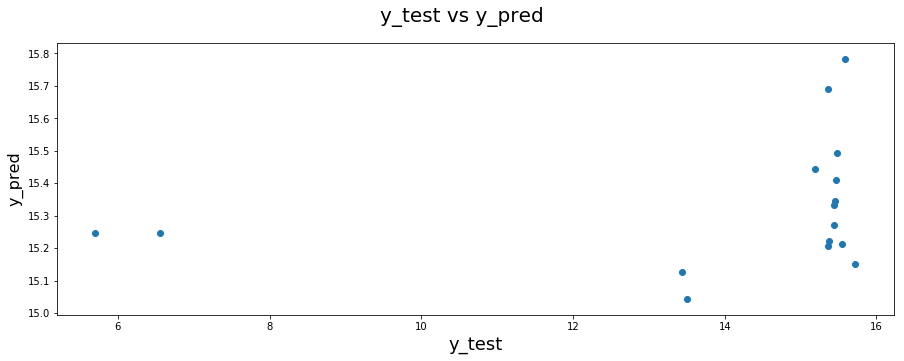

In [650]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

In [651]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [652]:
print('R2 Score  = ', r2_score(y_test, y_pred))
print('MSE .     = ', mse)

R2 Score  =  -0.1484596834320513
MSE .     =  10.797184674112938


### GAME CATEGORY MULTIPLICATIVE MODEL

In [653]:
dfMain_gp_game_used=pd.DataFrame(dfMain_gp_game)

In [654]:
dfMain_gp_game_used.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [655]:
dfMain_gp_game_used.shape

(53, 53)

In [656]:
columns_to_be_dropped=[ 'MRP_sum', 'Total_Units_Sold', 'Total_Orders','Avg_mrp_of_product_sold']
dfMain_gp_game_used.drop(columns_to_be_dropped, inplace=True, axis=1)

In [657]:
from sklearn.model_selection import train_test_split
# Scale these variables using 'fit_transform'
y1 = dfMain_gp_game_used.pop('gmv_sum')
y = np.log(y1)
X = dfMain_gp_game_used

In [658]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [659]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train = scaler.fit_transform(X_train)
#y_train = scaler.fit_transform(y_train)


In [660]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [661]:
X_train=pd.DataFrame(X_train)
X_train.columns=dfMain_gp_game_used.columns
# Running RFE with the output number of the variable equal 
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train, y_train)

In [662]:
sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x : x[2])#[:15]

[('sla', True, 1),
 ('discount', True, 1),
 ('is_prepaid', True, 1),
 ('ana_ver__GamePad', True, 1),
 ('ana_ver__GamingAccessoryKit', True, 1),
 ('ana_ver__GamingHeadset', True, 1),
 ('ana_ver__GamingKeyboard', True, 1),
 ('ana_ver__GamingMemoryCard', True, 1),
 ('ana_ver__GamingMouse', True, 1),
 ('ana_ver__GamingMousePad', True, 1),
 ('ana_ver__JoystickGamingWheel', True, 1),
 ('ana_ver__Others', True, 1),
 ('ana_ver__TVOutCableAccessory', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Other', True, 1),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('is_rain', True, 1),
 ('temp_high', True, 1),
 ('ana_ver__GamingAdapter', False, 2),
 ('temp_low', False, 3),
 ('Number_of_paydays', False, 4),
 ('product_procurement_sla', False, 5),
 ('Number_of_holidays', False, 6),
 ('ana_ver__FMRadio', False, 7),
 ('ana_ver__CameraRemoteControl', False, 8),


In [663]:
col = X_train.columns[rfe.support_]
col

Index(['sla', 'discount', 'is_prepaid', 'ana_ver__GamePad',
       'ana_ver__GamingAccessoryKit', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Others',
       'ana_ver__TVOutCableAccessory', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Other',
       'NPS', 'Stock Index', 'is_rain', 'temp_high'],
      dtype='object')

In [664]:
#Now, the latest training set will be
X_train_rfe = X_train[col]
X_train_rfe.head()


,sla,discount,is_prepaid,ana_ver__GamePad,ana_ver__GamingAccessoryKit,ana_ver__GamingHeadset,ana_ver__GamingKeyboard,ana_ver__GamingMemoryCard,ana_ver__GamingMouse,ana_ver__GamingMousePad,...,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Other,NPS,Stock Index,is_rain,temp_high
0,0.69,0.85,-0.48,-0.32,-0.63,0.59,-0.65,1.47,-0.56,-0.13,...,-0.68,0.16,0.83,0.89,-0.33,1.89,-0.60,-1.37,-0.83,-0.53
1,0.43,-0.26,2.99,-0.03,-0.27,-0.08,1.29,-0.61,-0.40,0.84,...,-0.42,-0.77,-0.11,0.09,-0.55,-0.53,0.83,1.18,-0.83,-0.53
2,0.48,-0.41,-0.43,-1.08,-0.50,0.88,-0.57,3.13,-0.53,0.75,...,-1.19,0.08,0.69,0.79,-0.56,2.50,-0.51,-1.33,1.21,-0.53
3,0.52,-0.69,0.31,0.16,0.41,-0.10,-0.01,-0.47,-0.47,-0.75,...,0.26,-0.44,0.18,0.36,-0.43,1.21,0.04,-1.81,1.21,-0.53
4,0.23,-0.13,-0.48,-0.21,0.79,0.43,-0.69,-0.70,0.09,-0.71,...,0.90,1.38,0.83,0.77,1.55,-0.53,-0.97,0.89,1.21,-0.53


In [665]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
print(lm1.summary())
X_train_new = X_train_rfe1.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     35.97
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.27e-07
Time:                        18:03:06   Log-Likelihood:                 16.781
No. Observations:                  37   AIC:                             18.44
Df Residuals:                      11   BIC:                             60.32
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
18,Affiliates,33744.31
17,Online marketing,20196.08
5,ana_ver__GamingHeadset,6714.30
16,Content Marketing,5824.74
3,ana_ver__GamePad,5791.57
19,SEM,3637.49
14,Digital,2025.87
13,TV,2019.02
15,Sponsorship,1855.42
8,ana_ver__GamingMouse,1837.13


In [666]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe2 = X_train_rfe1.drop('ana_ver__GamingHeadset', axis=1)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm2.summary())
X_train_new = X_train_rfe2.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     37.70
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.49e-08
Time:                        18:03:06   Log-Likelihood:                 15.306
No. Observations:                  37   AIC:                             19.39
Df Residuals:                      12   BIC:                             59.66
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
17,Affiliates,14748.33
16,Online marketing,8797.83
15,Content Marketing,3853.99
18,SEM,3046.42
13,Digital,1682.52
12,TV,991.94
14,Sponsorship,739.38
20,NPS,430.16
19,Other,314.40
21,Stock Index,81.36


In [667]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe3 = X_train_rfe2.drop('Affiliates', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe3.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     12.50
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.46e-05
Time:                        18:03:06   Log-Likelihood:                -6.8104
No. Observations:                  37   AIC:                             61.62
Df Residuals:                      13   BIC:                             100.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
13,Digital,1557.43
15,Content Marketing,1124.44
17,SEM,974.00
16,Online marketing,190.19
14,Sponsorship,158.70
12,TV,148.76
18,Other,93.55
19,NPS,54.40
20,Stock Index,37.06
2,is_prepaid,20.63


In [668]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe4 = X_train_rfe3.drop('Digital', axis=1)

lm4 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm4.summary())
X_train_new = X_train_rfe4.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     9.200
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.16e-05
Time:                        18:03:06   Log-Likelihood:                -14.256
No. Observations:                  37   AIC:                             74.51
Df Residuals:                      14   BIC:                             111.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
14,Content Marketing,558.53
16,SEM,475.11
13,Sponsorship,70.86
18,NPS,54.39
15,Online marketing,54.38
17,Other,47.37
19,Stock Index,36.33
12,TV,31.90
6,ana_ver__GamingMemoryCard,15.47
9,ana_ver__JoystickGamingWheel,15.18


In [669]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe5 = X_train_rfe4.drop('Content Marketing', axis=1)

lm5 = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model
print(lm5.summary())
X_train_new = X_train_rfe5.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     10.32
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.55e-05
Time:                        18:03:06   Log-Likelihood:                -14.266
No. Observations:                  37   AIC:                             72.53
Df Residuals:                      15   BIC:                             108.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
17,NPS,54.39
13,Sponsorship,51.88
14,Online marketing,50.06
18,Stock Index,35.20
15,SEM,25.52
12,TV,18.98
6,ana_ver__GamingMemoryCard,14.93
9,ana_ver__JoystickGamingWheel,14.08
16,Other,13.58
0,sla,11.94


In [670]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe6 = X_train_rfe5.drop('NPS', axis=1)

lm6 = sm.OLS(y_train,X_train_rfe6).fit()   # Running the linear model
print(lm6.summary())
X_train_new = X_train_rfe6.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     11.40
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.86e-06
Time:                        18:03:06   Log-Likelihood:                -14.511
No. Observations:                  37   AIC:                             71.02
Df Residuals:                      16   BIC:                             104.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
13,Sponsorship,43.72
17,Stock Index,34.89
15,SEM,23.67
12,TV,18.97
14,Online marketing,18.85
16,Other,12.61
9,ana_ver__JoystickGamingWheel,11.53
6,ana_ver__GamingMemoryCard,11.00
0,sla,9.64
5,ana_ver__GamingKeyboard,9.04


In [671]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe7 = X_train_rfe6.drop('Sponsorship', axis=1)

lm7 = sm.OLS(y_train,X_train_rfe7).fit()   # Running the linear model
print(lm7.summary())
X_train_new = X_train_rfe7.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     12.71
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.34e-06
Time:                        18:03:06   Log-Likelihood:                -14.566
No. Observations:                  37   AIC:                             69.13
Df Residuals:                      17   BIC:                             101.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
12,TV,18.71
16,Stock Index,15.56
0,sla,9.57
6,ana_ver__GamingMemoryCard,9.34
5,ana_ver__GamingKeyboard,8.85
13,Online marketing,8.85
2,is_prepaid,8.53
1,discount,6.98
14,SEM,6.92
10,ana_ver__Others,6.90


In [672]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe8 = X_train_rfe7.drop('TV', axis=1)

lm8 = sm.OLS(y_train,X_train_rfe8).fit()   # Running the linear model
print(lm8.summary())
X_train_new = X_train_rfe8.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     13.34
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.66e-07
Time:                        18:03:07   Log-Likelihood:                -15.649
No. Observations:                  37   AIC:                             69.30
Df Residuals:                      18   BIC:                             99.91
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,sla,8.90
12,Online marketing,8.54
5,ana_ver__GamingKeyboard,7.44
1,discount,6.64
10,ana_ver__Others,6.41
9,ana_ver__JoystickGamingWheel,6.28
3,ana_ver__GamePad,5.98
7,ana_ver__GamingMouse,5.53
4,ana_ver__GamingAccessoryKit,5.30
13,SEM,4.48


In [673]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe9 = X_train_rfe8.drop('sla', axis=1)

lm9 = sm.OLS(y_train,X_train_rfe9).fit()   # Running the linear model
print(lm9.summary())
X_train_new = X_train_rfe9.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     11.69
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.05e-06
Time:                        18:03:07   Log-Likelihood:                -19.800
No. Observations:                  37   AIC:                             75.60
Df Residuals:                      19   BIC:                             104.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
11,Online marketing,8.24
4,ana_ver__GamingKeyboard,6.81
0,discount,6.38
9,ana_ver__Others,6.17
8,ana_ver__JoystickGamingWheel,5.78
3,ana_ver__GamingAccessoryKit,4.71
12,SEM,4.47
5,ana_ver__GamingMemoryCard,4.34
2,ana_ver__GamePad,4.13
14,Stock Index,3.06


In [674]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe10 = X_train_rfe9.drop('ana_ver__Others', axis=1)

lm10 = sm.OLS(y_train,X_train_rfe10).fit()   # Running the linear model
print(lm10.summary())
X_train_new = X_train_rfe10.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     12.25
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.89e-07
Time:                        18:03:07   Log-Likelihood:                -20.896
No. Observations:                  37   AIC:                             75.79
Df Residuals:                      20   BIC:                             103.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
0,discount,6.10
10,Online marketing,6.04
3,ana_ver__GamingAccessoryKit,4.46
2,ana_ver__GamePad,4.00
11,SEM,3.74
4,ana_ver__GamingKeyboard,3.70
5,ana_ver__GamingMemoryCard,3.64
8,ana_ver__JoystickGamingWheel,3.07
13,Stock Index,3.06
6,ana_ver__GamingMouse,2.92


In [675]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe10 = X_train_rfe9.drop('ana_ver__GamingAccessoryKit', axis=1)

lm10 = sm.OLS(y_train,X_train_rfe10).fit()   # Running the linear model
print(lm10.summary())
X_train_new = X_train_rfe10.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     7.067
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.11e-05
Time:                        18:03:07   Log-Likelihood:                -29.850
No. Observations:                  37   AIC:                             93.70
Df Residuals:                      20   BIC:                             121.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
10,Online marketing,7.17
3,ana_ver__GamingKeyboard,6.32
8,ana_ver__Others,5.85
7,ana_ver__JoystickGamingWheel,5.31
4,ana_ver__GamingMemoryCard,4.10
11,SEM,3.94
0,discount,3.29
13,Stock Index,3.06
2,ana_ver__GamePad,3.05
6,ana_ver__GamingMousePad,2.85


In [676]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe11 = X_train_rfe10.drop('ana_ver__GamingKeyboard', axis=1)

lm11 = sm.OLS(y_train,X_train_rfe11).fit()   # Running the linear model
print(lm11.summary())
X_train_new = X_train_rfe11.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     4.703
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000677
Time:                        18:03:07   Log-Likelihood:                -37.675
No. Observations:                  37   AIC:                             107.4
Df Residuals:                      21   BIC:                             133.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
6,ana_ver__JoystickGamingWheel,4.00
3,ana_ver__GamingMemoryCard,3.62
7,ana_ver__Others,3.33
10,SEM,3.30
9,Online marketing,3.11
12,Stock Index,3.06
0,discount,3.01
2,ana_ver__GamePad,2.76
11,Other,2.71
8,ana_ver__TVOutCableAccessory,2.35


In [677]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe12 = X_train_rfe11.drop('ana_ver__TVOutCableAccessory', axis=1)

lm12 = sm.OLS(y_train,X_train_rfe12).fit()   # Running the linear model
print(lm12.summary())
X_train_new = X_train_rfe12.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     5.235
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000298
Time:                        18:03:07   Log-Likelihood:                -37.793
No. Observations:                  37   AIC:                             105.6
Df Residuals:                      22   BIC:                             129.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
6,ana_ver__JoystickGamingWheel,3.95
3,ana_ver__GamingMemoryCard,3.53
9,SEM,3.28
7,ana_ver__Others,3.25
8,Online marketing,3.06
11,Stock Index,2.78
2,ana_ver__GamePad,2.72
10,Other,2.56
12,is_rain,2.11
1,is_prepaid,2.09


In [678]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe13 = X_train_rfe12.drop('is_rain', axis=1)

lm13 = sm.OLS(y_train,X_train_rfe13).fit()   # Running the linear model
print(lm13.summary())
X_train_new = X_train_rfe13.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     5.850
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000124
Time:                        18:03:07   Log-Likelihood:                -37.899
No. Observations:                  37   AIC:                             103.8
Df Residuals:                      23   BIC:                             126.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
7,ana_ver__Others,3.24
3,ana_ver__GamingMemoryCard,3.18
6,ana_ver__JoystickGamingWheel,3.04
8,Online marketing,2.97
11,Stock Index,2.74
9,SEM,2.60
10,Other,2.53
2,ana_ver__GamePad,2.40
1,is_prepaid,2.09
5,ana_ver__GamingMousePad,1.97


In [679]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe14 = X_train_rfe13.drop('temp_high', axis=1)

lm14 = sm.OLS(y_train,X_train_rfe14).fit()   # Running the linear model
print(lm14.summary())
X_train_new = X_train_rfe14.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     6.520
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.13e-05
Time:                        18:03:07   Log-Likelihood:                -38.099
No. Observations:                  37   AIC:                             102.2
Df Residuals:                      24   BIC:                             123.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
3,ana_ver__GamingMemoryCard,3.04
6,ana_ver__JoystickGamingWheel,3.04
7,ana_ver__Others,2.88
8,Online marketing,2.86
11,Stock Index,2.74
9,SEM,2.60
10,Other,2.50
2,ana_ver__GamePad,2.32
5,ana_ver__GamingMousePad,1.85
1,is_prepaid,1.82


In [680]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe15 = X_train_rfe14.drop('is_prepaid', axis=1)

lm15 = sm.OLS(y_train,X_train_rfe15).fit()   # Running the linear model
print(lm15.summary())
X_train_new = X_train_rfe15.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     7.405
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.80e-05
Time:                        18:03:07   Log-Likelihood:                -38.108
No. Observations:                  37   AIC:                             100.2
Df Residuals:                      25   BIC:                             119.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
5,ana_ver__JoystickGamingWheel,3.04
2,ana_ver__GamingMemoryCard,2.94
6,ana_ver__Others,2.81
7,Online marketing,2.59
10,Stock Index,2.54
9,Other,2.50
1,ana_ver__GamePad,2.32
8,SEM,2.20
0,discount,1.71
3,ana_ver__GamingMouse,1.60


In [681]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe16 = X_train_rfe15.drop('Stock Index', axis=1)

lm16 = sm.OLS(y_train,X_train_rfe16).fit()   # Running the linear model
print(lm16.summary())
X_train_new = X_train_rfe16.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     8.354
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.69e-06
Time:                        18:03:07   Log-Likelihood:                -38.304
No. Observations:                  37   AIC:                             98.61
Df Residuals:                      26   BIC:                             116.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
5,ana_ver__JoystickGamingWheel,2.99
6,ana_ver__Others,2.79
7,Online marketing,2.58
2,ana_ver__GamingMemoryCard,2.50
9,Other,2.28
1,ana_ver__GamePad,2.25
8,SEM,2.19
0,discount,1.71
4,ana_ver__GamingMousePad,1.58
3,ana_ver__GamingMouse,1.53


In [682]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe17 = X_train_rfe16.drop('Online marketing', axis=1)

lm17 = sm.OLS(y_train,X_train_rfe17).fit()   # Running the linear model
print(lm17.summary())
X_train_new = X_train_rfe17.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     9.466
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.43e-06
Time:                        18:03:07   Log-Likelihood:                -38.560
No. Observations:                  37   AIC:                             97.12
Df Residuals:                      27   BIC:                             113.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
5,ana_ver__JoystickGamingWheel,2.98
6,ana_ver__Others,2.78
2,ana_ver__GamingMemoryCard,2.42
8,Other,2.15
1,ana_ver__GamePad,1.74
0,discount,1.70
7,SEM,1.66
4,ana_ver__GamingMousePad,1.53
3,ana_ver__GamingMouse,1.50


In [683]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe18 = X_train_rfe17.drop('ana_ver__GamingMemoryCard', axis=1)

lm18 = sm.OLS(y_train,X_train_rfe18).fit()   # Running the linear model
print(lm18.summary())
X_train_new = X_train_rfe18.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     10.82
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           8.49e-07
Time:                        18:03:07   Log-Likelihood:                -38.845
No. Observations:                  37   AIC:                             95.69
Df Residuals:                      28   BIC:                             110.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
5,ana_ver__Others,2.74
4,ana_ver__JoystickGamingWheel,2.56
7,Other,1.75
0,discount,1.70
6,SEM,1.66
1,ana_ver__GamePad,1.58
3,ana_ver__GamingMousePad,1.51
2,ana_ver__GamingMouse,1.45


In [684]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe19 = X_train_rfe18.drop('Other', axis=1)

lm19 = sm.OLS(y_train,X_train_rfe19).fit()   # Running the linear model
print(lm19.summary())
X_train_new = X_train_rfe19.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     12.33
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.33e-07
Time:                        18:03:08   Log-Likelihood:                -39.380
No. Observations:                  37   AIC:                             94.76
Df Residuals:                      29   BIC:                             107.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
5,ana_ver__Others,2.36
4,ana_ver__JoystickGamingWheel,1.89
0,discount,1.68
6,SEM,1.62
3,ana_ver__GamingMousePad,1.50
1,ana_ver__GamePad,1.42
2,ana_ver__GamingMouse,1.38


In [685]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe20 = X_train_rfe19.drop('ana_ver__JoystickGamingWheel', axis=1)

lm20= sm.OLS(y_train,X_train_rfe20).fit()   # Running the linear model
print(lm20.summary())
X_train_new = X_train_rfe20.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     14.56
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.02e-07
Time:                        18:03:08   Log-Likelihood:                -39.672
No. Observations:                  37   AIC:                             93.34
Df Residuals:                      30   BIC:                             104.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,discount,1.64
5,SEM,1.62
4,ana_ver__Others,1.51
3,ana_ver__GamingMousePad,1.45
1,ana_ver__GamePad,1.42
2,ana_ver__GamingMouse,1.38


In [686]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe21 = X_train_rfe20.drop('ana_ver__GamingMousePad', axis=1)

lm21= sm.OLS(y_train,X_train_rfe21).fit()   # Running the linear model
print(lm21.summary())
X_train_new = X_train_rfe21.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     16.67
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.43e-08
Time:                        18:03:08   Log-Likelihood:                -40.765
No. Observations:                  37   AIC:                             93.53
Df Residuals:                      31   BIC:                             103.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.6333 

,Features,VIF
4,SEM,1.53
3,ana_ver__Others,1.42
2,ana_ver__GamingMouse,1.38
0,discount,1.25
1,ana_ver__GamePad,1.25


In [687]:

X_test = scaler.transform(X_test)

In [688]:
X_test = pd.DataFrame(X_test)
X_test.columns=dfMain_gp_game_used.columns
X_test = sm.add_constant(X_test)
X_test.head()

,const,sla,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,Affiliates,SEM,Other,NPS,Stock Index,Number_of_paydays,Number_of_holidays,is_rain,temp_high,temp_low
0,1.00,0.15,-0.15,1.87,-0.54,0.00,0.00,0.00,0.00,0.00,...,0.72,0.33,-0.53,-0.88,-1.51,-1.03,3.18,1.21,-0.53,1.54
1,1.00,-0.42,-1.51,0.12,-0.30,0.00,0.00,0.00,0.00,0.00,...,-1.15,-0.61,-0.53,0.46,0.55,0.97,-0.52,1.21,1.90,-0.65
2,1.00,-1.49,-1.22,-0.56,-0.34,0.00,0.00,0.00,0.00,0.00,...,-1.11,-0.60,-0.53,0.46,0.55,-1.03,-0.52,1.21,-0.53,-0.65
3,1.00,0.30,0.11,-0.59,-0.28,0.00,0.00,0.00,0.00,0.00,...,0.36,-0.43,1.21,0.04,-1.81,-1.03,-0.52,-0.83,-0.53,1.54
4,1.00,2.64,-4.91,9.31,3.19,0.00,0.00,0.00,0.00,0.00,...,-2.28,-0.62,-0.53,3.15,0.71,-1.03,1.70,-0.83,1.90,-0.65


In [689]:
predictor_cols=['const', 'SEM', 'ana_ver__Others','ana_ver__GamingMouse','discount','ana_ver__GamePad']
X_test = X_test[predictor_cols]

In [690]:
y_pred = lm21.predict(X_test)

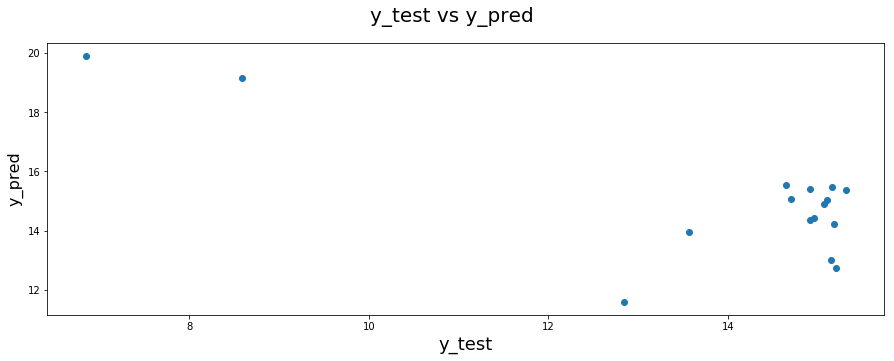

In [691]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

In [692]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [693]:
print('MSE        = ', mse)
print('R Squared  =', r_squared)

MSE        =  18.59946298503482
R Squared  = -2.1400104273570038


### HOME CATEGORY MULTIPLICATIVE MODLE

In [694]:
dfMain_gp_home_used=pd.DataFrame(dfMain_gp_home)

In [695]:
dfMain_gp_home_used.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [696]:
dfMain_gp_home_used.shape

(50, 53)

In [697]:
columns_to_be_dropped=[ 'MRP_sum', 'Total_Units_Sold', 'Total_Orders','Avg_mrp_of_product_sold']
dfMain_gp_home_used.drop(columns_to_be_dropped, inplace=True, axis=1)

In [698]:
from sklearn.model_selection import train_test_split
# Scale these variables using 'fit_transform'
y1 = dfMain_gp_home_used.pop('gmv_sum')
y =np.log(y1)
X = dfMain_gp_home_used

In [699]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [700]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train = scaler.fit_transform(X_train)
#y_train = scaler.fit_transform(y_train)

In [701]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [702]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train = scaler.fit_transform(X_train)
#y_train = scaler.fit_transform(y_train)

In [703]:
X_train=pd.DataFrame(X_train)
X_train.columns=dfMain_gp_home_used.columns
# Running RFE with the output number of the variable equal 
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train, y_train)

In [704]:
sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x : x[2])#[:15]

[('sla', True, 1),
 ('discount', True, 1),
 ('is_prepaid', True, 1),
 ('ana_ver__BoomBox', True, 1),
 ('ana_ver__Dock', True, 1),
 ('ana_ver__FMRadio', True, 1),
 ('ana_ver__HiFiSystem', True, 1),
 ('ana_ver__HomeAudioSpeaker', True, 1),
 ('ana_ver__Others', True, 1),
 ('ana_ver__VoiceRecorder', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 ('Affiliates', True, 1),
 ('SEM', True, 1),
 ('Other', True, 1),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('Number_of_paydays', True, 1),
 ('Number_of_holidays', True, 1),
 ('is_rain', True, 1),
 ('temp_high', True, 1),
 ('temp_low', True, 1),
 ('product_procurement_sla', False, 2),
 ('ana_ver__CameraBatteryCharger', False, 3),
 ('ana_ver__CameraTripod', False, 4),
 ('ana_ver__CameraBattery', False, 5),
 ('ana_ver__CameraRemoteControl', False, 6),
 ('ana_ver__Filter', False, 7),
 ('ana_ver__CameraFilmRolls', False, 8),
 ('ana_ver__Flash', False, 9

In [705]:
col = X_train.columns[rfe.support_]
col

Index(['sla', 'discount', 'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__Dock',
       'ana_ver__FMRadio', 'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__Others', 'ana_ver__VoiceRecorder', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Other', 'NPS', 'Stock Index', 'Number_of_paydays',
       'Number_of_holidays', 'is_rain', 'temp_high', 'temp_low'],
      dtype='object')

In [706]:

#Now, the latest training set will be
X_train_rfe = X_train[col]
X_train_rfe.head()


,sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__Dock,ana_ver__FMRadio,ana_ver__HiFiSystem,ana_ver__HomeAudioSpeaker,ana_ver__Others,ana_ver__VoiceRecorder,...,Affiliates,SEM,Other,NPS,Stock Index,Number_of_paydays,Number_of_holidays,is_rain,temp_high,temp_low
0,-0.00,0.09,-0.41,-0.48,0.73,-0.44,-1.32,0.49,-0.49,0.01,...,0.88,-0.51,2.39,-0.51,-1.19,1.30,-0.66,1.22,-0.45,1.22
1,0.09,0.87,-0.18,-1.03,0.25,-0.90,-0.95,1.00,-0.26,-0.02,...,0.98,-0.50,2.48,-0.51,-1.19,-0.77,1.21,-0.82,-0.45,1.22
2,-0.14,-0.50,0.76,-0.60,-1.08,0.80,1.26,-0.81,0.86,1.14,...,0.14,-0.44,0.97,0.16,-1.66,-0.77,-0.66,1.22,-0.45,1.22
3,0.36,-0.67,-0.36,-0.16,-0.24,0.92,0.72,-0.53,-0.53,-0.63,...,0.37,-0.41,-0.57,-0.54,1.07,-0.77,-0.66,1.22,-0.45,1.22
4,-0.20,-0.18,-0.20,2.22,1.37,1.02,0.74,-1.50,-0.12,0.10,...,-0.46,-0.35,-0.57,-0.56,-0.58,1.30,-0.66,-0.82,-0.45,-0.82


In [707]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
print(lm1.summary())
X_train_new = X_train_rfe1.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     6.742
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00170
Time:                        18:03:08   Log-Likelihood:                 28.786
No. Observations:                  35   AIC:                            -7.571
Df Residuals:                      10   BIC:                             31.31
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
8,ana_ver__Others,inf
3,ana_ver__BoomBox,inf
4,ana_ver__Dock,inf
5,ana_ver__FMRadio,inf
6,ana_ver__HiFiSystem,inf
7,ana_ver__HomeAudioSpeaker,inf
9,ana_ver__VoiceRecorder,inf
15,Affiliates,152170.23
14,Online marketing,68504.14
13,Content Marketing,57780.96


In [708]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe2 = X_train_rfe1.drop('ana_ver__Others', axis=1)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm2.summary())
X_train_new = X_train_rfe2.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     6.742
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00170
Time:                        18:03:08   Log-Likelihood:                 28.786
No. Observations:                  35   AIC:                            -7.571
Df Residuals:                      10   BIC:                             31.31
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
14,Affiliates,152170.23
13,Online marketing,68504.14
12,Content Marketing,57780.96
10,Digital,20147.60
9,TV,17582.19
7,ana_ver__HomeAudioSpeaker,13971.99
15,SEM,10755.19
11,Sponsorship,9924.64
5,ana_ver__FMRadio,9595.11
16,Other,5882.43


In [709]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe3 = X_train_rfe2.drop('Affiliates', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe3.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     5.380
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00300
Time:                        18:03:08   Log-Likelihood:                 22.867
No. Observations:                  35   AIC:                             2.266
Df Residuals:                      11   BIC:                             39.59
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
7,ana_ver__HomeAudioSpeaker,12986.90
5,ana_ver__FMRadio,8022.91
10,Digital,4276.87
12,Content Marketing,2886.62
8,ana_ver__VoiceRecorder,1190.75
14,SEM,1044.76
3,ana_ver__BoomBox,701.98
13,Online marketing,648.30
9,TV,495.77
11,Sponsorship,287.84


In [710]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe4 = X_train_rfe3.drop('ana_ver__HomeAudioSpeaker', axis=1)

lm4 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm4.summary())
X_train_new = X_train_rfe4.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     5.315
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00228
Time:                        18:03:09   Log-Likelihood:                 20.571
No. Observations:                  35   AIC:                             4.858
Df Residuals:                      12   BIC:                             40.63
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15

,Features,VIF
9,Digital,4274.36
11,Content Marketing,2615.81
13,SEM,973.28
12,Online marketing,562.86
8,TV,478.59
14,Other,178.39
10,Sponsorship,132.36
15,NPS,81.60
16,Stock Index,53.46
0,sla,35.13


In [711]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe5 = X_train_rfe4.drop('Digital', axis=1)

lm5 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm5.summary())
X_train_new = X_train_rfe5.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     5.315
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00228
Time:                        18:03:09   Log-Likelihood:                 20.571
No. Observations:                  35   AIC:                             4.858
Df Residuals:                      12   BIC:                             40.63
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15

,Features,VIF
10,Content Marketing,279.69
12,SEM,252.23
11,Online marketing,68.95
9,Sponsorship,48.33
13,Other,36.67
0,sla,34.41
14,NPS,28.65
8,TV,22.06
15,Stock Index,20.05
7,ana_ver__VoiceRecorder,14.33


In [712]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe6 = X_train_rfe5.drop('Content Marketing', axis=1)

lm6 = sm.OLS(y_train,X_train_rfe6).fit()   # Running the linear model
print(lm6.summary())
X_train_new = X_train_rfe6.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     3.777
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00706
Time:                        18:03:09   Log-Likelihood:                 11.492
No. Observations:                  35   AIC:                             19.02
Df Residuals:                      14   BIC:                             51.68
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15

,Features,VIF
10,Online marketing,49.77
9,Sponsorship,40.44
0,sla,34.15
13,NPS,24.62
11,SEM,22.89
14,Stock Index,19.95
12,Other,15.90
7,ana_ver__VoiceRecorder,14.30
1,discount,11.15
5,ana_ver__FMRadio,10.94


In [713]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe7 = X_train_rfe6.drop('Online marketing', axis=1)

lm7 = sm.OLS(y_train,X_train_rfe7).fit()   # Running the linear model
print(lm7.summary())
X_train_new = X_train_rfe7.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     3.701
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00660
Time:                        18:03:09   Log-Likelihood:                 9.4414
No. Observations:                  35   AIC:                             21.12
Df Residuals:                      15   BIC:                             52.22
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15

,Features,VIF
9,Sponsorship,36.09
0,sla,28.98
10,SEM,22.48
13,Stock Index,16.37
12,NPS,11.45
11,Other,10.93
1,discount,10.75
7,ana_ver__VoiceRecorder,9.99
5,ana_ver__FMRadio,9.83
8,TV,7.64


In [714]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe8 = X_train_rfe7.drop('sla', axis=1)

lm8 = sm.OLS(y_train,X_train_rfe8).fit()   # Running the linear model
print(lm8.summary())
X_train_new = X_train_rfe8.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     3.605
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00653
Time:                        18:03:09   Log-Likelihood:                 7.3788
No. Observations:                  35   AIC:                             23.24
Df Residuals:                      16   BIC:                             52.79
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15

,Features,VIF
8,Sponsorship,29.94
9,SEM,11.35
10,Other,10.15
12,Stock Index,9.87
11,NPS,8.16
4,ana_ver__FMRadio,7.61
0,discount,6.42
7,TV,5.78
6,ana_ver__VoiceRecorder,5.02
1,is_prepaid,4.78


In [715]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe9 = X_train_rfe8.drop('SEM', axis=1)

lm9 = sm.OLS(y_train,X_train_rfe9).fit()   # Running the linear model
print(lm9.summary())
X_train_new = X_train_rfe9.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     4.055
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00306
Time:                        18:03:09   Log-Likelihood:                 7.3783
No. Observations:                  35   AIC:                             21.24
Df Residuals:                      17   BIC:                             49.24
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15

,Features,VIF
8,Sponsorship,10.62
4,ana_ver__FMRadio,7.19
10,NPS,7.08
9,Other,7.02
7,TV,5.73
0,discount,5.68
11,Stock Index,5.05
1,is_prepaid,4.78
16,temp_low,4.58
6,ana_ver__VoiceRecorder,3.91


In [716]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe10 = X_train_rfe9.drop('ana_ver__FMRadio', axis=1)

lm10 = sm.OLS(y_train,X_train_rfe10).fit()   # Running the linear model
print(lm10.summary())
X_train_new = X_train_rfe10.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     4.521
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00144
Time:                        18:03:09   Log-Likelihood:                 7.2510
No. Observations:                  35   AIC:                             19.50
Df Residuals:                      18   BIC:                             45.94
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15

,Features,VIF
7,Sponsorship,9.13
9,NPS,6.40
8,Other,5.46
6,TV,5.32
10,Stock Index,4.77
5,ana_ver__VoiceRecorder,3.85
1,is_prepaid,3.70
15,temp_low,3.50
0,discount,2.95
14,temp_high,2.87


In [717]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe11 = X_train_rfe10.drop('ana_ver__VoiceRecorder', axis=1)

lm11 = sm.OLS(y_train,X_train_rfe11).fit()   # Running the linear model
print(lm11.summary())
X_train_new = X_train_rfe11.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     4.106
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00229
Time:                        18:03:09   Log-Likelihood:                 4.3083
No. Observations:                  35   AIC:                             23.38
Df Residuals:                      19   BIC:                             48.27
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3455    

,Features,VIF
6,Sponsorship,9.13
8,NPS,6.36
7,Other,5.43
5,TV,4.97
9,Stock Index,4.27
14,temp_low,3.50
0,discount,2.76
13,temp_high,2.52
2,ana_ver__BoomBox,2.36
1,is_prepaid,2.22


In [718]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe12 = X_train_rfe11.drop('NPS', axis=1)

lm12 = sm.OLS(y_train,X_train_rfe12).fit()   # Running the linear model
print(lm12.summary())
X_train_new = X_train_rfe12.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     2.361
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0388
Time:                        18:03:09   Log-Likelihood:                -3.9052
No. Observations:                  35   AIC:                             37.81
Df Residuals:                      20   BIC:                             61.14
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3455    

,Features,VIF
5,TV,4.96
6,Sponsorship,4.70
7,Other,3.71
13,temp_low,3.48
8,Stock Index,3.40
0,discount,2.67
2,ana_ver__BoomBox,2.25
12,temp_high,2.10
1,is_prepaid,1.98
4,ana_ver__HiFiSystem,1.76


In [719]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe13 = X_train_rfe12.drop('temp_high', axis=1)

lm13 = sm.OLS(y_train,X_train_rfe13).fit()   # Running the linear model
print(lm13.summary())
X_train_new = X_train_rfe13.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     2.670
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0220
Time:                        18:03:09   Log-Likelihood:                -3.9077
No. Observations:                  35   AIC:                             35.82
Df Residuals:                      21   BIC:                             57.59
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3455    

,Features,VIF
5,TV,4.72
6,Sponsorship,4.61
7,Other,3.69
12,temp_low,3.47
8,Stock Index,3.35
0,discount,2.65
2,ana_ver__BoomBox,2.11
1,is_prepaid,1.97
4,ana_ver__HiFiSystem,1.75
10,Number_of_holidays,1.60


In [720]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe14 = X_train_rfe13.drop('is_rain', axis=1)

lm14 = sm.OLS(y_train,X_train_rfe14).fit()   # Running the linear model
print(lm14.summary())
X_train_new = X_train_rfe14.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     3.022
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0119
Time:                        18:03:09   Log-Likelihood:                -3.9354
No. Observations:                  35   AIC:                             33.87
Df Residuals:                      22   BIC:                             54.09
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3455    

,Features,VIF
5,TV,4.40
6,Sponsorship,4.08
7,Other,3.53
11,temp_low,3.45
8,Stock Index,3.34
0,discount,2.47
2,ana_ver__BoomBox,2.11
1,is_prepaid,1.87
4,ana_ver__HiFiSystem,1.74
10,Number_of_holidays,1.54


In [721]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe15 = X_train_rfe14.drop('ana_ver__HiFiSystem', axis=1)

lm15 = sm.OLS(y_train,X_train_rfe15).fit()   # Running the linear model
print(lm15.summary())
X_train_new = X_train_rfe15.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     3.440
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00600
Time:                        18:03:09   Log-Likelihood:                -3.9558
No. Observations:                  35   AIC:                             31.91
Df Residuals:                      23   BIC:                             50.58
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3455      0

,Features,VIF
4,TV,4.34
5,Sponsorship,4.08
6,Other,3.46
10,temp_low,3.44
7,Stock Index,3.34
0,discount,2.17
2,ana_ver__BoomBox,2.04
1,is_prepaid,1.56
9,Number_of_holidays,1.53
8,Number_of_paydays,1.38


In [722]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe16 = X_train_rfe15.drop('ana_ver__Dock', axis=1)

lm16 = sm.OLS(y_train,X_train_rfe16).fit()   # Running the linear model
print(lm16.summary())
X_train_new = X_train_rfe16.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     3.912
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00298
Time:                        18:03:09   Log-Likelihood:                -4.0580
No. Observations:                  35   AIC:                             30.12
Df Residuals:                      24   BIC:                             47.22
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3455      0

,Features,VIF
3,TV,4.34
4,Sponsorship,4.08
9,temp_low,3.37
5,Other,3.31
6,Stock Index,3.04
0,discount,2.17
2,ana_ver__BoomBox,2.03
1,is_prepaid,1.55
8,Number_of_holidays,1.49
7,Number_of_paydays,1.23


In [723]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe17 = X_train_rfe16.drop('temp_low', axis=1)

lm17 = sm.OLS(y_train,X_train_rfe17).fit()   # Running the linear model
print(lm17.summary())
X_train_new = X_train_rfe17.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     4.357
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00168
Time:                        18:03:09   Log-Likelihood:                -4.4701
No. Observations:                  35   AIC:                             28.94
Df Residuals:                      25   BIC:                             44.49
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3455      0

,Features,VIF
3,TV,3.34
5,Other,2.99
4,Sponsorship,2.84
6,Stock Index,2.60
2,ana_ver__BoomBox,1.94
0,discount,1.85
1,is_prepaid,1.30
8,Number_of_holidays,1.29
7,Number_of_paydays,1.23


In [724]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe18 = X_train_rfe17.drop('ana_ver__BoomBox', axis=1)

lm18 = sm.OLS(y_train,X_train_rfe18).fit()   # Running the linear model
print(lm18.summary())
X_train_new = X_train_rfe18.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     4.978
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000814
Time:                        18:03:09   Log-Likelihood:                -4.7236
No. Observations:                  35   AIC:                             27.45
Df Residuals:                      26   BIC:                             41.45
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3455      0

,Features,VIF
4,Other,2.98
2,TV,2.87
5,Stock Index,2.53
3,Sponsorship,2.50
0,discount,1.54
1,is_prepaid,1.30
7,Number_of_holidays,1.29
6,Number_of_paydays,1.22


In [725]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe19 = X_train_rfe18.drop('Other', axis=1)

lm19 = sm.OLS(y_train,X_train_rfe19).fit()   # Running the linear model
print(lm19.summary())
X_train_new = X_train_rfe19.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     5.830
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000343
Time:                        18:03:09   Log-Likelihood:                -4.8634
No. Observations:                  35   AIC:                             25.73
Df Residuals:                      27   BIC:                             38.17
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3455      0

,Features,VIF
2,TV,2.50
4,Stock Index,1.85
0,discount,1.50
3,Sponsorship,1.46
6,Number_of_holidays,1.29
1,is_prepaid,1.28
5,Number_of_paydays,1.17


In [726]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe19 = X_train_rfe18.drop('Other', axis=1)

lm19 = sm.OLS(y_train,X_train_rfe19).fit()   # Running the linear model
print(lm19.summary())
X_train_new = X_train_rfe19.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     5.830
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000343
Time:                        18:03:10   Log-Likelihood:                -4.8634
No. Observations:                  35   AIC:                             25.73
Df Residuals:                      27   BIC:                             38.17
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3455      0

,Features,VIF
2,TV,2.50
4,Stock Index,1.85
0,discount,1.50
3,Sponsorship,1.46
6,Number_of_holidays,1.29
1,is_prepaid,1.28
5,Number_of_paydays,1.17


In [727]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe20 = X_train_rfe19.drop('TV', axis=1)

lm20 = sm.OLS(y_train,X_train_rfe20).fit()   # Running the linear model
print(lm20.summary())
X_train_new = X_train_rfe20.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     6.848
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000150
Time:                        18:03:10   Log-Likelihood:                -5.1741
No. Observations:                  35   AIC:                             24.35
Df Residuals:                      28   BIC:                             35.24
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3455      0

,Features,VIF
0,discount,1.35
5,Number_of_holidays,1.27
3,Stock Index,1.23
4,Number_of_paydays,1.14
1,is_prepaid,1.12
2,Sponsorship,1.04


In [728]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe21 = X_train_rfe20.drop('Stock Index', axis=1)

lm21 = sm.OLS(y_train,X_train_rfe21).fit()   # Running the linear model
print(lm21.summary())
X_train_new = X_train_rfe21.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     8.007
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.68e-05
Time:                        18:03:10   Log-Likelihood:                -5.8015
No. Observations:                  35   AIC:                             23.60
Df Residuals:                      29   BIC:                             32.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3455      0

,Features,VIF
4,Number_of_holidays,1.27
0,discount,1.26
3,Number_of_paydays,1.11
1,is_prepaid,1.04
2,Sponsorship,1.03


In [729]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe22 = X_train_rfe21.drop('Number_of_holidays', axis=1)

lm22 = sm.OLS(y_train,X_train_rfe22).fit()   # Running the linear model
print(lm22.summary())
X_train_new = X_train_rfe22.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     9.705
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.69e-05
Time:                        18:03:10   Log-Likelihood:                -6.4491
No. Observations:                  35   AIC:                             22.90
Df Residuals:                      30   BIC:                             30.68
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.3455      0.05

,Features,VIF
0,discount,1.05
3,Number_of_paydays,1.05
1,is_prepaid,1.01
2,Sponsorship,1.01


In [730]:
#DROP THE VALUE WITH HIGH VIF
X_train_rfe23 = X_train_rfe22.drop('Sponsorship', axis=1)

lm23 = sm.OLS(y_train,X_train_rfe23).fit()   # Running the linear model
print(lm23.summary())
X_train_new = X_train_rfe23.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     11.15
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.97e-05
Time:                        18:03:10   Log-Likelihood:                -8.1683
No. Observations:                  35   AIC:                             24.34
Df Residuals:                      31   BIC:                             30.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.3455      0.05

,Features,VIF
2,Number_of_paydays,1.05
0,discount,1.04
1,is_prepaid,1.01


In [731]:
X_test = scaler.transform(X_test)

In [732]:
X_test = pd.DataFrame(X_test)
X_test.columns=dfMain_gp_home_used.columns
X_test = sm.add_constant(X_test)
X_test.head()

,const,sla,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,Affiliates,SEM,Other,NPS,Stock Index,Number_of_paydays,Number_of_holidays,is_rain,temp_high,temp_low
0,1.00,5.48,2.79,37.56,0.23,0.04,0.00,0.00,0.00,0.00,...,0.18,0.22,-0.00,46.93,1101.00,0.00,0.00,1.00,1.00,0.00
1,1.00,5.36,2.76,37.80,0.69,0.02,0.00,0.00,0.00,0.00,...,0.22,0.17,0.19,50.99,1174.55,1.00,0.00,1.00,0.00,1.00
2,1.00,5.90,2.61,36.88,0.97,0.02,0.00,0.00,0.00,0.00,...,0.21,0.15,-0.00,51.83,1242.00,0.00,0.00,1.00,0.00,1.00
3,1.00,4.84,2.81,43.67,0.15,0.01,0.00,0.00,0.00,0.00,...,0.28,0.21,-0.00,50.33,1222.00,0.00,0.00,0.00,0.00,1.00
4,1.00,4.95,2.64,38.02,0.20,0.02,0.00,0.00,0.00,0.00,...,0.27,0.27,0.24,47.31,1228.00,0.00,0.00,0.00,0.00,0.00


In [733]:
predictor_cols=['const', 'Number_of_paydays', 'discount', 'is_prepaid']
X_test = X_test[predictor_cols]

In [734]:
y_pred = lm23.predict(X_test)

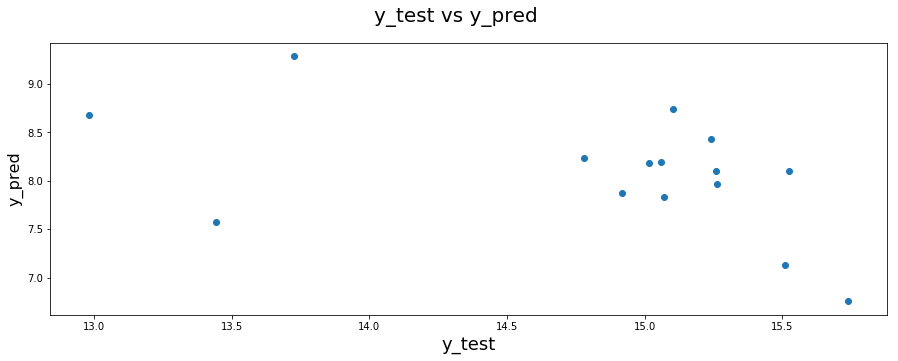

In [735]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

In [736]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [737]:
print('R2 Score = ', r2_score(y_test, y_pred))
print('MSE      =', mse)

R2 Score =  -76.95949835612096
MSE      = 47.249557321631414


# LOG MODEL

### Camera Log Model

In [738]:
dfMain_gp_cam_used = dfMain_gp_cam.drop(['MRP_sum','Total_Units_Sold', 'Total_Orders','Content Marketing', 'Online marketing','SEM'], axis=1)
dfMain_gp_cam_used.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship', 'Affiliates',
       'Other', 'NPS', 'Stock Index', 'Number_of_payd

In [739]:
dfMain_gp_cam_used.shape

(52, 47)

In [740]:
dfMain_gp_cam_used_0removed=dfMain_gp_cam_used.replace(0,0.0001)

dfMain_gp_cam_used_log = pd.DataFrame(np.log(dfMain_gp_cam_used_0removed))
dfMain_gp_cam_used_log.shape

(52, 47)

In [741]:
dfMain_gp_cam_used_log.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship', 'Affiliates',
       'Other', 'NPS', 'Stock Index', 'Number_of_payd

In [742]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Create a scaling object
scaler = MinMaxScaler()

# Scale these variables using 'fit_transform'
y_cam_log = dfMain_gp_cam_used_log.pop('gmv_sum')
X_cam_log = dfMain_gp_cam_used_log
X_cam_log = pd.DataFrame(scaler.fit_transform(X_cam_log))
X_cam_log.columns = dfMain_gp_cam_used_log.columns

X_cam_log.head()

,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,Sponsorship,Affiliates,Other,NPS,Stock Index,Number_of_paydays,Number_of_holidays,is_rain,temp_high,temp_low
0,0.51,0.87,0.75,0.00,0.89,0.00,0.90,0.98,0.99,0.96,...,0.40,0.38,0.00,0.69,0.73,0.00,0.00,0.00,0.00,0.00
1,1.00,0.77,0.74,0.05,0.88,0.00,0.92,1.00,0.99,0.95,...,0.38,0.37,0.00,0.69,0.73,0.00,0.00,1.00,0.00,0.00
2,0.62,0.87,0.76,0.05,0.89,0.00,0.90,0.98,1.00,0.94,...,0.39,0.38,0.00,0.69,0.73,1.00,0.92,0.00,1.00,0.00
3,0.70,0.79,0.75,0.02,0.88,0.00,0.97,0.97,1.00,0.98,...,0.39,0.38,0.00,0.69,0.73,0.00,0.00,0.00,1.00,0.00
4,0.73,0.70,0.74,0.02,0.87,0.00,1.00,0.95,0.99,0.96,...,0.39,0.38,0.00,0.69,0.73,0.00,0.00,0.00,1.00,0.00


In [743]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test= train_test_split(X_cam_log,y_cam_log, train_size = 0.7, test_size = 0.3, random_state = 100)

X_cam_log=X_train
y_cam_log=y_train
# linear regression
lm = LinearRegression()
lm.fit(X_cam_log, y_cam_log)

# predict
y_pred = lm.predict(X_cam_log)
print(metrics.r2_score(y_true=y_cam_log, y_pred=y_pred))

0.9434512452916852


In [744]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
folds=5

# list of alphas to tune
params = {'alpha': [-1, 0, 0.0000001, 0.0001, 0.001, 0.01, 0.05, 0.1, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 600, 700, 1000, 2000, 10000 ]}
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 150, 200, 300, 400, 500, 1000 ]}

lasso = Lasso()
ridge=Ridge()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_cam_log, y_cam_log) 

cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=10000]
cv_results.head()

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01,0.00,0.00,0.00,-1,{'alpha': -1},-47553.50,-28182.43,-48110.74,-26354.19,...,-34924.26,11037.64,30,-924.03,-311.61,-439.99,-830.51,-916.28,-684.48,257.39
1,0.01,0.00,0.00,0.00,0,{'alpha': 0},-1.05,-0.68,-0.65,-1.41,...,-0.92,0.28,29,-0.00,-0.01,-0.07,-0.01,-0.01,-0.02,0.02
2,0.01,0.00,0.00,0.00,0.00,{'alpha': 1e-07},-1.04,-0.68,-0.65,-1.41,...,-0.91,0.28,28,-0.00,-0.01,-0.07,-0.01,-0.01,-0.02,0.02
3,0.01,0.00,0.00,0.00,0.00,{'alpha': 0.0001},-0.57,-0.38,-0.72,-0.77,...,-0.60,0.14,27,-0.05,-0.06,-0.07,-0.07,-0.05,-0.06,0.01
4,0.00,0.00,0.00,0.00,0.00,{'alpha': 0.001},-0.56,-0.46,-0.62,-0.70,...,-0.56,0.09,26,-0.11,-0.20,-0.14,-0.16,-0.16,-0.15,0.03


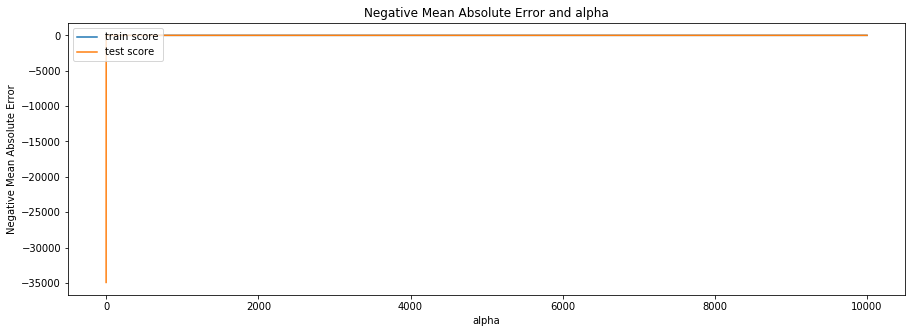

In [745]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [746]:
model_cv.best_params_

{'alpha': 0.05}

In [747]:
#Let us use RFE to automatically eliminate unwanted variables which do not effect the price much
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_cam_log, y_cam_log)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_cam_log, y_cam_log)

sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x : x[2])#[:25]

#significant dependent variables
col = X_cam_log.columns[rfe.support_]
col

Index(['Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__CameraBattery', 'ana_ver__CameraBatteryCharger',
       'ana_ver__CameraFilmRolls', 'ana_ver__CameraRemoteControl',
       'ana_ver__Filter', 'ana_ver__Flash', 'ana_ver__Telescope', 'Digital',
       'Sponsorship', 'Affiliates', 'NPS'],
      dtype='object')

In [748]:
#Now, the latest training set will be
X_train_rfe = X_cam_log[col]
y_train=y_cam_log

y_train=y_cam_log.values.reshape(-1,1)
y_train.shape

(36, 1)

In [749]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
X_train_new = X_train_rfe1.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,ana_ver__CameraBattery,6068.55
8,ana_ver__Filter,4690.79
1,product_procurement_sla,2791.69
5,ana_ver__CameraBatteryCharger,2378.95
7,ana_ver__CameraRemoteControl,1876.37
3,is_prepaid,1371.51
13,Affiliates,923.95
9,ana_ver__Flash,738.64
10,ana_ver__Telescope,459.83
14,NPS,108.00


In [750]:
#Let us drop ana_ver__CameraBattery
X_train_rfe2 = X_train_rfe1.drop('ana_ver__CameraBattery', axis=1)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm2.summary())
X_train_new = X_train_rfe2.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     2.471
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0298
Time:                        18:03:11   Log-Likelihood:                -9.2123
No. Observations:                  36   AIC:                             48.42
Df Residuals:                      21   BIC:                             72.18
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
7,ana_ver__Filter,4676.59
1,product_procurement_sla,2366.61
4,ana_ver__CameraBatteryCharger,1890.36
6,ana_ver__CameraRemoteControl,1235.05
3,is_prepaid,1199.87
8,ana_ver__Flash,559.76
12,Affiliates,450.07
9,ana_ver__Telescope,299.33
0,Avg_mrp_of_product_sold,68.21
13,NPS,59.30


In [751]:
#Let us drop ana_ver__Filter
X_train_rfe3 = X_train_rfe2.drop('ana_ver__Filter', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe3.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     2.782
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0167
Time:                        18:03:12   Log-Likelihood:                -9.2340
No. Observations:                  36   AIC:                             46.47
Df Residuals:                      22   BIC:                             68.64
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
4,ana_ver__CameraBatteryCharger,1602.98
3,is_prepaid,1191.22
1,product_procurement_sla,1161.74
6,ana_ver__CameraRemoteControl,1103.79
7,ana_ver__Flash,553.70
11,Affiliates,438.67
8,ana_ver__Telescope,298.11
0,Avg_mrp_of_product_sold,61.31
12,NPS,57.30
10,Sponsorship,47.57


In [752]:
#Let us drop ana_ver__CameraBatteryCharger
X_train_rfe4 = X_train_rfe3.drop('ana_ver__CameraBatteryCharger', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe4.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     3.145
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00882
Time:                        18:03:12   Log-Likelihood:                -9.2535
No. Observations:                  36   AIC:                             44.51
Df Residuals:                      23   BIC:                             65.09
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
3,is_prepaid,1115.76
1,product_procurement_sla,1063.62
5,ana_ver__CameraRemoteControl,666.27
6,ana_ver__Flash,485.19
10,Affiliates,436.31
7,ana_ver__Telescope,199.81
0,Avg_mrp_of_product_sold,58.74
11,NPS,55.98
9,Sponsorship,44.07
4,ana_ver__CameraFilmRolls,39.96


In [753]:
#Let us drop is_prepaid
X_train_rfe5 = X_train_rfe4.drop('is_prepaid', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe5.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     3.463
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00529
Time:                        18:03:12   Log-Likelihood:                -9.6230
No. Observations:                  36   AIC:                             43.25
Df Residuals:                      24   BIC:                             62.25
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
1,product_procurement_sla,974.62
4,ana_ver__CameraRemoteControl,628.15
5,ana_ver__Flash,452.32
9,Affiliates,226.28
6,ana_ver__Telescope,199.59
0,Avg_mrp_of_product_sold,56.74
8,Sponsorship,40.27
3,ana_ver__CameraFilmRolls,39.71
10,NPS,16.54
7,Digital,11.45


In [754]:
#Let us drop product_procurement_sla
X_train_rfe6 = X_train_rfe5.drop('product_procurement_sla', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe6).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe6.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3.952
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00254
Time:                        18:03:12   Log-Likelihood:                -9.6688
No. Observations:                  36   AIC:                             41.34
Df Residuals:                      25   BIC:                             58.76
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
4,ana_ver__Flash,354.55
3,ana_ver__CameraRemoteControl,277.23
8,Affiliates,218.47
5,ana_ver__Telescope,196.39
7,Sponsorship,36.77
0,Avg_mrp_of_product_sold,35.70
2,ana_ver__CameraFilmRolls,34.71
9,NPS,16.49
1,discount,9.18
6,Digital,8.61


In [755]:
#Let us drop ana_ver__Flash
X_train_rfe7 = X_train_rfe6.drop('ana_ver__Flash', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe7).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe7.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     2.723
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0221
Time:                        18:03:12   Log-Likelihood:                -14.782
No. Observations:                  36   AIC:                             49.56
Df Residuals:                      26   BIC:                             65.40
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
3,ana_ver__CameraRemoteControl,260.78
4,ana_ver__Telescope,187.58
7,Affiliates,113.69
6,Sponsorship,34.15
0,Avg_mrp_of_product_sold,32.76
2,ana_ver__CameraFilmRolls,25.07
8,NPS,13.65
1,discount,8.71
5,Digital,8.61


In [756]:
#Let us drop ana_ver__CameraRemoteControl
X_train_rfe8 = X_train_rfe7.drop('ana_ver__CameraRemoteControl', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe8).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe8.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     2.030
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0809
Time:                        18:03:12   Log-Likelihood:                -18.257
No. Observations:                  36   AIC:                             54.51
Df Residuals:                      27   BIC:                             68.77
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,ana_ver__Telescope,131.13
6,Affiliates,94.54
5,Sponsorship,33.99
0,Avg_mrp_of_product_sold,24.13
2,ana_ver__CameraFilmRolls,23.47
7,NPS,11.36
1,discount,8.57
4,Digital,6.17


In [757]:
#Let us drop ana_ver__Telescope
X_train_rfe9 = X_train_rfe8.drop('ana_ver__Telescope', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe9).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe9.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2.275
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0575
Time:                        18:03:12   Log-Likelihood:                -18.629
No. Observations:                  36   AIC:                             53.26
Df Residuals:                      28   BIC:                             65.93
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,Affiliates,68.52
4,Sponsorship,30.56
2,ana_ver__CameraFilmRolls,22.76
0,Avg_mrp_of_product_sold,20.38
1,discount,8.38
3,Digital,6.17
6,NPS,3.19


In [758]:
#Let us drop  Affiliates
X_train_rfe10 = X_train_rfe9.drop(['Affiliates'], axis=1)

lm3 = sm.OLS(y_train,X_train_rfe10).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe10.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     2.702
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0330
Time:                        18:03:12   Log-Likelihood:                -18.742
No. Observations:                  36   AIC:                             51.48
Df Residuals:                      29   BIC:                             62.57
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,Sponsorship,26.30
0,Avg_mrp_of_product_sold,12.73
2,ana_ver__CameraFilmRolls,11.42
1,discount,7.70
3,Digital,6.02
5,NPS,3.18


In [759]:
#Let us drop Sponsorship
X_train_rfe11 = X_train_rfe10.drop(['Sponsorship'], axis=1)

lm3 = sm.OLS(y_train,X_train_rfe11).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe11.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     2.526
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0506
Time:                        18:03:12   Log-Likelihood:                -20.410
No. Observations:                  36   AIC:                             52.82
Df Residuals:                      30   BIC:                             62.32
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,ana_ver__CameraFilmRolls,10.05
0,Avg_mrp_of_product_sold,8.64
1,discount,6.53
3,Digital,3.85
4,NPS,3.07


In [760]:
#Let us drop discount
X_train_rfe12 = X_train_rfe11.drop(['discount'], axis=1)

lm3 = sm.OLS(y_train,X_train_rfe12).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe12.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     2.976
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0344
Time:                        18:03:12   Log-Likelihood:                -20.884
No. Observations:                  36   AIC:                             51.77
Df Residuals:                      31   BIC:                             59.69
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,Avg_mrp_of_product_sold,6.94
2,Digital,3.75
1,ana_ver__CameraFilmRolls,3.54
3,NPS,2.29


In [761]:
#Let us drop NPS
X_train_rfe13 = X_train_rfe12.drop('NPS', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe13).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe13.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     3.778
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0199
Time:                        18:03:12   Log-Likelihood:                -21.277
No. Observations:                  36   AIC:                             50.55
Df Residuals:                      32   BIC:                             56.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,Avg_mrp_of_product_sold,5.36
2,Digital,3.66
1,ana_ver__CameraFilmRolls,3.52


In [762]:
#Let us drop Avg_mrp_of_product_sold
X_train_rfe14 = X_train_rfe13.drop('Avg_mrp_of_product_sold', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe14).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe14.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5.390
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00943
Time:                        18:03:12   Log-Likelihood:                -21.646
No. Observations:                  36   AIC:                             49.29
Df Residuals:                      33   BIC:                             54.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,ana_ver__CameraFilmRolls,2.35
1,Digital,2.35


In [763]:
#Let us drop Digital
X_train_rfe15 = X_train_rfe14.drop('Digital', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe15).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe15.drop('const', axis=1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     9.454
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00414
Time:                        18:03:12   Log-Likelihood:                -22.318
No. Observations:                  36   AIC:                             48.64
Df Residuals:                      34   BIC:                             51.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [764]:
predictor_cols=[ 'ana_ver__CameraFilmRolls']
X_test = X_test[predictor_cols]
X_test_cnst=sm.add_constant(X_test)
y_pred = lm3.predict(X_test_cnst)

In [765]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)



print('MSE       = ', mse)
print('R Squared = ', r_squared)

MSE       =  9.800730013831792
R Squared =  -0.04247020207728358


### Home Log Model 

In [766]:
dfMain_gp_home_used = dfMain_gp_home.drop(['MRP_sum','Total_Units_Sold','Total_Orders'], axis=1)

In [767]:
dfMain_gp_home_used.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [768]:
dfMain_gp_home_used.shape

(50, 50)

In [769]:
dfMain_gp_home_used_0removed=dfMain_gp_home_used.replace(0,0.0001)

dfMain_gp_home_used_log = pd.DataFrame(np.log(dfMain_gp_home_used_0removed))
dfMain_gp_home_used_log.shape

(50, 50)

In [770]:
dfMain_gp_home_used_log.columns

Index(['sla', 'Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__BoomBox', 'ana_ver__CameraAccessory',
       'ana_ver__CameraBag', 'ana_ver__CameraBattery',
       'ana_ver__CameraBatteryCharger', 'ana_ver__CameraFilmRolls',
       'ana_ver__CameraRemoteControl', 'ana_ver__CameraTripod',
       'ana_ver__Dock', 'ana_ver__FMRadio', 'ana_ver__Filter',
       'ana_ver__Flash', 'ana_ver__GamePad', 'ana_ver__GamingAccessoryKit',
       'ana_ver__GamingAdapter', 'ana_ver__GamingHeadset',
       'ana_ver__GamingKeyboard', 'ana_ver__GamingMemoryCard',
       'ana_ver__GamingMouse', 'ana_ver__GamingMousePad',
       'ana_ver__HiFiSystem', 'ana_ver__HomeAudioSpeaker',
       'ana_ver__JoystickGamingWheel', 'ana_ver__Lens', 'ana_ver__Others',
       'ana_ver__Strap', 'ana_ver__TVOutCableAccessory', 'ana_ver__Telescope',
       'ana_ver__VoiceRecorder', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM'

In [771]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Create a scaling object
scaler = MinMaxScaler()

# Scale these variables using 'fit_transform'
y_home_log = dfMain_gp_home_used_log.pop('gmv_sum')
X_home_log = dfMain_gp_home_used_log
X_home_log = pd.DataFrame(scaler.fit_transform(X_home_log))
X_home_log.columns = dfMain_gp_home_used_log.columns

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_home_log,y_home_log, train_size = 0.7, test_size = 0.3, random_state = 100)

#Renaming X_train and y_train as X_cam_log and y_cam_log and keeping test data for later validation
X_home_log=X_train
y_home_log=y_train

X_home_log.head()

# linear regression
lm = LinearRegression()
lm.fit(X_home_log, y_home_log)

# predict
y_pred = lm.predict(X_home_log)
print(metrics.r2_score(y_true=y_home_log, y_pred=y_pred))

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
folds=5

# list of alphas to tune
params = {'alpha': [-1, 0, 0.0000001, 0.0001, 0.001, 0.01, 0.05, 0.1, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 600, 700, 1000, 2000, 10000 ]}

lasso = Lasso()
ridge=Ridge()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_home_log, y_home_log) 

cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=10000]
cv_results.head()

0.9405851242435599
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01,0.00,0.00,0.00,-1,{'alpha': -1},-5269.83,-7936.36,-2553.98,-3251.99,...,-4143.77,2232.21,30,-215.49,-394.16,-341.70,-282.48,-324.07,-311.58,59.94
1,0.01,0.00,0.00,0.00,0,{'alpha': 0},-0.74,-1.93,-0.49,-0.68,...,-0.87,0.54,29,-0.06,-0.06,-0.03,-0.07,-0.03,-0.05,0.02
2,0.01,0.00,0.00,0.00,0.00,{'alpha': 1e-07},-0.74,-1.93,-0.49,-0.68,...,-0.87,0.54,28,-0.06,-0.06,-0.03,-0.07,-0.03,-0.05,0.02
3,0.01,0.00,0.00,0.00,0.00,{'alpha': 0.0001},-0.65,-1.18,-0.47,-0.64,...,-0.68,0.26,27,-0.07,-0.07,-0.03,-0.08,-0.04,-0.06,0.02
4,0.00,0.00,0.00,0.00,0.00,{'alpha': 0.001},-0.34,-0.52,-0.46,-0.38,...,-0.45,0.08,26,-0.13,-0.12,-0.08,-0.13,-0.11,-0.11,0.02


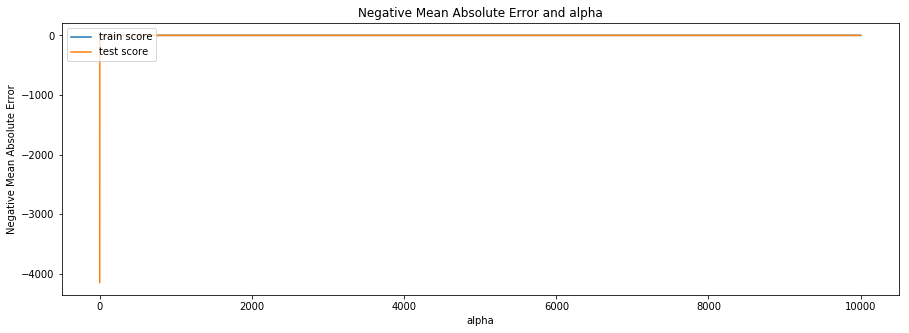

Index(['sla', 'Avg_mrp_of_product_sold', 'discount', 'ana_ver__BoomBox',
       'ana_ver__Dock', 'ana_ver__HiFiSystem', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Other',
       'Stock Index'],
      dtype='object')

In [772]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

model_cv.best_params_

#Let us use RFE to automatically eliminate unwanted variables which do not effect the price much
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_home_log, y_home_log)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_home_log, y_home_log)

sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x : x[2])#[:25]

#significant dependent variables
col = X_home_log.columns[rfe.support_]
col

In [773]:
#Now, the latest training set will be
X_train_rfe = X_home_log[col]
y_train=y_home_log

y_train=y_home_log.values.reshape(-1,1)
y_train.shape

(35, 1)

In [774]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
print(lm.summary())
X_train_new = X_train_rfe1.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     6.074
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000186
Time:                        18:03:14   Log-Likelihood:                 9.7677
No. Observations:                  35   AIC:                             12.46
Df Residuals:                      19   BIC:                             37.35
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
10,Online marketing,137154.92
11,Affiliates,117478.32
9,Content Marketing,1425.99
6,TV,401.06
8,Sponsorship,147.54
4,ana_ver__Dock,139.03
7,Digital,124.88
0,sla,52.22
2,discount,48.52
12,SEM,43.36


In [775]:
#Let us drop Online marketing
X_train_rfe2 = X_train_rfe1.drop('Online marketing', axis=1)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm2.summary())
X_train_new = X_train_rfe2.drop('const', axis=1)
X_train_new = X_train_rfe2.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     4.819
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000780
Time:                        18:03:14   Log-Likelihood:                 4.8419
No. Observations:                  35   AIC:                             20.32
Df Residuals:                      20   BIC:                             43.65
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
10,Affiliates,656.75
9,Content Marketing,290.93
6,TV,192.29
4,ana_ver__Dock,129.80
0,sla,52.22
2,discount,42.92
7,Digital,27.87
8,Sponsorship,24.70
1,Avg_mrp_of_product_sold,19.91
11,SEM,16.70


In [776]:
#Let us drop Affiliates
X_train_rfe3 = X_train_rfe2.drop('Affiliates', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe3.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     5.016
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000561
Time:                        18:03:14   Log-Likelihood:                 3.7336
No. Observations:                  35   AIC:                             20.53
Df Residuals:                      21   BIC:                             42.31
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
4,ana_ver__Dock,121.40
9,Content Marketing,85.50
6,TV,63.01
0,sla,51.64
2,discount,41.09
8,Sponsorship,24.53
7,Digital,23.95
1,Avg_mrp_of_product_sold,18.97
10,SEM,15.38
3,ana_ver__BoomBox,13.23


In [777]:
#Let us drop ana_ver__Dock
X_train_rfe4 = X_train_rfe3.drop('ana_ver__Dock', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe4.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     5.033
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000532
Time:                        18:03:14   Log-Likelihood:                 2.1291
No. Observations:                  35   AIC:                             21.74
Df Residuals:                      22   BIC:                             41.96
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
8,Content Marketing,83.46
5,TV,50.49
2,discount,30.92
6,Digital,23.81
7,Sponsorship,23.42
1,Avg_mrp_of_product_sold,18.56
0,sla,16.42
9,SEM,15.25
4,ana_ver__HiFiSystem,12.26
3,ana_ver__BoomBox,8.33


In [778]:
#Let us drop Content Marketing
X_train_rfe5 = X_train_rfe4.drop('Content Marketing', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe5.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5.175
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000443
Time:                        18:03:14   Log-Likelihood:                0.81942
No. Observations:                  35   AIC:                             22.36
Df Residuals:                      23   BIC:                             41.03
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
2,discount,24.95
7,Sponsorship,22.92
6,Digital,20.81
5,TV,18.47
0,sla,16.20
1,Avg_mrp_of_product_sold,16.03
4,ana_ver__HiFiSystem,9.69
8,SEM,8.38
3,ana_ver__BoomBox,7.33
10,Stock Index,4.54


In [779]:
#Let us drop discount
X_train_rfe6=X_train_rfe5.drop('discount', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe6).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe6.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     4.132
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00212
Time:                        18:03:14   Log-Likelihood:                -3.4582
No. Observations:                  35   AIC:                             28.92
Df Residuals:                      24   BIC:                             46.03
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
6,Sponsorship,20.42
5,Digital,18.02
4,TV,17.45
0,sla,14.02
3,ana_ver__HiFiSystem,9.63
7,SEM,8.33
2,ana_ver__BoomBox,6.14
9,Stock Index,4.54
1,Avg_mrp_of_product_sold,4.35
8,Other,3.09


In [780]:
#Let us drop Sponsorship
X_train_rfe7 = X_train_rfe6.drop('Sponsorship', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe7).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe7.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     3.214
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0101
Time:                        18:03:14   Log-Likelihood:                -7.5278
No. Observations:                  35   AIC:                             35.06
Df Residuals:                      25   BIC:                             50.61
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
5,Digital,16.20
0,sla,10.33
4,TV,8.48
6,SEM,7.70
3,ana_ver__HiFiSystem,7.34
2,ana_ver__BoomBox,5.04
8,Stock Index,4.45
1,Avg_mrp_of_product_sold,3.98
7,Other,2.81


In [781]:
#Let us drop ana_ver__BoomBox
X_train_rfe8 = X_train_rfe7.drop('ana_ver__BoomBox', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe8).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe8.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3.722
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00506
Time:                        18:03:14   Log-Likelihood:                -7.6218
No. Observations:                  35   AIC:                             33.24
Df Residuals:                      26   BIC:                             47.24
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
4,Digital,15.97
0,sla,9.95
3,TV,8.18
5,SEM,7.61
2,ana_ver__HiFiSystem,7.05
7,Stock Index,3.99
1,Avg_mrp_of_product_sold,3.88
6,Other,2.69


In [782]:
#Let us drop SEM
X_train_rfe9 = X_train_rfe8.drop('SEM', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe9).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe9.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     4.378
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00234
Time:                        18:03:14   Log-Likelihood:                -7.7054
No. Observations:                  35   AIC:                             31.41
Df Residuals:                      27   BIC:                             43.85
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,sla,9.27
3,TV,7.98
2,ana_ver__HiFiSystem,7.00
4,Digital,6.57
6,Stock Index,3.96
1,Avg_mrp_of_product_sold,3.86
5,Other,2.67


In [783]:
#Let us drop Stock Index
X_train_rfe10 = X_train_rfe9.drop('Stock Index', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe10).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe10.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     5.057
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00126
Time:                        18:03:14   Log-Likelihood:                -8.1319
No. Observations:                  35   AIC:                             30.26
Df Residuals:                      28   BIC:                             41.15
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,sla,8.45
3,TV,7.98
4,Digital,6.55
2,ana_ver__HiFiSystem,6.48
1,Avg_mrp_of_product_sold,3.58
5,Other,2.43


In [784]:
#Let us drop TV
X_train_rfe11 = X_train_rfe10.drop('TV', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe11).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe11.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     6.022
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000614
Time:                        18:03:14   Log-Likelihood:                -8.5174
No. Observations:                  35   AIC:                             29.03
Df Residuals:                      29   BIC:                             38.37
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,sla,8.44
2,ana_ver__HiFiSystem,6.04
3,Digital,5.75
1,Avg_mrp_of_product_sold,2.66
4,Other,1.89


In [785]:
#Let us drop ana_ver__HiFiSystem
X_train_rfe12 = X_train_rfe11.drop('ana_ver__HiFiSystem', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe12).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe12.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     5.855
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00132
Time:                        18:03:14   Log-Likelihood:                -10.882
No. Observations:                  35   AIC:                             31.76
Df Residuals:                      30   BIC:                             39.54
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
2,Digital,5.59
0,sla,5.50
1,Avg_mrp_of_product_sold,2.65
3,Other,1.69


In [786]:
#Let us drop sla
X_train_rfe13 = X_train_rfe12.drop('sla', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe13).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe13.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     6.420
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00165
Time:                        18:03:14   Log-Likelihood:                -12.523
No. Observations:                  35   AIC:                             33.05
Df Residuals:                      31   BIC:                             39.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,Avg_mrp_of_product_sold,2.65
1,Digital,2.16
2,Other,1.36


In [787]:
predictor_cols=[ 'Avg_mrp_of_product_sold', 'Digital','Other']
X_test = X_test[predictor_cols]
X_test_cnst=sm.add_constant(X_test)
y_pred = lm3.predict(X_test_cnst)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


print('MSE       = ', mse)
print('R Squared = ', r_squared)

MSE       =  0.7086406161951583
R Squared =  -0.1692229532922005


### Game Log Model

In [788]:
dfMain_gp_game_used = dfMain_gp_game.drop(['MRP_sum','Total_Units_Sold', 'Total_Orders','Content Marketing', 'Digital','SEM'], axis=1)

In [789]:
dfMain_gp_game_used_0removed=dfMain_gp_cam_used.replace(0,0.0001)

dfMain_gp_game_used_log = pd.DataFrame(np.log(dfMain_gp_cam_used_0removed))
dfMain_gp_game_used_log.shape

(52, 47)

In [790]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Create a scaling object
scaler = MinMaxScaler()

# Scale these variables using 'fit_transform'
y_game_log = dfMain_gp_game_used_log.pop('gmv_sum')
X_game_log = dfMain_gp_game_used_log
X_game_log = pd.DataFrame(scaler.fit_transform(X_game_log))
X_game_log.columns = dfMain_gp_game_used_log.columns

X_game_log.head()

,sla,Avg_mrp_of_product_sold,product_procurement_sla,discount,is_prepaid,ana_ver__BoomBox,ana_ver__CameraAccessory,ana_ver__CameraBag,ana_ver__CameraBattery,ana_ver__CameraBatteryCharger,...,Sponsorship,Affiliates,Other,NPS,Stock Index,Number_of_paydays,Number_of_holidays,is_rain,temp_high,temp_low
0,0.51,0.87,0.75,0.00,0.89,0.00,0.90,0.98,0.99,0.96,...,0.40,0.38,0.00,0.69,0.73,0.00,0.00,0.00,0.00,0.00
1,1.00,0.77,0.74,0.05,0.88,0.00,0.92,1.00,0.99,0.95,...,0.38,0.37,0.00,0.69,0.73,0.00,0.00,1.00,0.00,0.00
2,0.62,0.87,0.76,0.05,0.89,0.00,0.90,0.98,1.00,0.94,...,0.39,0.38,0.00,0.69,0.73,1.00,0.92,0.00,1.00,0.00
3,0.70,0.79,0.75,0.02,0.88,0.00,0.97,0.97,1.00,0.98,...,0.39,0.38,0.00,0.69,0.73,0.00,0.00,0.00,1.00,0.00
4,0.73,0.70,0.74,0.02,0.87,0.00,1.00,0.95,0.99,0.96,...,0.39,0.38,0.00,0.69,0.73,0.00,0.00,0.00,1.00,0.00


In [791]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_game_log,y_game_log, train_size = 0.7, test_size = 0.3, random_state = 100)

#Renaming X_train and y_train as X_game_log and y_game_log and keeping test data for later validation
X_game_log=X_train
y_game_log=y_train


# linear regression
lm = LinearRegression()
lm.fit(X_game_log, y_game_log)

# predict
y_pred = lm.predict(X_game_log)
print(metrics.r2_score(y_true=y_game_log, y_pred=y_pred))

0.9434512452916852


In [792]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
folds=5

# list of alphas to tune
params = {'alpha': [-1, 0, 0.0000001, 0.0001, 0.001, 0.01, 0.05, 0.1, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 600, 700, 1000, 2000, 10000 ]}
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 150, 200, 300, 400, 500, 1000 ]}

lasso = Lasso()
ridge=Ridge()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_game_log, y_game_log) 

cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=10000]
cv_results.head()

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01,0.00,0.00,0.00,-1,{'alpha': -1},-47553.50,-28182.43,-48110.74,-26354.19,...,-34924.26,11037.64,30,-924.03,-311.61,-439.99,-830.51,-916.28,-684.48,257.39
1,0.00,0.00,0.00,0.00,0,{'alpha': 0},-1.05,-0.68,-0.65,-1.41,...,-0.92,0.28,29,-0.00,-0.01,-0.07,-0.01,-0.01,-0.02,0.02
2,0.00,0.00,0.00,0.00,0.00,{'alpha': 1e-07},-1.04,-0.68,-0.65,-1.41,...,-0.91,0.28,28,-0.00,-0.01,-0.07,-0.01,-0.01,-0.02,0.02
3,0.00,0.00,0.00,0.00,0.00,{'alpha': 0.0001},-0.57,-0.38,-0.72,-0.77,...,-0.60,0.14,27,-0.05,-0.06,-0.07,-0.07,-0.05,-0.06,0.01
4,0.00,0.00,0.00,0.00,0.00,{'alpha': 0.001},-0.56,-0.46,-0.62,-0.70,...,-0.56,0.09,26,-0.11,-0.20,-0.14,-0.16,-0.16,-0.15,0.03


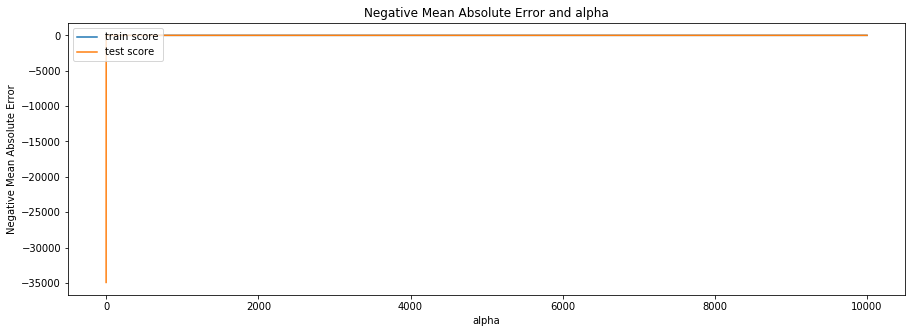

In [793]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [794]:
model_cv.best_params_

{'alpha': 0.05}

In [795]:
#Let us use RFE to automatically eliminate unwanted variables which do not effect the price much
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_game_log, y_game_log)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_game_log, y_game_log)

sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x : x[2])#[:25]

[('Avg_mrp_of_product_sold', True, 1),
 ('product_procurement_sla', True, 1),
 ('discount', True, 1),
 ('is_prepaid', True, 1),
 ('ana_ver__CameraBattery', True, 1),
 ('ana_ver__CameraBatteryCharger', True, 1),
 ('ana_ver__CameraFilmRolls', True, 1),
 ('ana_ver__CameraRemoteControl', True, 1),
 ('ana_ver__Filter', True, 1),
 ('ana_ver__Flash', True, 1),
 ('ana_ver__Telescope', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Affiliates', True, 1),
 ('NPS', True, 1),
 ('ana_ver__Lens', False, 2),
 ('sla', False, 3),
 ('ana_ver__CameraBag', False, 4),
 ('temp_low', False, 5),
 ('ana_ver__Others', False, 6),
 ('Stock Index', False, 7),
 ('ana_ver__CameraAccessory', False, 8),
 ('Number_of_holidays', False, 9),
 ('ana_ver__CameraTripod', False, 10),
 ('TV', False, 11),
 ('temp_high', False, 12),
 ('Other', False, 13),
 ('ana_ver__Strap', False, 14),
 ('Number_of_paydays', False, 15),
 ('is_rain', False, 16),
 ('ana_ver__HomeAudioSpeaker', False, 17),
 ('ana_ver__FMRadio', Fal

In [796]:
#significant dependent variables
col = X_game_log.columns[rfe.support_]
col

Index(['Avg_mrp_of_product_sold', 'product_procurement_sla', 'discount',
       'is_prepaid', 'ana_ver__CameraBattery', 'ana_ver__CameraBatteryCharger',
       'ana_ver__CameraFilmRolls', 'ana_ver__CameraRemoteControl',
       'ana_ver__Filter', 'ana_ver__Flash', 'ana_ver__Telescope', 'Digital',
       'Sponsorship', 'Affiliates', 'NPS'],
      dtype='object')

In [797]:
#Now, the latest training set will be
X_train_rfe = X_game_log[col]
y_train=y_game_log

y_train=y_game_log.values.reshape(-1,1)
y_train.shape

(36, 1)

In [798]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
print(lm.summary())
X_train_new = X_train_rfe1.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     5.785
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000201
Time:                        18:03:16   Log-Likelihood:                 3.4157
No. Observations:                  36   AIC:                             25.17
Df Residuals:                      20   BIC:                             50.50
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
4,ana_ver__CameraBattery,6068.55
8,ana_ver__Filter,4690.79
1,product_procurement_sla,2791.69
5,ana_ver__CameraBatteryCharger,2378.95
7,ana_ver__CameraRemoteControl,1876.37
3,is_prepaid,1371.51
13,Affiliates,923.95
9,ana_ver__Flash,738.64
10,ana_ver__Telescope,459.83
14,NPS,108.00


In [799]:
#Let us drop ana_ver__CameraBattery
X_train_rfe2 = X_train_rfe1.drop('ana_ver__CameraBattery', axis=1)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm2.summary())
X_train_new = X_train_rfe2.drop('const', axis=1)
X_train_new = X_train_rfe2.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     2.471
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0298
Time:                        18:03:16   Log-Likelihood:                -9.2123
No. Observations:                  36   AIC:                             48.42
Df Residuals:                      21   BIC:                             72.18
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
7,ana_ver__Filter,4676.59
1,product_procurement_sla,2366.61
4,ana_ver__CameraBatteryCharger,1890.36
6,ana_ver__CameraRemoteControl,1235.05
3,is_prepaid,1199.87
8,ana_ver__Flash,559.76
12,Affiliates,450.07
9,ana_ver__Telescope,299.33
0,Avg_mrp_of_product_sold,68.21
13,NPS,59.30


In [800]:
#Let us drop ana_ver__Filter
X_train_rfe3 = X_train_rfe2.drop('ana_ver__Filter', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe3.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     2.782
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0167
Time:                        18:03:16   Log-Likelihood:                -9.2340
No. Observations:                  36   AIC:                             46.47
Df Residuals:                      22   BIC:                             68.64
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Features,VIF
4,ana_ver__CameraBatteryCharger,1602.98
3,is_prepaid,1191.22
1,product_procurement_sla,1161.74
6,ana_ver__CameraRemoteControl,1103.79
7,ana_ver__Flash,553.70
11,Affiliates,438.67
8,ana_ver__Telescope,298.11
0,Avg_mrp_of_product_sold,61.31
12,NPS,57.30
10,Sponsorship,47.57


In [801]:
#Let us drop ana_ver__CameraBatteryCharger
X_train_rfe4 = X_train_rfe3.drop('ana_ver__CameraBatteryCharger', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe4.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     3.145
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00882
Time:                        18:03:16   Log-Likelihood:                -9.2535
No. Observations:                  36   AIC:                             44.51
Df Residuals:                      23   BIC:                             65.09
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
3,is_prepaid,1115.76
1,product_procurement_sla,1063.62
5,ana_ver__CameraRemoteControl,666.27
6,ana_ver__Flash,485.19
10,Affiliates,436.31
7,ana_ver__Telescope,199.81
0,Avg_mrp_of_product_sold,58.74
11,NPS,55.98
9,Sponsorship,44.07
4,ana_ver__CameraFilmRolls,39.96


In [802]:
#Let us drop is_prepaid
X_train_rfe5 = X_train_rfe4.drop('is_prepaid', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe5.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     3.463
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00529
Time:                        18:03:16   Log-Likelihood:                -9.6230
No. Observations:                  36   AIC:                             43.25
Df Residuals:                      24   BIC:                             62.25
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
1,product_procurement_sla,974.62
4,ana_ver__CameraRemoteControl,628.15
5,ana_ver__Flash,452.32
9,Affiliates,226.28
6,ana_ver__Telescope,199.59
0,Avg_mrp_of_product_sold,56.74
8,Sponsorship,40.27
3,ana_ver__CameraFilmRolls,39.71
10,NPS,16.54
7,Digital,11.45


In [803]:
#Let us drop product_procurement_sla
X_train_rfe6=X_train_rfe5.drop('product_procurement_sla', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe6).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe6.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3.952
Date:                Mon, 16 Sep 2019   Prob (F-statistic):            0.00254
Time:                        18:03:16   Log-Likelihood:                -9.6688
No. Observations:                  36   AIC:                             41.34
Df Residuals:                      25   BIC:                             58.76
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
4,ana_ver__Flash,354.55
3,ana_ver__CameraRemoteControl,277.23
8,Affiliates,218.47
5,ana_ver__Telescope,196.39
7,Sponsorship,36.77
0,Avg_mrp_of_product_sold,35.70
2,ana_ver__CameraFilmRolls,34.71
9,NPS,16.49
1,discount,9.18
6,Digital,8.61


In [804]:
#Let us drop ana_ver__Flash
X_train_rfe7 = X_train_rfe6.drop('ana_ver__Flash', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe7).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe7.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     2.723
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0221
Time:                        18:03:16   Log-Likelihood:                -14.782
No. Observations:                  36   AIC:                             49.56
Df Residuals:                      26   BIC:                             65.40
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
3,ana_ver__CameraRemoteControl,260.78
4,ana_ver__Telescope,187.58
7,Affiliates,113.69
6,Sponsorship,34.15
0,Avg_mrp_of_product_sold,32.76
2,ana_ver__CameraFilmRolls,25.07
8,NPS,13.65
1,discount,8.71
5,Digital,8.61


In [805]:
#Let us ana_ver__CameraRemoteControl
X_train_rfe8 = X_train_rfe7.drop('ana_ver__CameraRemoteControl', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe8).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe8.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     2.030
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0809
Time:                        18:03:16   Log-Likelihood:                -18.257
No. Observations:                  36   AIC:                             54.51
Df Residuals:                      27   BIC:                             68.77
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,ana_ver__Telescope,131.13
6,Affiliates,94.54
5,Sponsorship,33.99
0,Avg_mrp_of_product_sold,24.13
2,ana_ver__CameraFilmRolls,23.47
7,NPS,11.36
1,discount,8.57
4,Digital,6.17


In [806]:
#Let us drop ana_ver__Telescope
X_train_rfe9 = X_train_rfe8.drop('ana_ver__Telescope', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe9).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe9.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2.275
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0575
Time:                        18:03:16   Log-Likelihood:                -18.629
No. Observations:                  36   AIC:                             53.26
Df Residuals:                      28   BIC:                             65.93
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,Affiliates,68.52
4,Sponsorship,30.56
2,ana_ver__CameraFilmRolls,22.76
0,Avg_mrp_of_product_sold,20.38
1,discount,8.38
3,Digital,6.17
6,NPS,3.19


In [807]:
#Let us drop Affiliates
X_train_rfe10 = X_train_rfe9.drop('Affiliates', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe10).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe10.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     2.702
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0330
Time:                        18:03:16   Log-Likelihood:                -18.742
No. Observations:                  36   AIC:                             51.48
Df Residuals:                      29   BIC:                             62.57
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,Sponsorship,26.30
0,Avg_mrp_of_product_sold,12.73
2,ana_ver__CameraFilmRolls,11.42
1,discount,7.70
3,Digital,6.02
5,NPS,3.18


In [808]:
#Let us drop Sponsorship
X_train_rfe11 = X_train_rfe10.drop('Sponsorship', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe11).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe11.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     2.526
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0506
Time:                        18:03:16   Log-Likelihood:                -20.410
No. Observations:                  36   AIC:                             52.82
Df Residuals:                      30   BIC:                             62.32
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,ana_ver__CameraFilmRolls,10.05
0,Avg_mrp_of_product_sold,8.64
1,discount,6.53
3,Digital,3.85
4,NPS,3.07


In [809]:
#Let us drop NPS
X_train_rfe12 = X_train_rfe11.drop('NPS', axis=1)

lm3 = sm.OLS(y_train,X_train_rfe12).fit()   # Running the linear model
print(lm3.summary())
X_train_new = X_train_rfe12.drop('const', axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     3.001
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0334
Time:                        18:03:16   Log-Likelihood:                -20.843
No. Observations:                  36   AIC:                             51.69
Df Residuals:                      31   BIC:                             59.60
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,ana_ver__CameraFilmRolls,8.70
0,Avg_mrp_of_product_sold,5.60
1,discount,4.88
3,Digital,3.68


In [810]:
predictor_cols=[ 'ana_ver__CameraFilmRolls', 'Avg_mrp_of_product_sold','discount','Digital']
X_test = X_test[predictor_cols]
X_test_cnst=sm.add_constant(X_test)
y_pred = lm3.predict(X_test_cnst)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


print('MSE       = ', mse)
print('R Squared = ', r_squared)

MSE       =  10.165681366254136
R Squared =  -0.08128883187028535
